In [2]:
# importing the all main libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
dataset = pd.read_csv(r"C:\Users\rajpu\Downloads\train (1).csv")

In [4]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# Data analysis part

In [5]:
dataset.shape

(1460, 81)

In [6]:
# finding the columns which have missing values and percentage of missing values in the columns which have null values present
dataset.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
# making the list of feature which have missing avlues
features_with_na = [features for features in dataset.columns if dataset[features].isnull().sum()>=1]
len(features_with_na)

19

In [8]:
features_with_na
# these are the columns which have null values present


['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [9]:
# printing all the features having null values along with the percentage of null values present in data set
for feature in features_with_na:
    print(feature,np.round((dataset[feature].isnull().sum()/len(dataset[feature]))*100,5),'  ,% percentage missing values')

LotFrontage 17.73973   ,% percentage missing values
Alley 93.76712   ,% percentage missing values
MasVnrType 0.54795   ,% percentage missing values
MasVnrArea 0.54795   ,% percentage missing values
BsmtQual 2.53425   ,% percentage missing values
BsmtCond 2.53425   ,% percentage missing values
BsmtExposure 2.60274   ,% percentage missing values
BsmtFinType1 2.53425   ,% percentage missing values
BsmtFinType2 2.60274   ,% percentage missing values
Electrical 0.06849   ,% percentage missing values
FireplaceQu 47.26027   ,% percentage missing values
GarageType 5.54795   ,% percentage missing values
GarageYrBlt 5.54795   ,% percentage missing values
GarageFinish 5.54795   ,% percentage missing values
GarageQual 5.54795   ,% percentage missing values
GarageCond 5.54795   ,% percentage missing values
PoolQC 99.52055   ,% percentage missing values
Fence 80.75342   ,% percentage missing values
MiscFeature 96.30137   ,% percentage missing values


In [10]:
for feature in features_with_na:
    print(feature,np.round((dataset[feature].isnull().mean())*100,5),'  ,% percentage missing values')

LotFrontage 17.73973   ,% percentage missing values
Alley 93.76712   ,% percentage missing values
MasVnrType 0.54795   ,% percentage missing values
MasVnrArea 0.54795   ,% percentage missing values
BsmtQual 2.53425   ,% percentage missing values
BsmtCond 2.53425   ,% percentage missing values
BsmtExposure 2.60274   ,% percentage missing values
BsmtFinType1 2.53425   ,% percentage missing values
BsmtFinType2 2.60274   ,% percentage missing values
Electrical 0.06849   ,% percentage missing values
FireplaceQu 47.26027   ,% percentage missing values
GarageType 5.54795   ,% percentage missing values
GarageYrBlt 5.54795   ,% percentage missing values
GarageFinish 5.54795   ,% percentage missing values
GarageQual 5.54795   ,% percentage missing values
GarageCond 5.54795   ,% percentage missing values
PoolQC 99.52055   ,% percentage missing values
Fence 80.75342   ,% percentage missing values
MiscFeature 96.30137   ,% percentage missing values


In [ ]:
# as there are many missing values present in my dataset so it is very important to know the relation ship 
# between all the null values and sales price

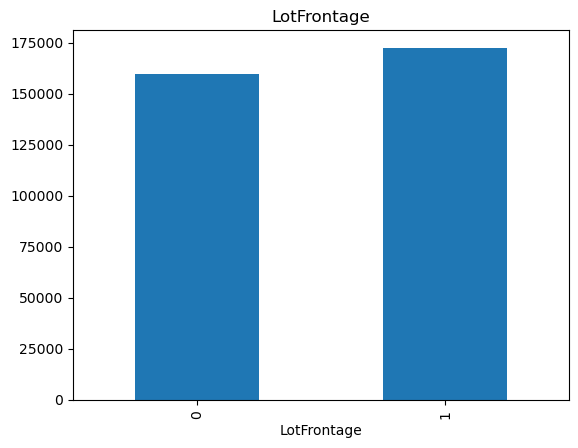

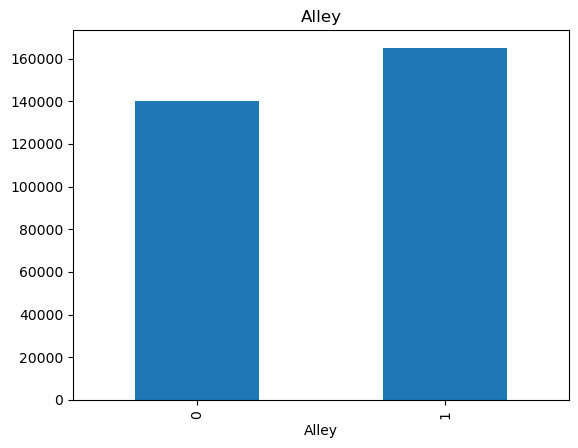

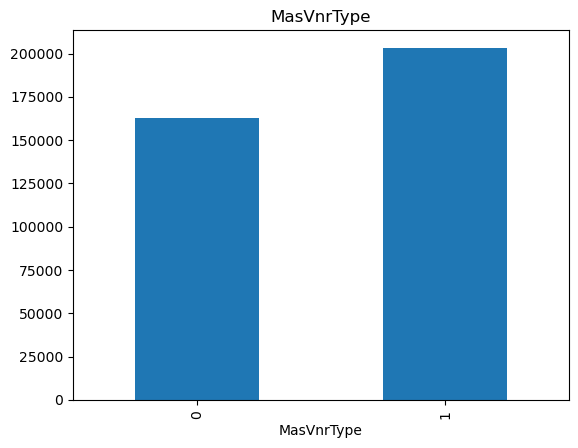

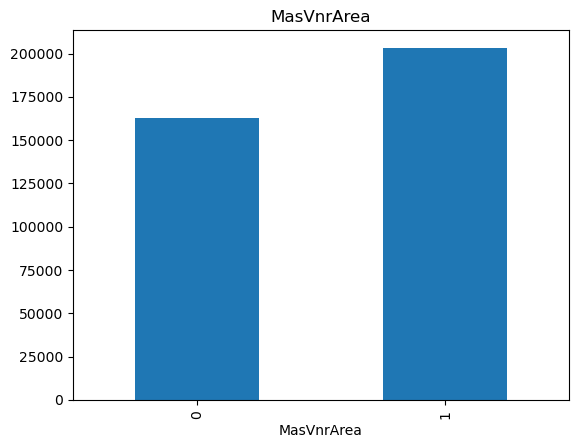

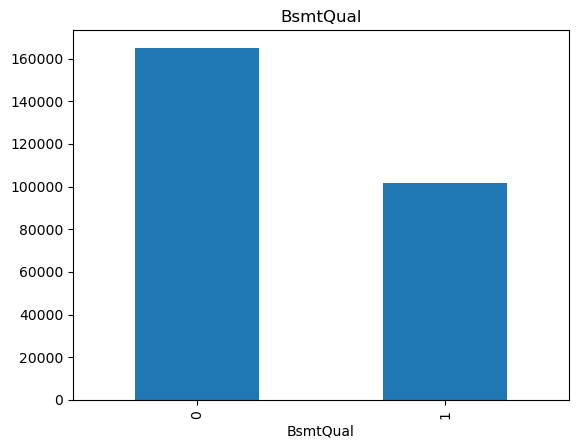

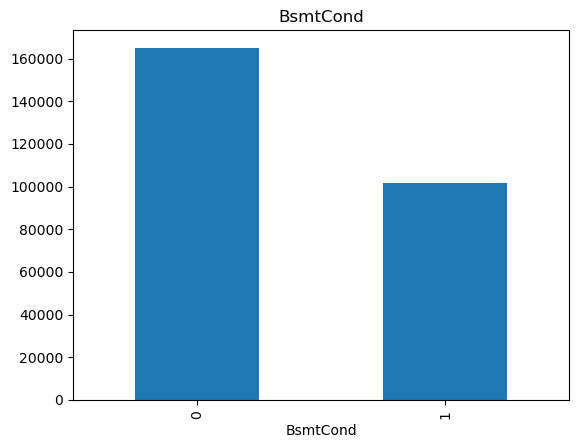

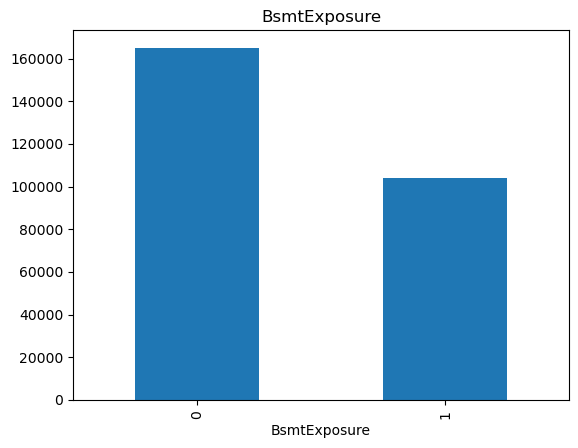

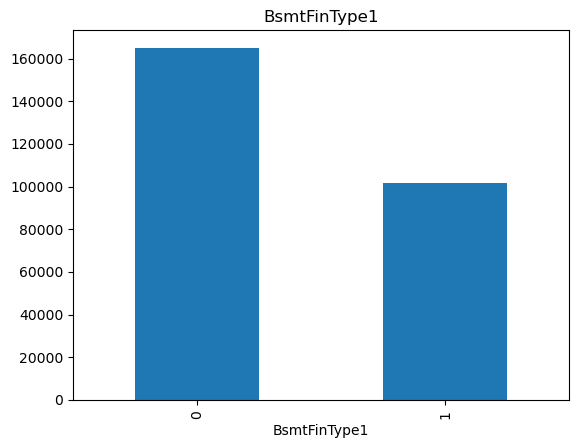

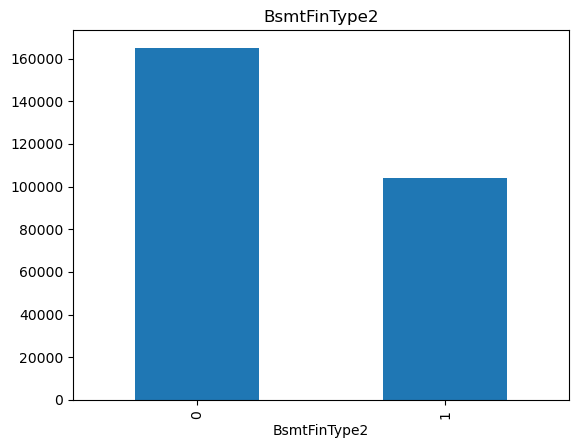

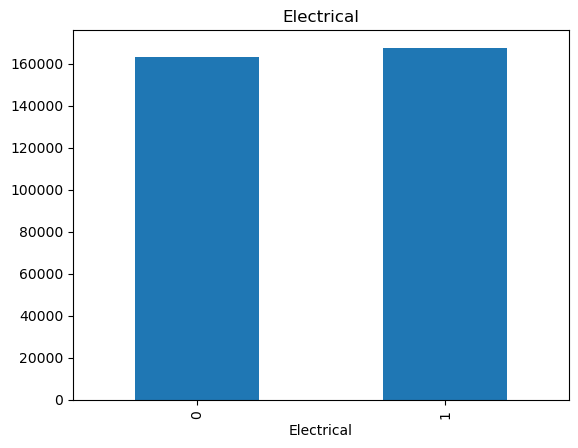

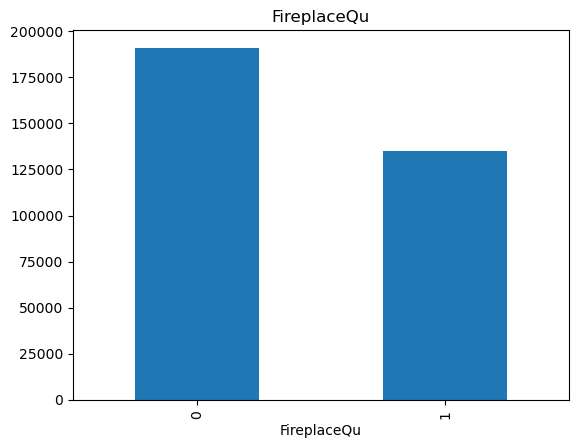

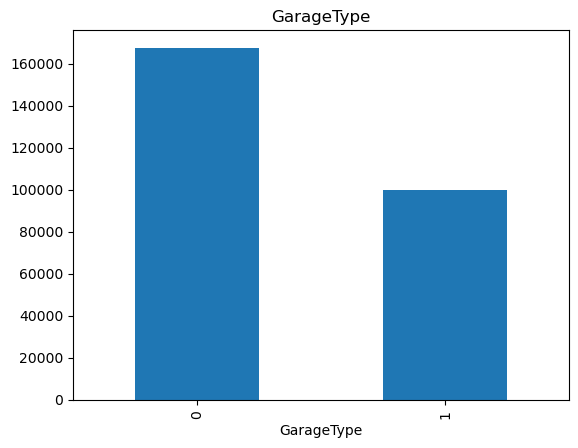

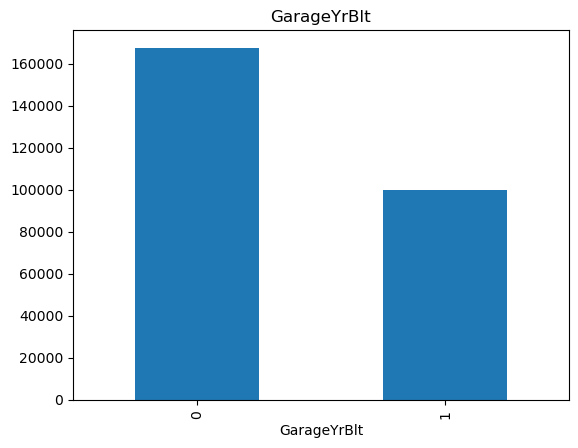

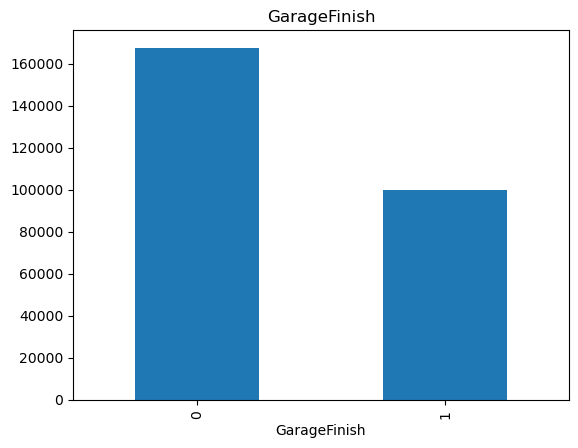

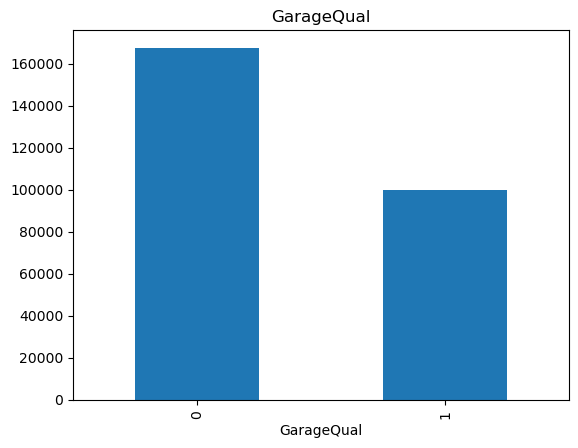

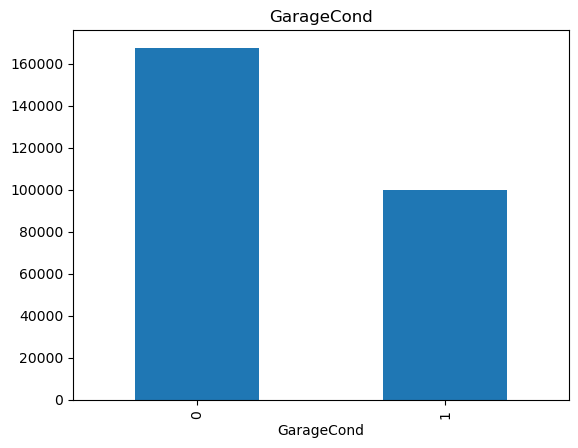

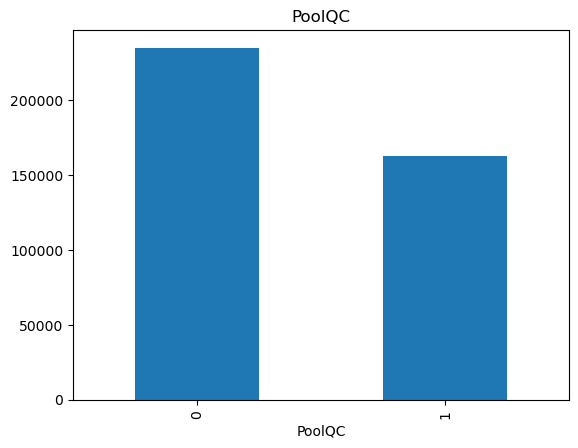

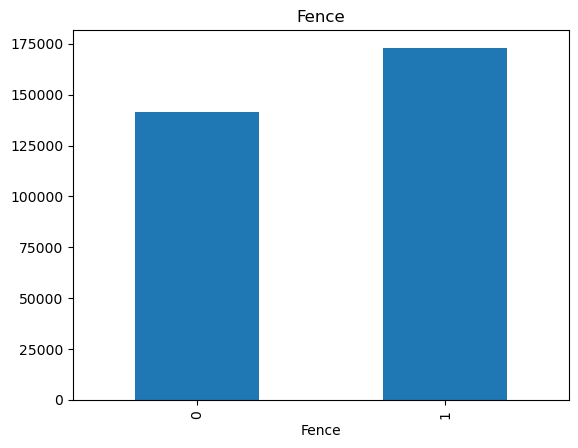

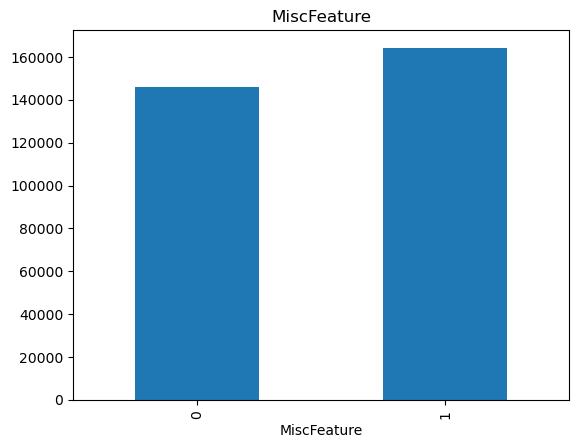

In [11]:
for feature in features_with_na:
    data = dataset.copy()
    # indicating the 1 for the variable which has nullvalue and 0 which has non null value
    data[feature] = np.where(data[feature].isnull(),1,0)
    # we now will plot the bar graph for each varible which have missing values with median of sale price
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

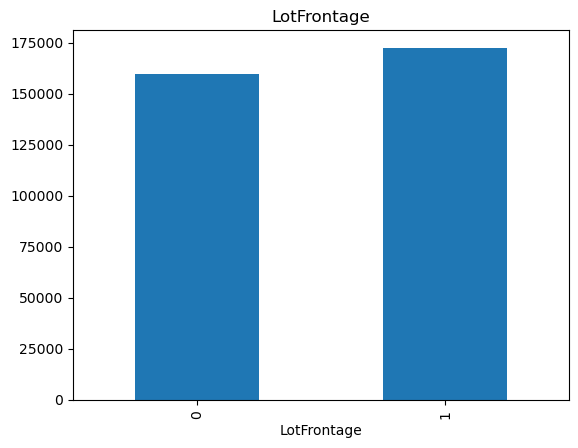

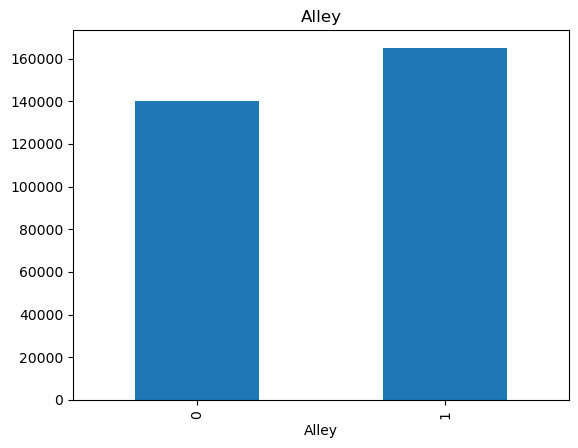

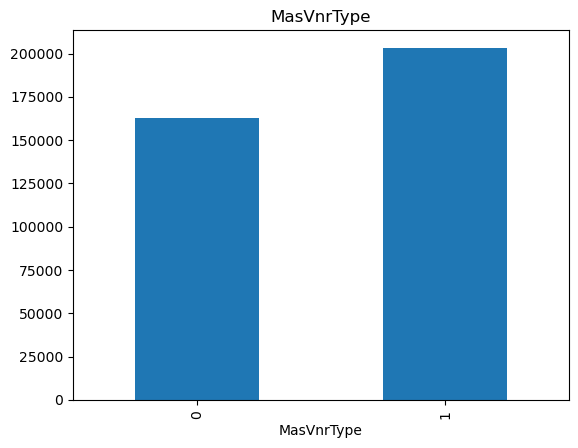

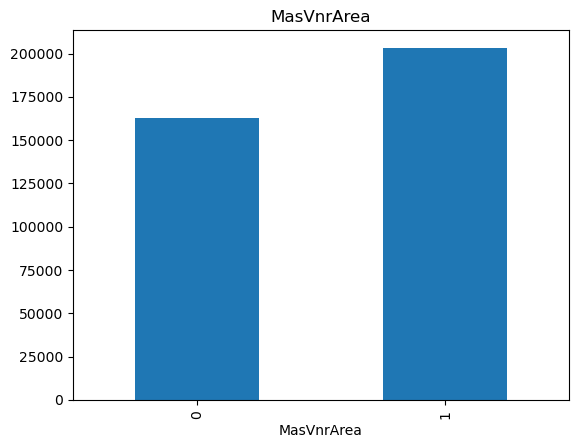

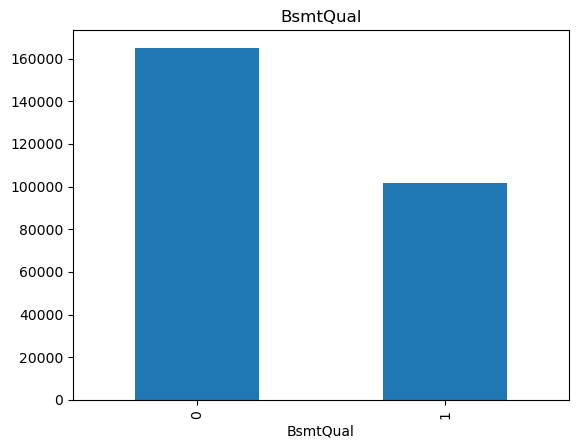

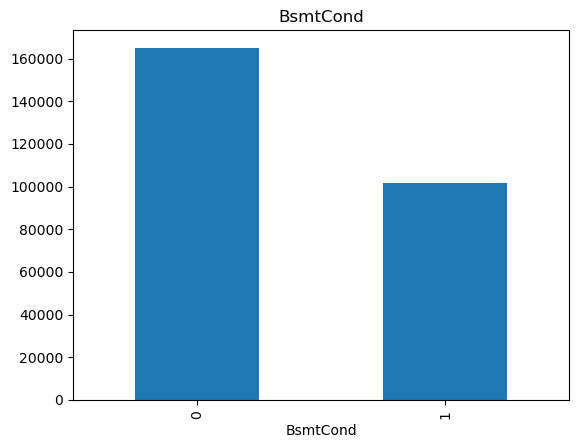

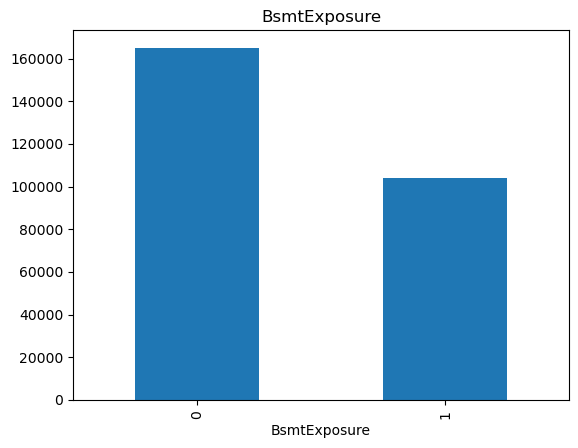

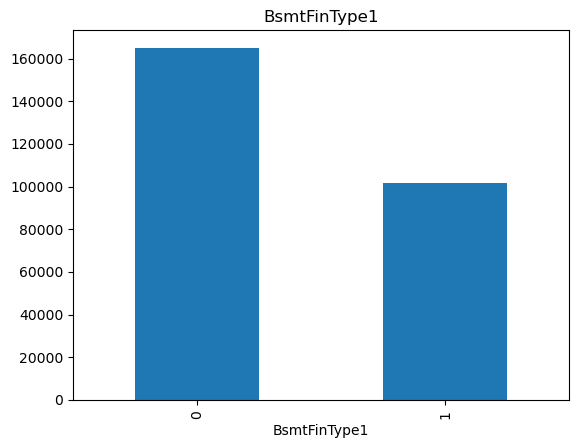

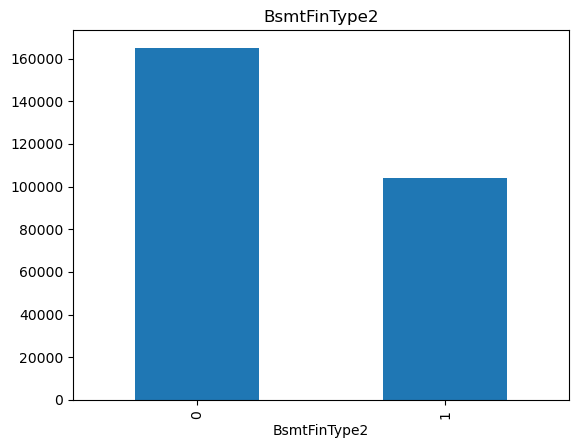

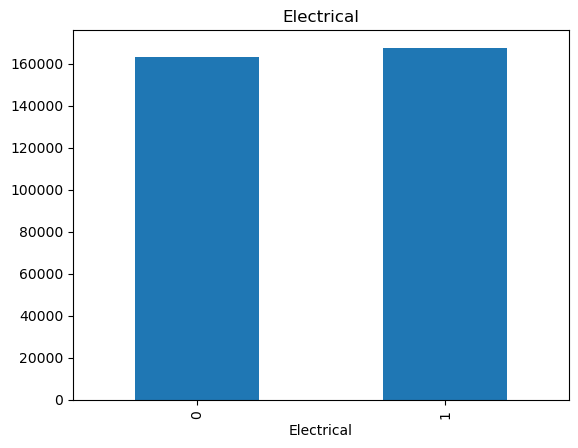

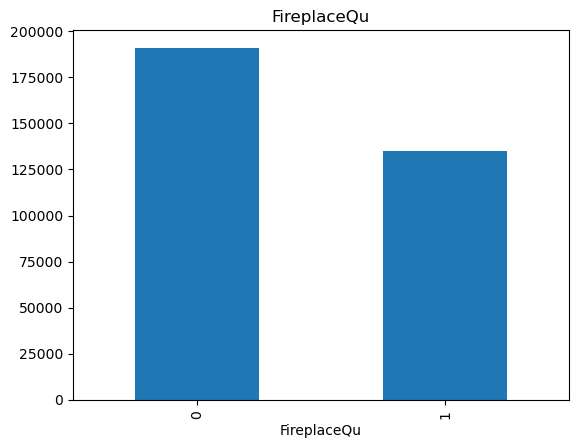

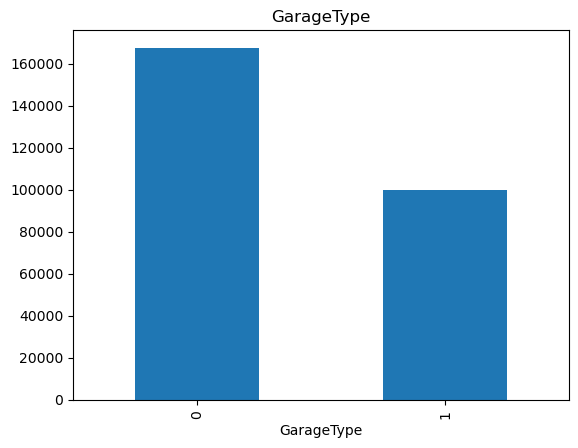

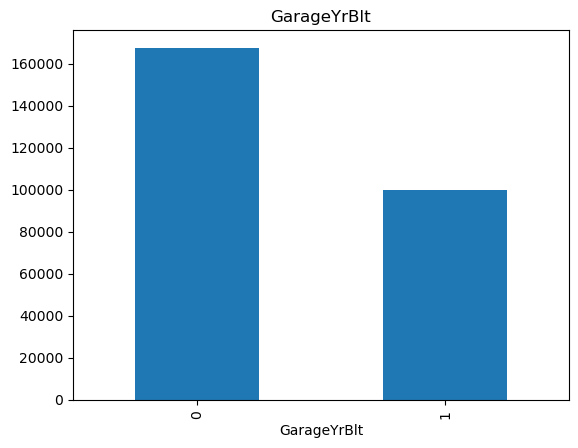

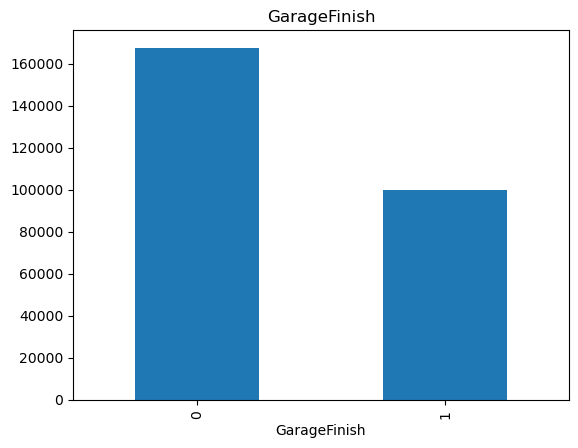

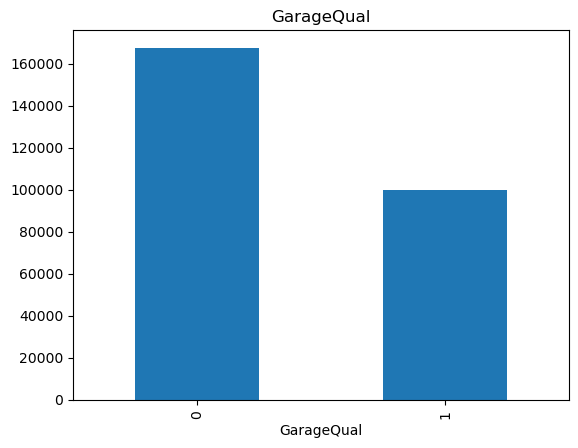

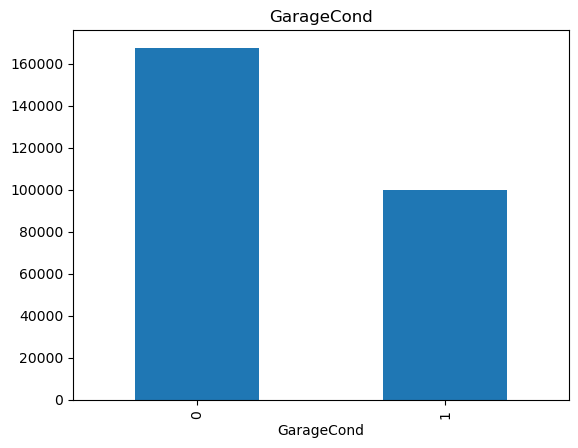

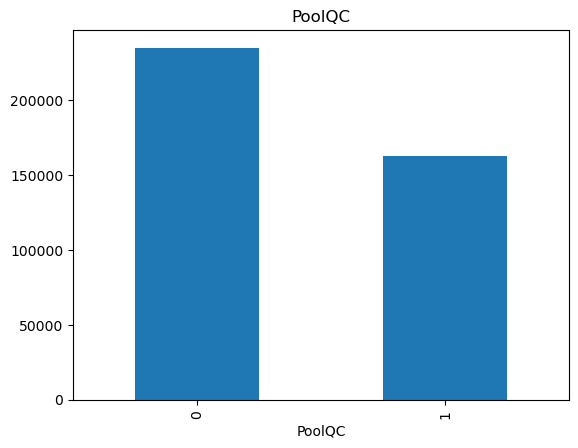

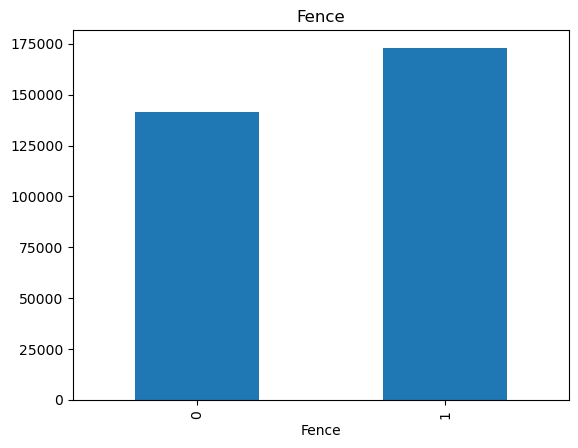

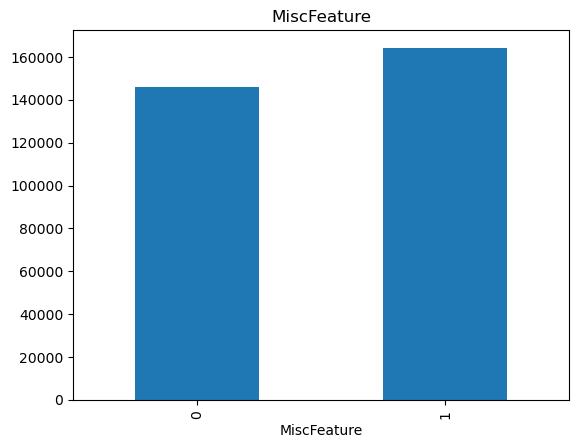

In [12]:
for feature in features_with_na:
    data = dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()


In [13]:
# let us see how many numerical varibales are present in the dataset
numerical_features = [feature for feature in dataset.columns  if dataset[feature].dtype != 'O']
print('number of numerical variables = ',len(numerical_features))

number of numerical variables =  38


In [14]:
len(numerical_features)

38

In [15]:
dataset[numerical_features].head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [16]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
print(year_feature)
# there are four columns present in dataset which are giving information about the year 

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


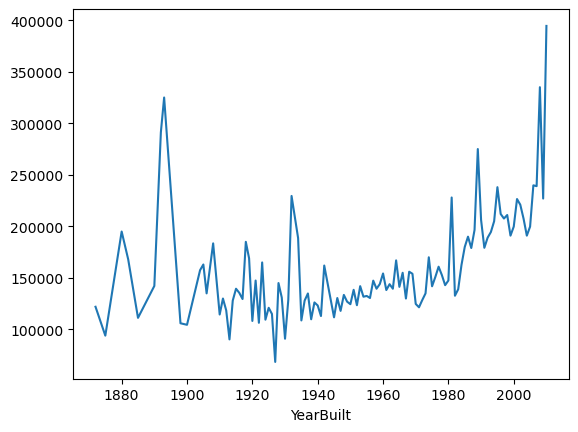

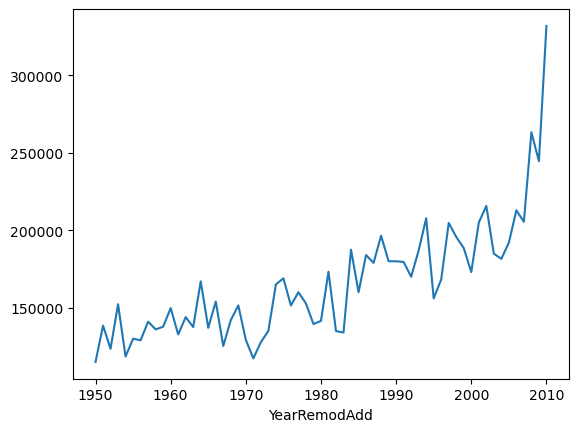

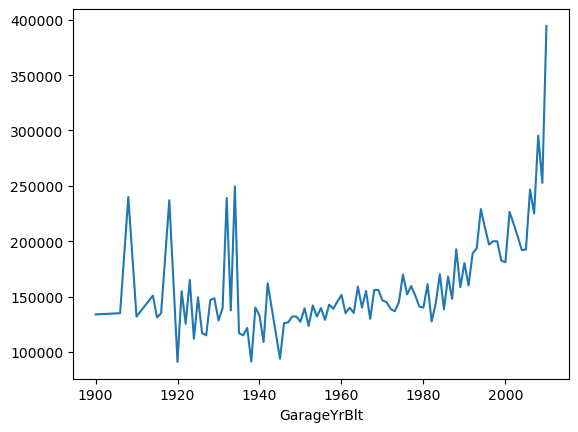

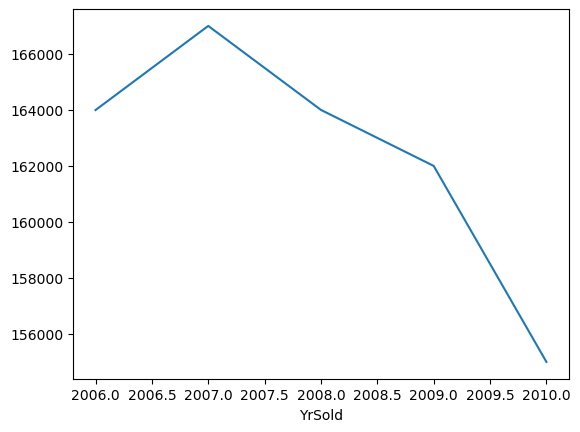

In [17]:
for feature in year_feature:
    dataset.groupby(feature)['SalePrice'].median().plot()
    
    plt.show()

Text(0.5, 1.0, 'House Price vs YearSold')

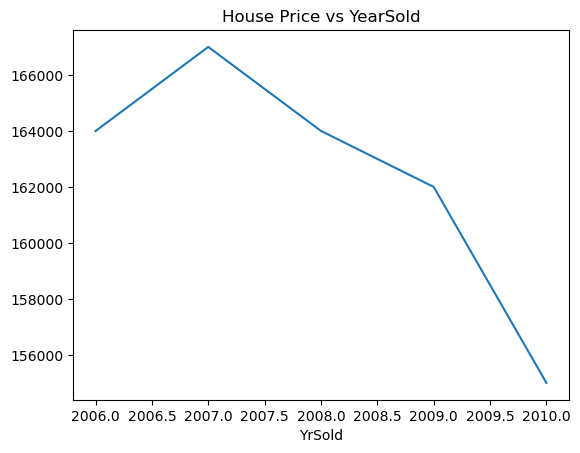

In [18]:
dataset.groupby('YrSold')['SalePrice'].median().plot()

plt.title("House Price vs YearSold")

In [19]:
# two type of feature are there 
# first is discrete variable and second is continious variable
# finding the columns in the dataset which have discrete numbers
discrete_feature = [feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature]

In [20]:
print(len(discrete_feature))

17


In [21]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

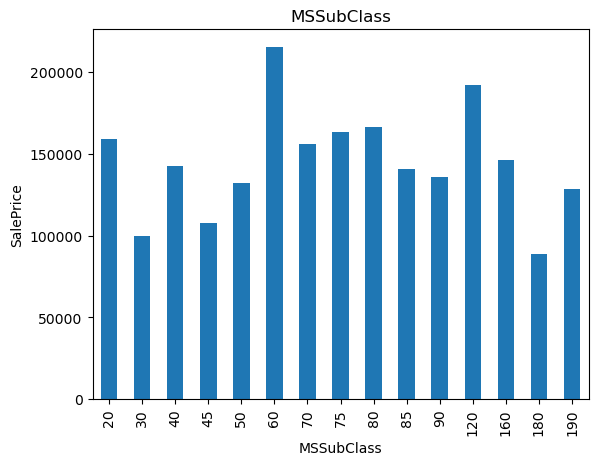

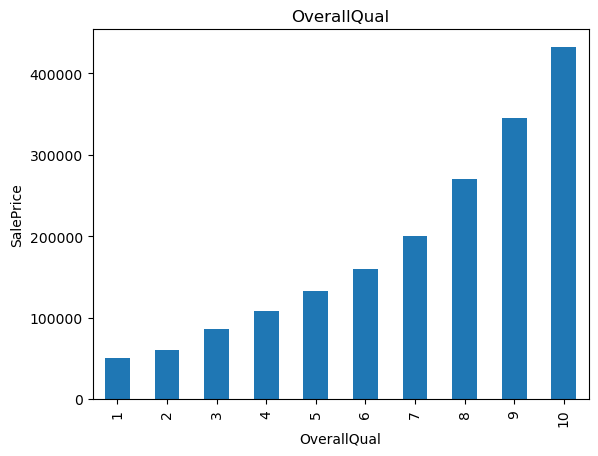

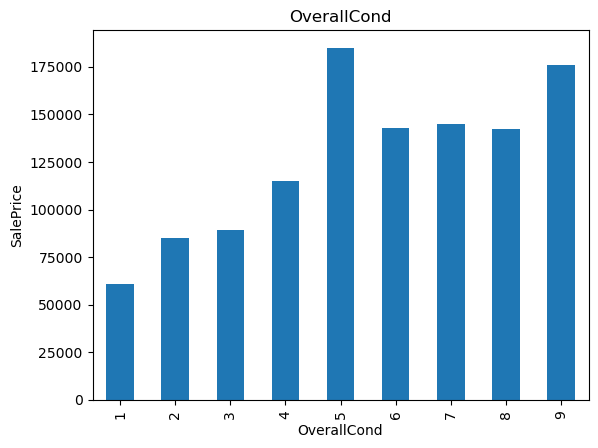

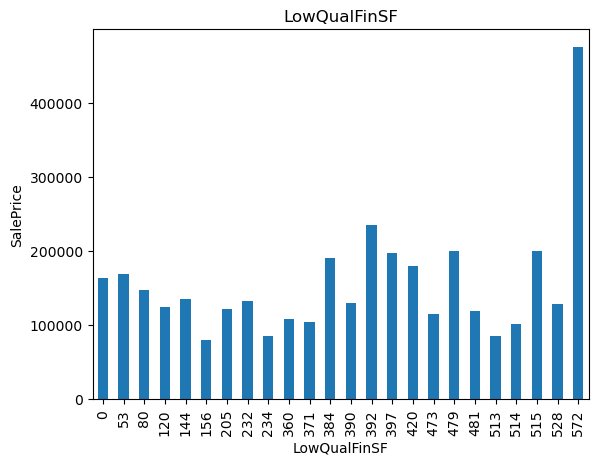

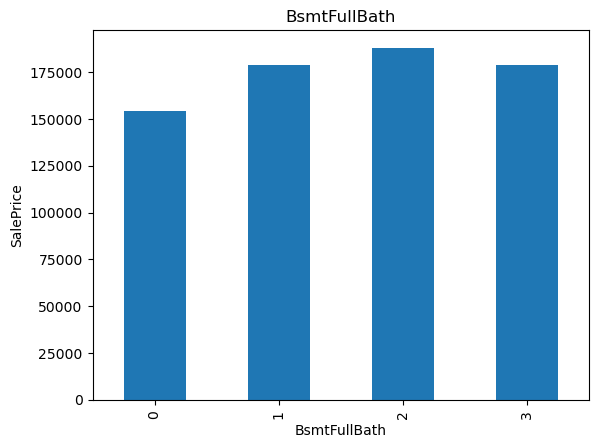

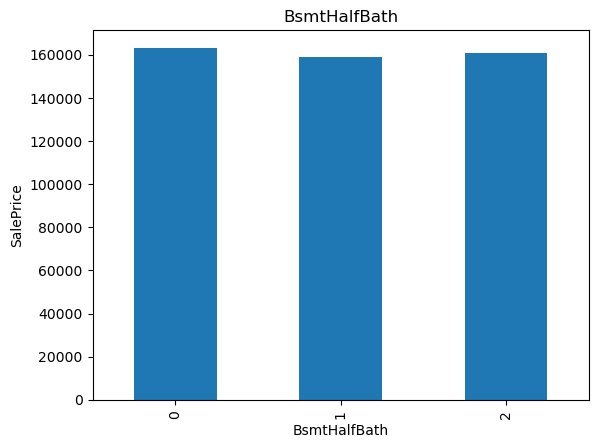

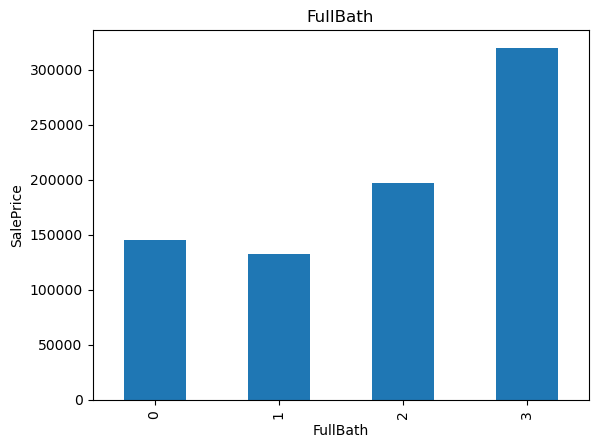

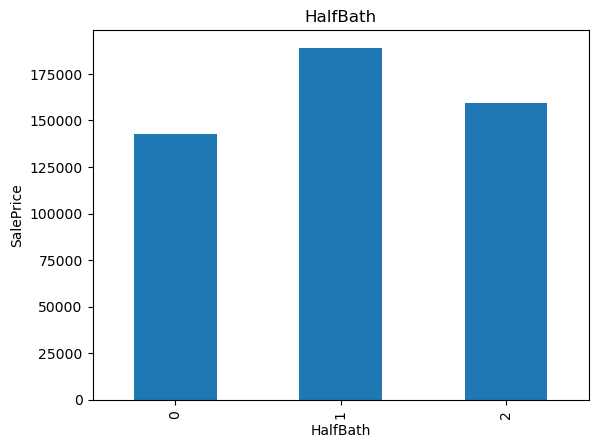

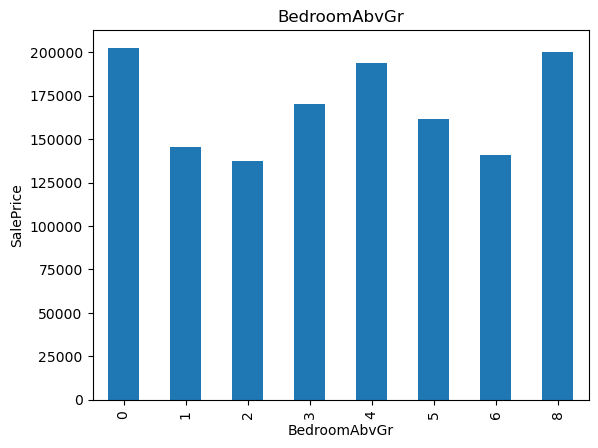

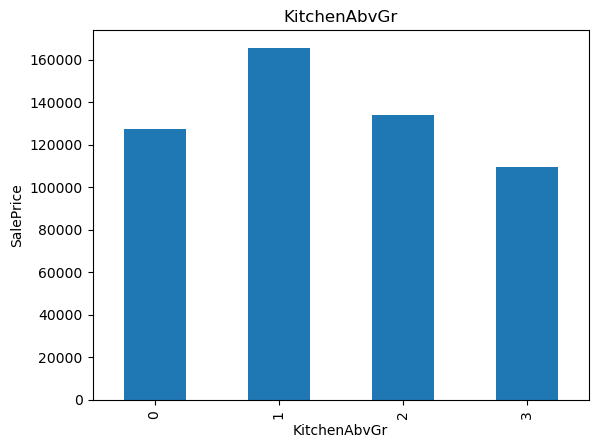

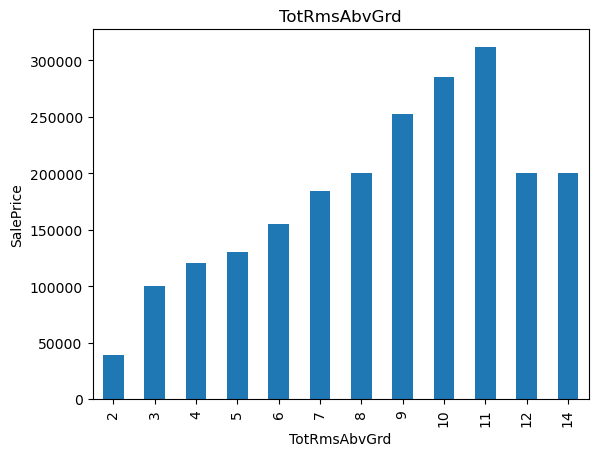

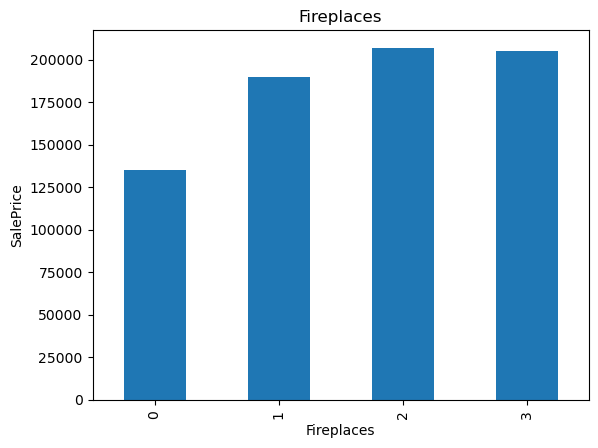

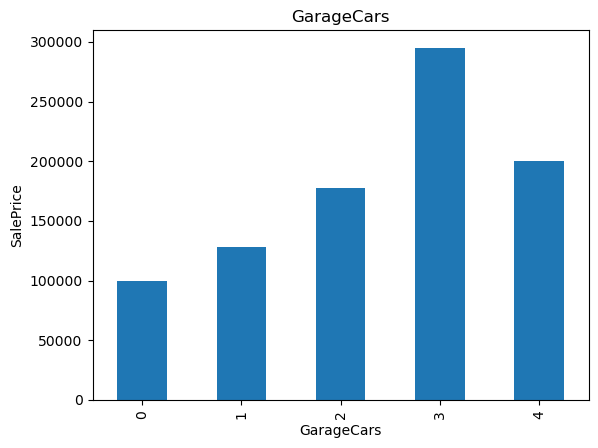

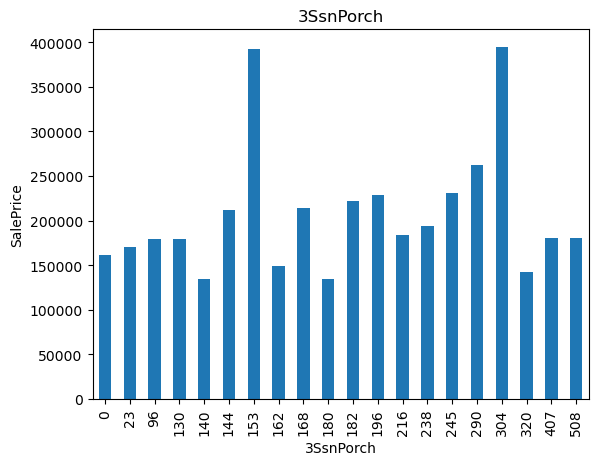

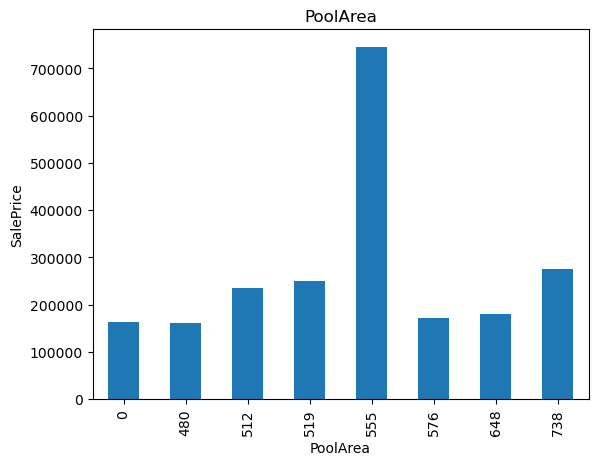

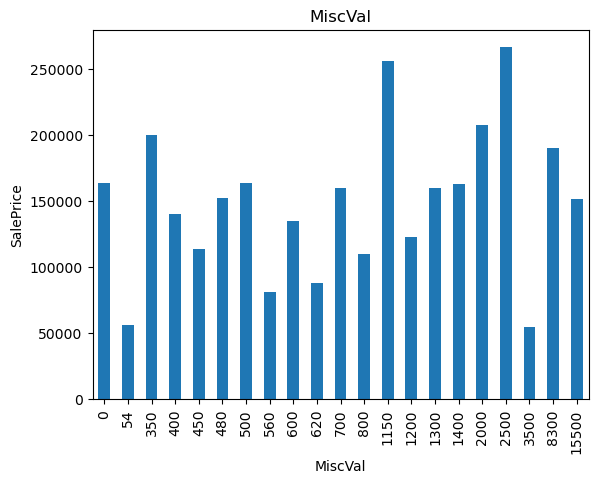

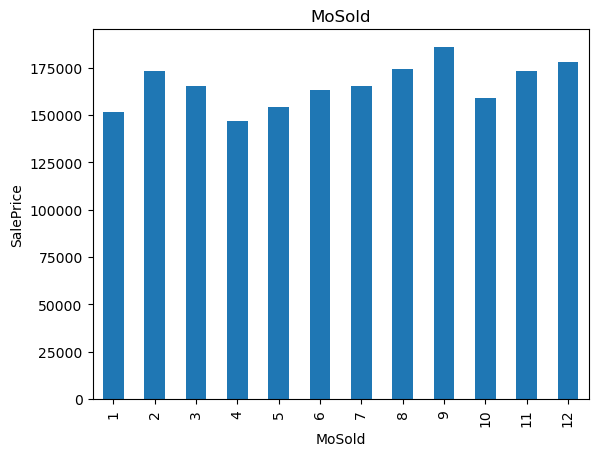

In [22]:
# here i have discrete feature 
for feature in discrete_feature:
    data = dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [23]:
# let us plotting for the continious variable
continious_variable = [feature for feature in numerical_features if feature not in discrete_feature + year_feature + ['Id'] ]
print(len(continious_variable))

16


In [24]:
continious_variable

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [25]:
len(continious_variable)

16

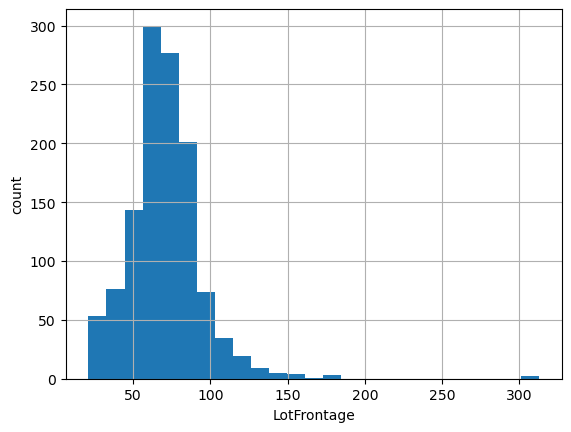

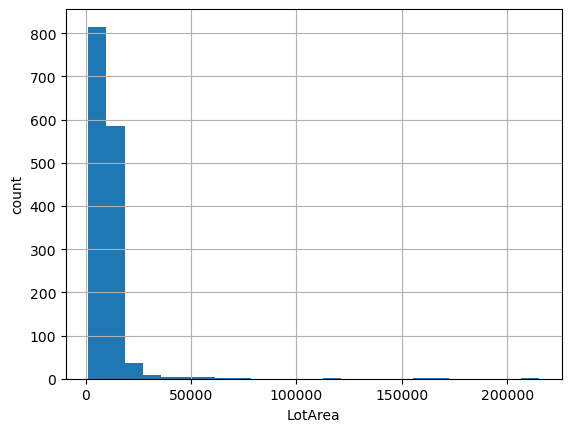

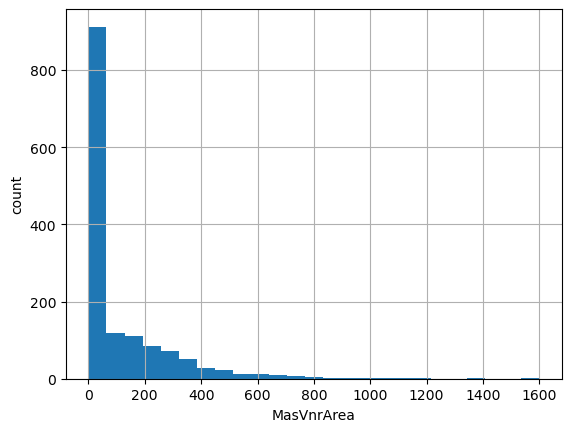

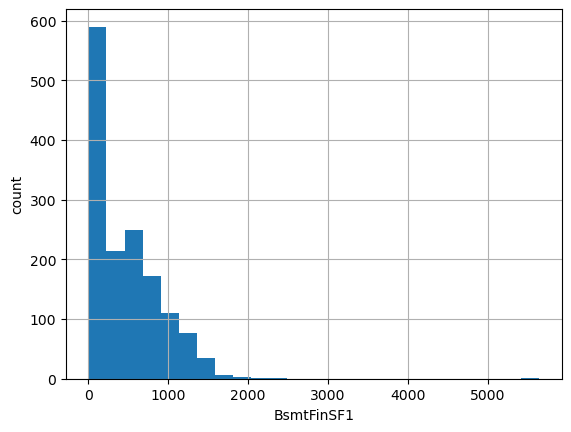

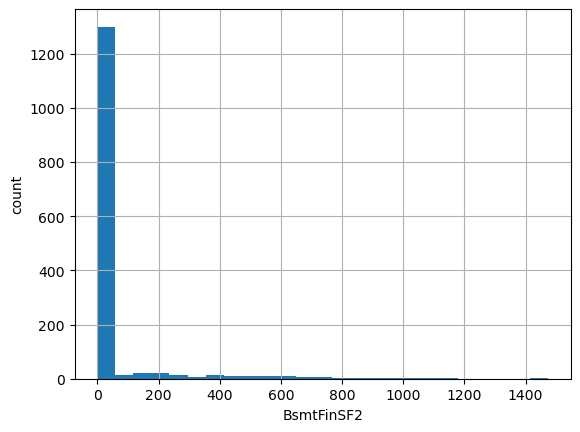

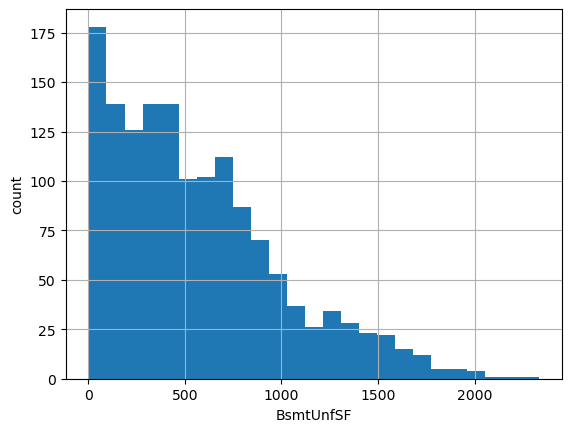

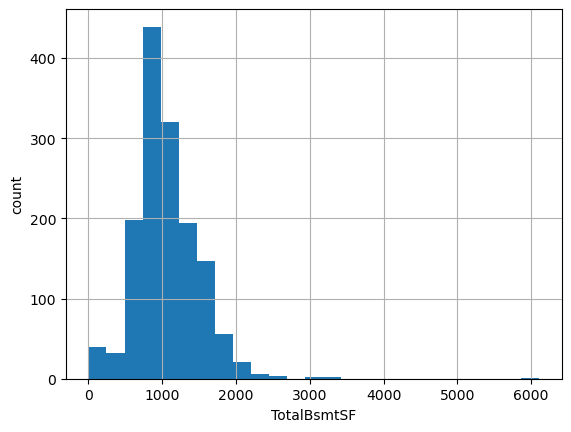

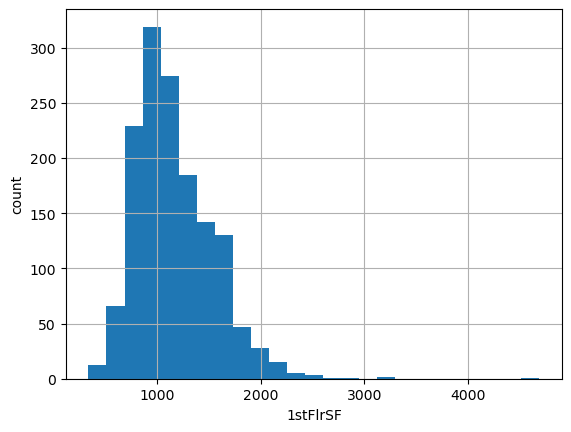

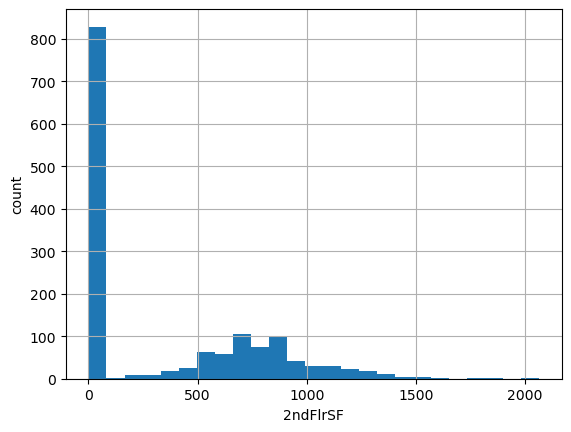

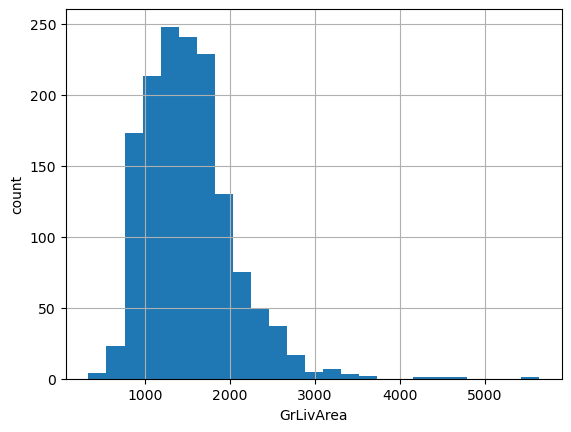

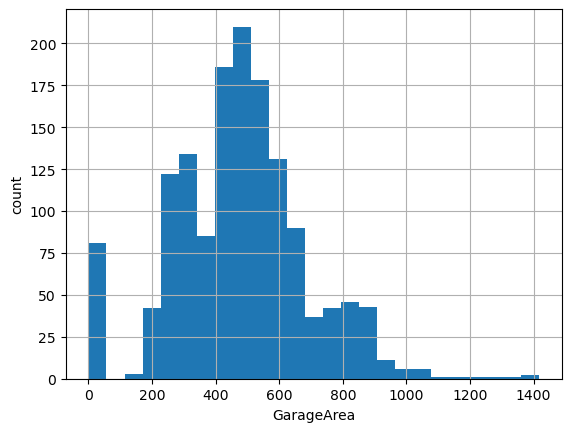

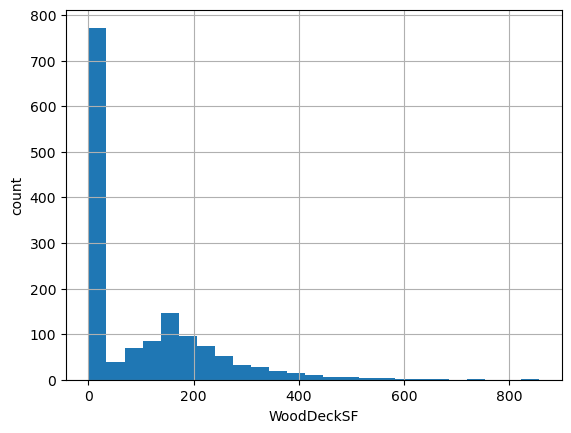

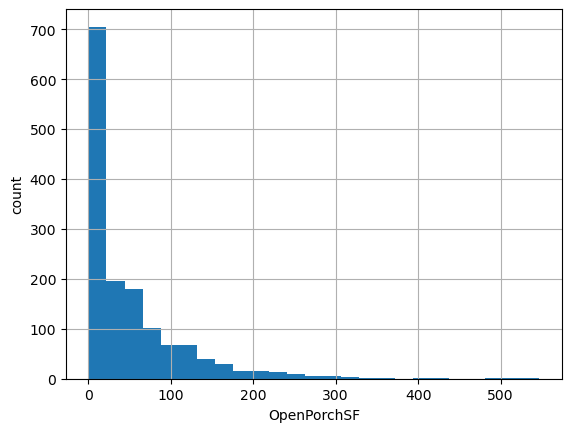

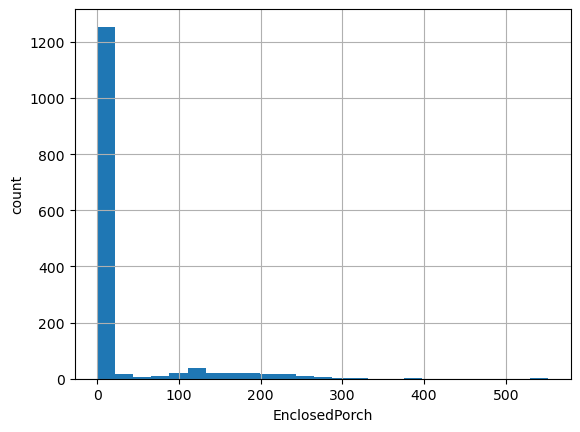

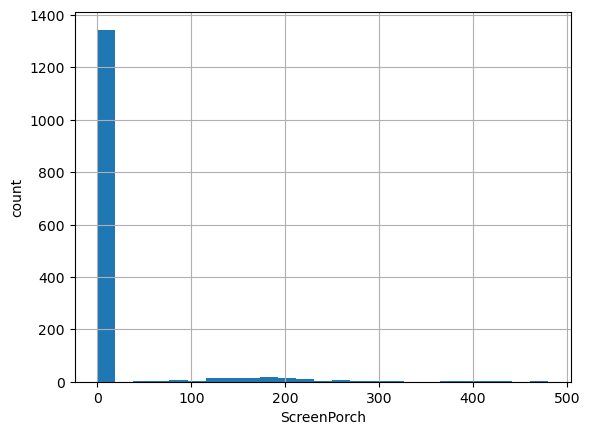

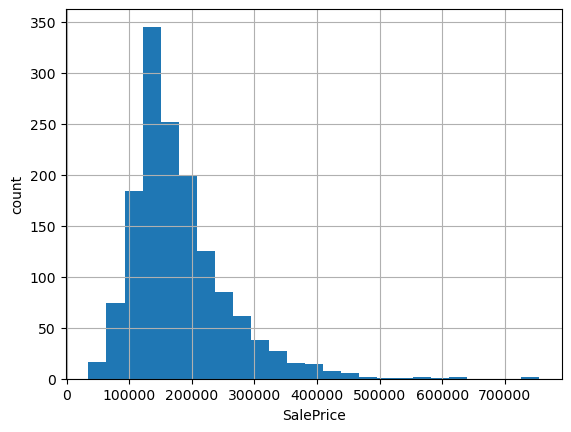

In [26]:
for feature in continious_variable:
    data = dataset.copy()
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

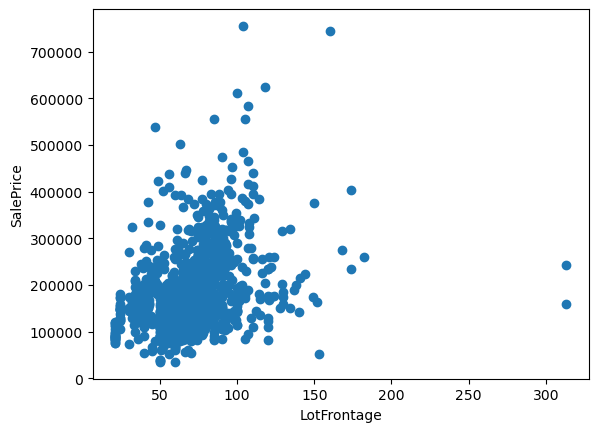

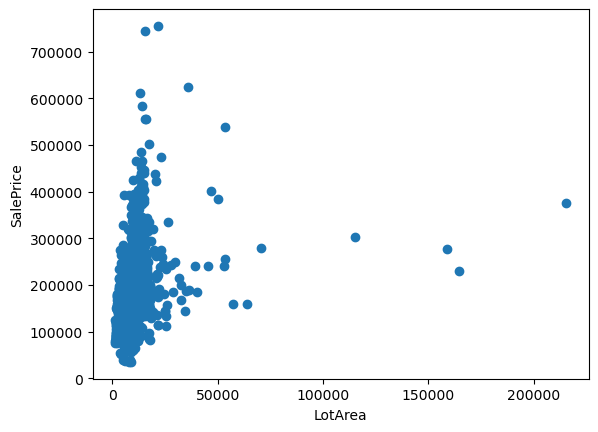

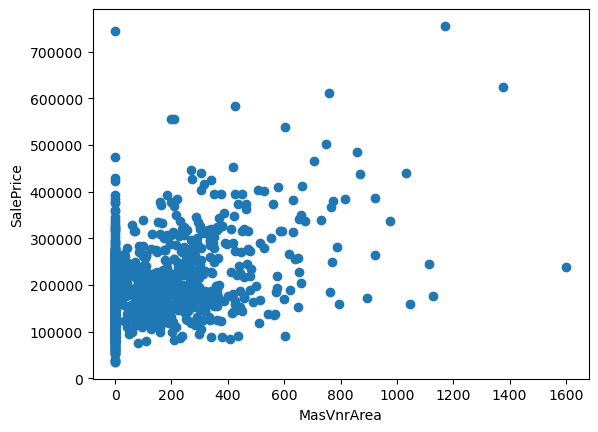

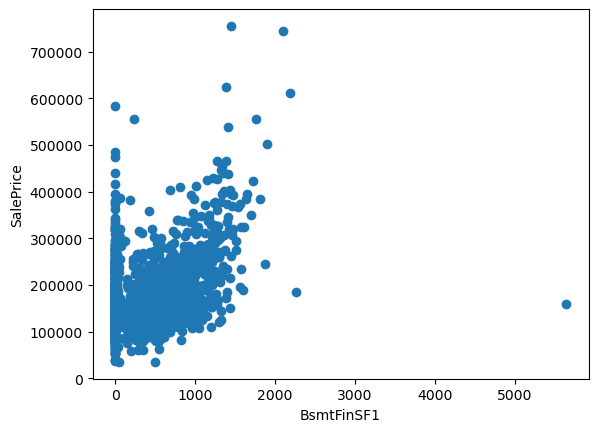

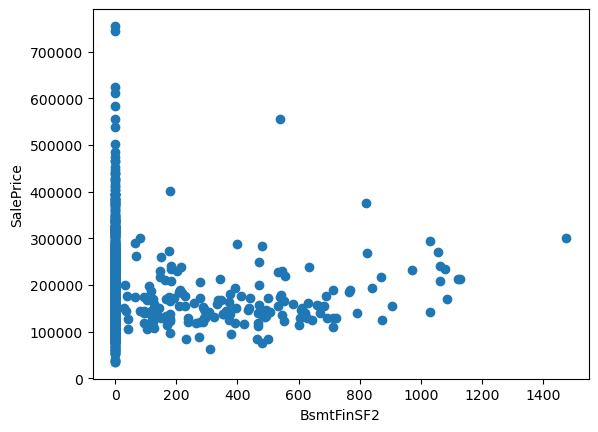

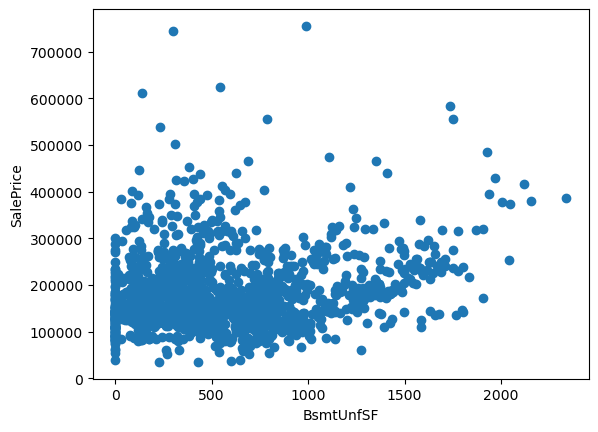

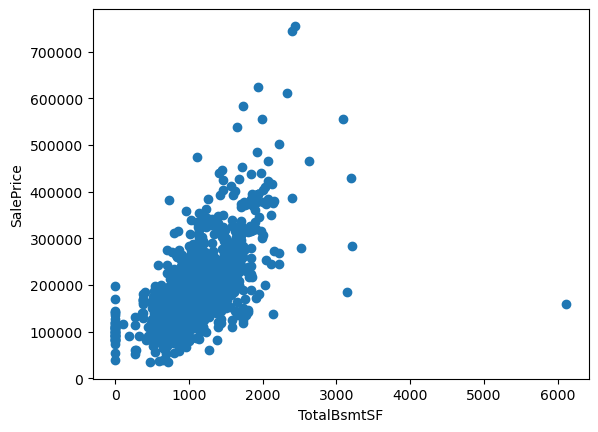

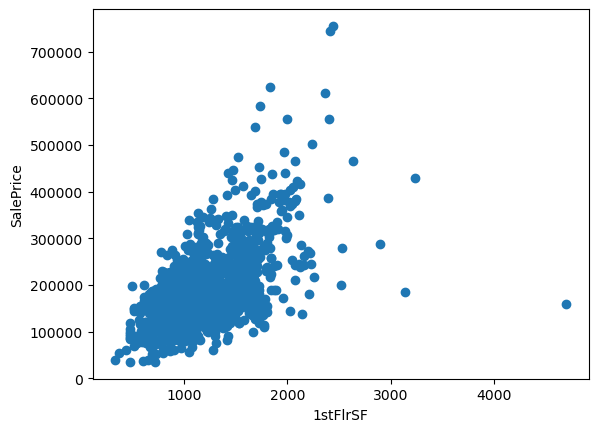

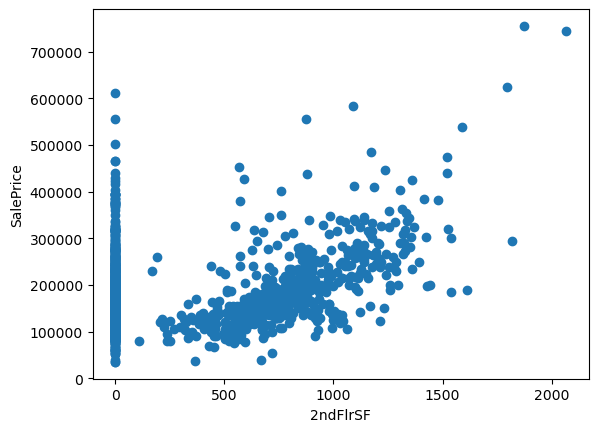

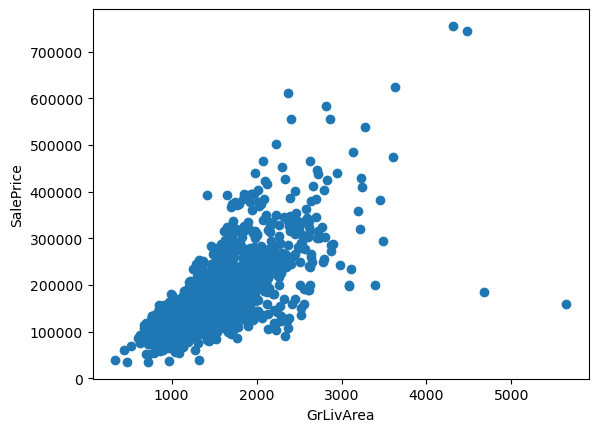

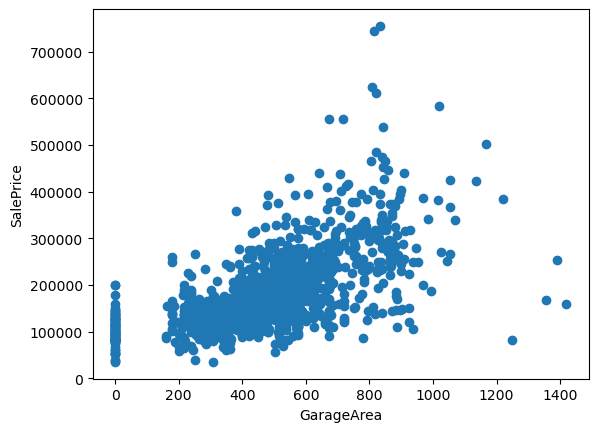

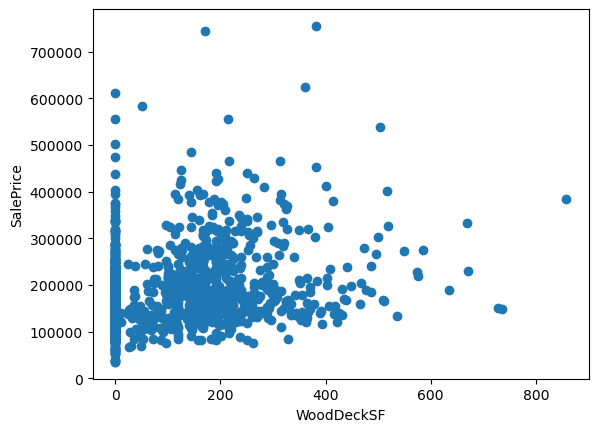

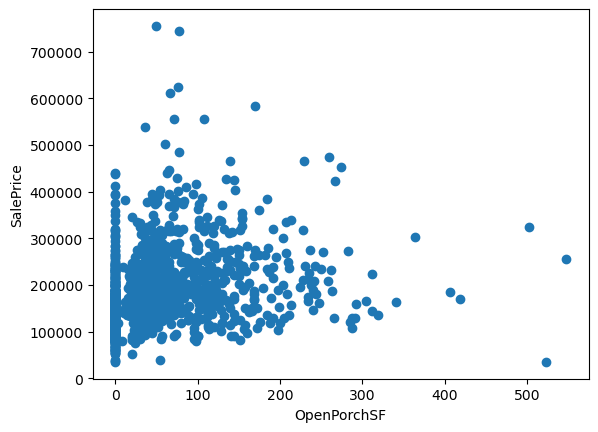

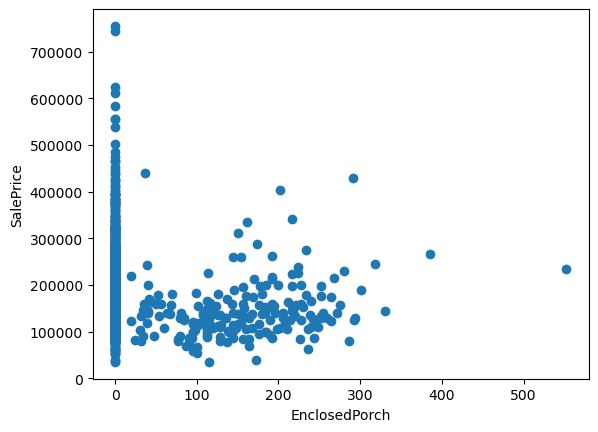

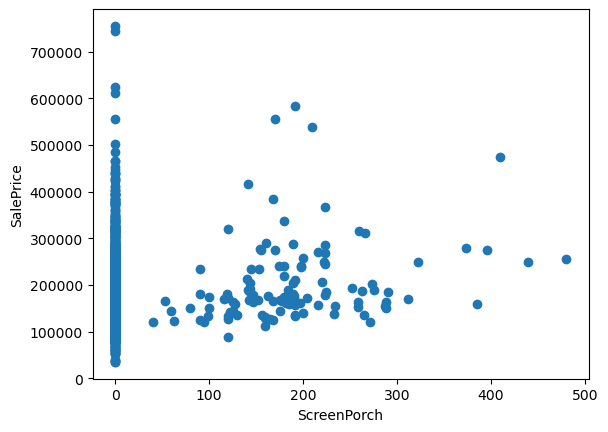

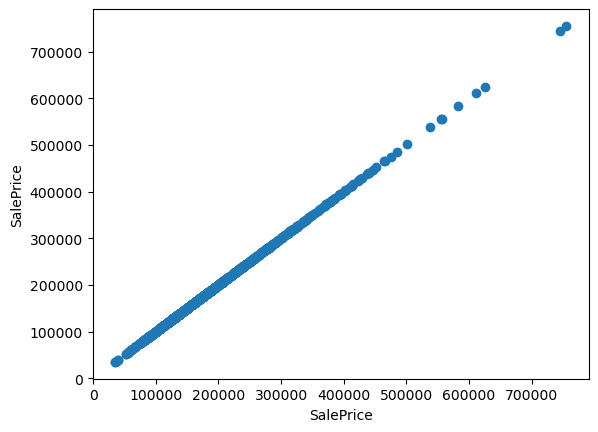

In [27]:
for feature in continious_variable:
    data = dataset.copy()
    plt.scatter(data[feature],data["SalePrice"])
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.show()

In [28]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
# why i did this (plotting the histogram of columns which are having continious number)
# i tried to find where is normal distribution or not
# beacuse working with normal distribution is very easy

In [29]:
# now i will be using logrithimc transformation in order to convert non normal distributed variables into distributed variables
for feature in continious_variable:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature]) # doing logrithimc transformation
        data['SalePrice'] = np.log(data['SalePrice'])
       

C:\Users\rajpu\anaconda7\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


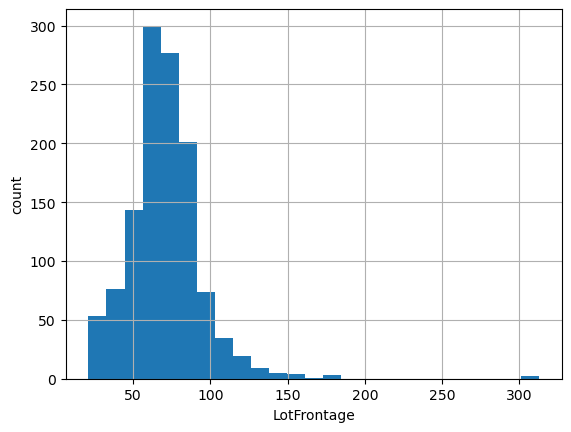

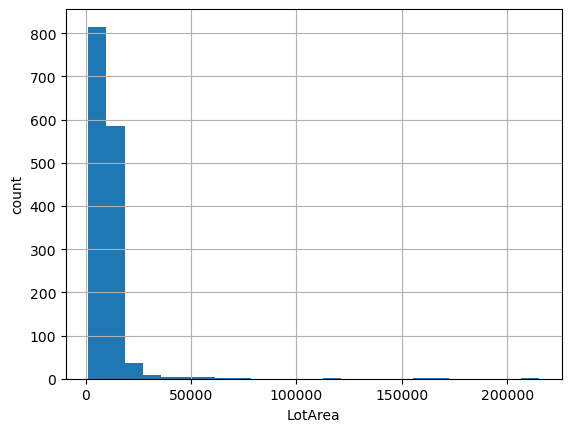

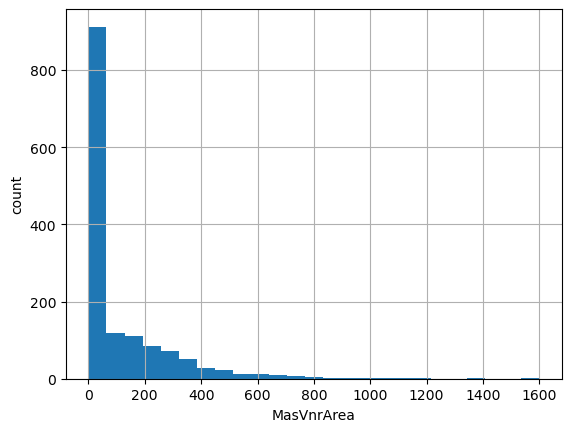

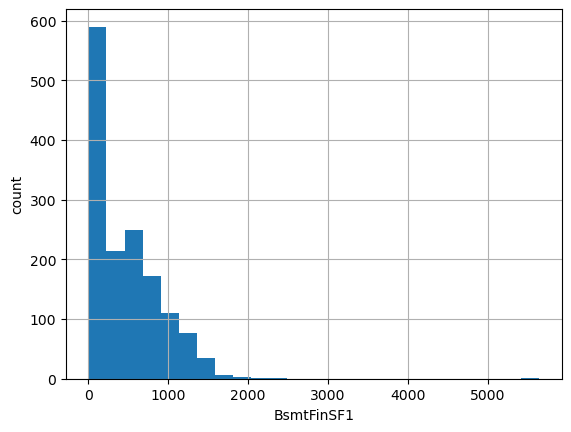

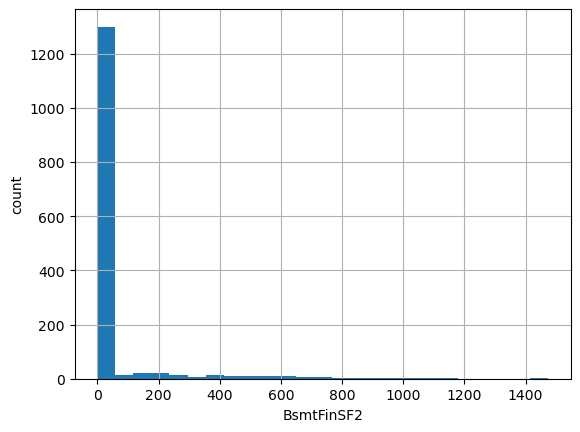

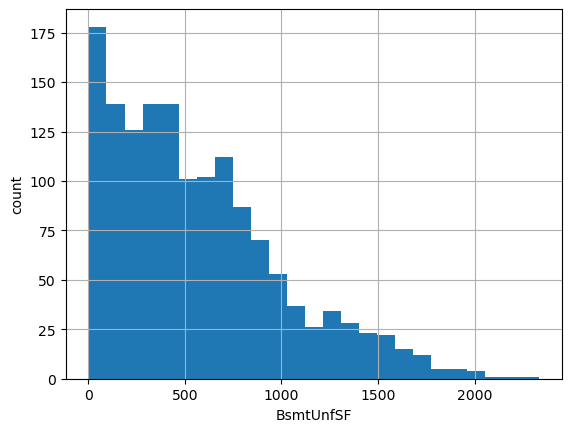

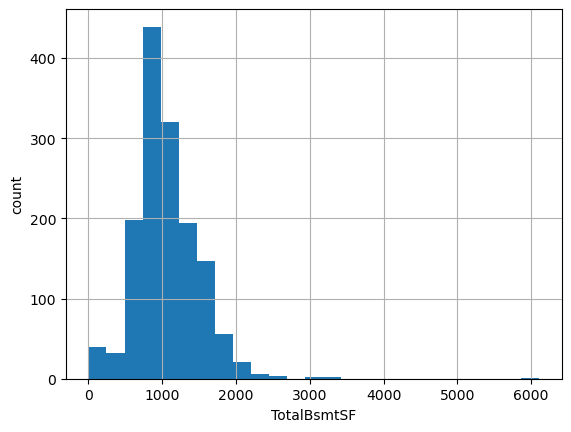

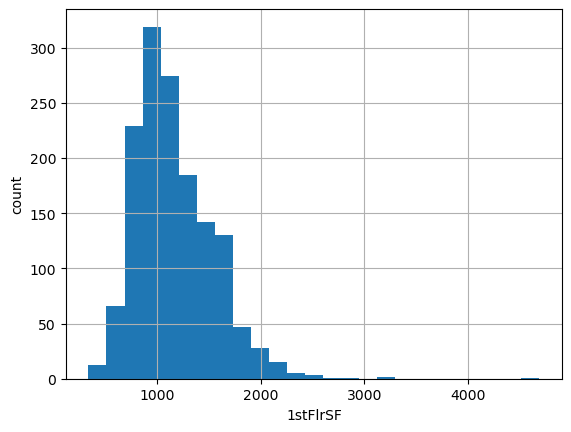

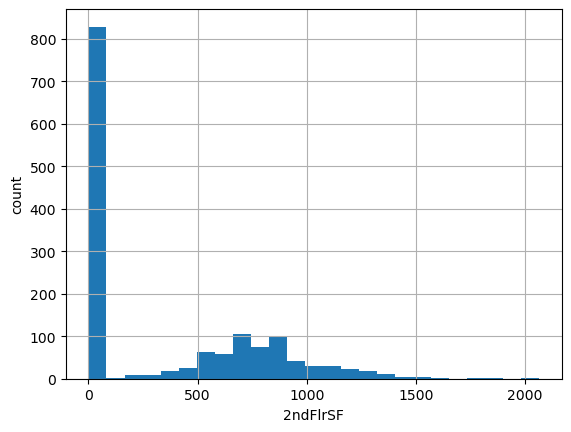

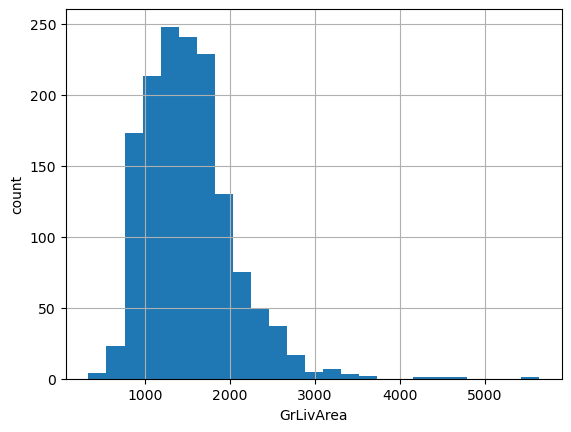

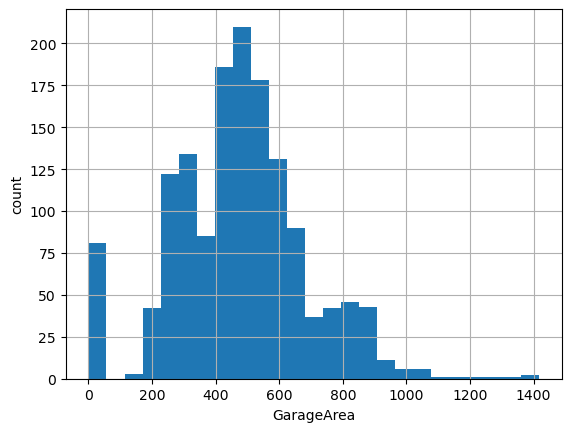

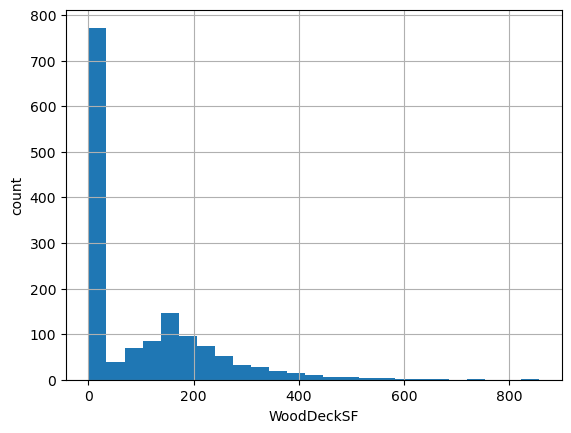

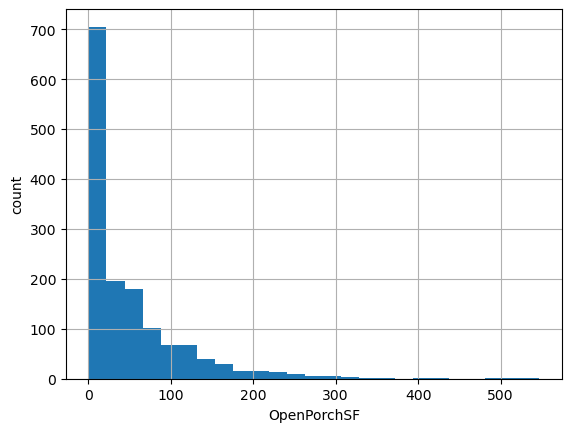

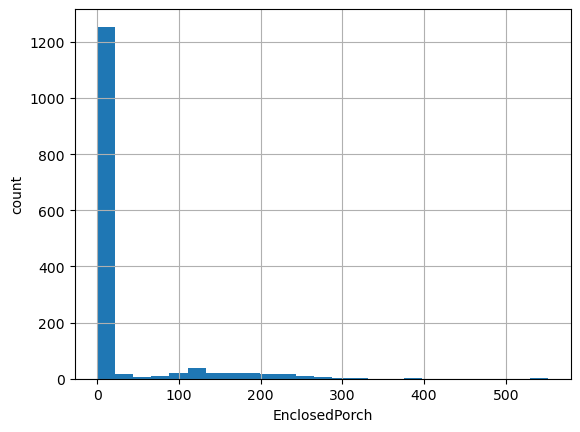

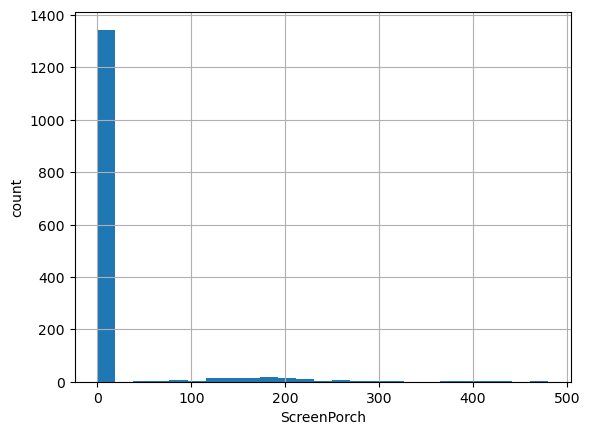

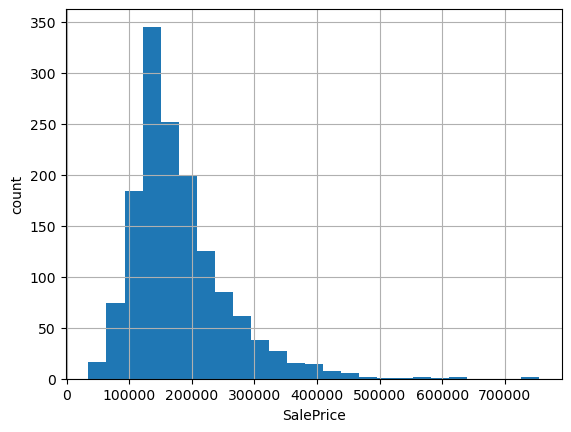

In [30]:
for feature in continious_variable:
    data = dataset.copy()
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

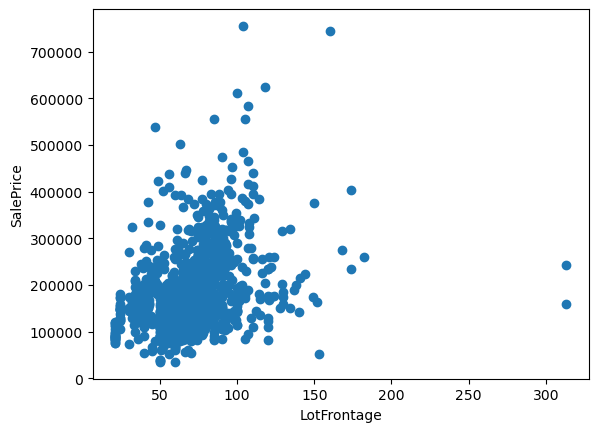

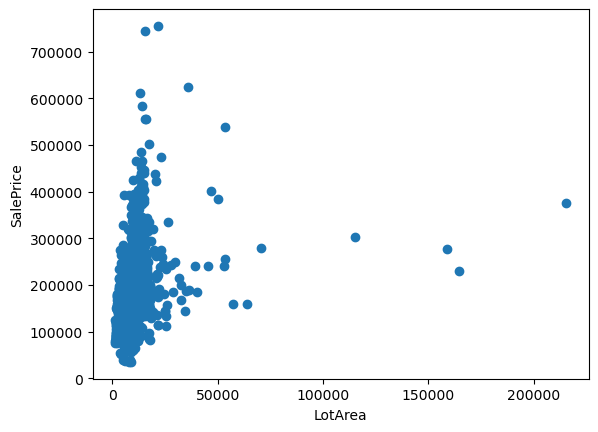

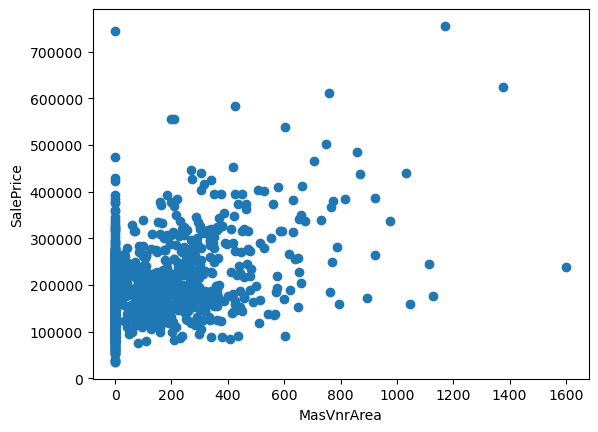

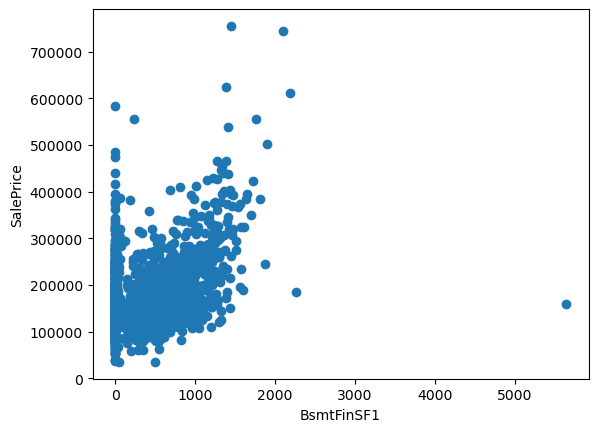

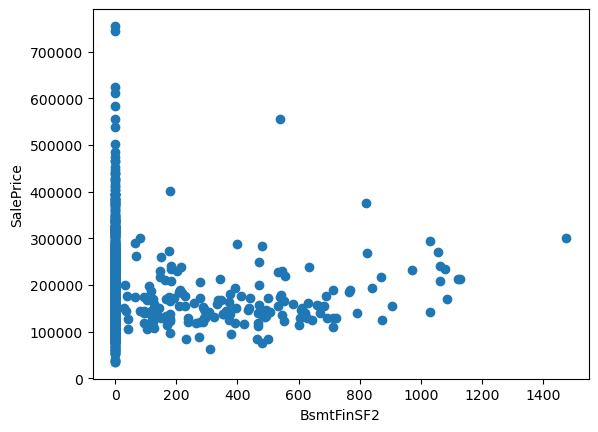

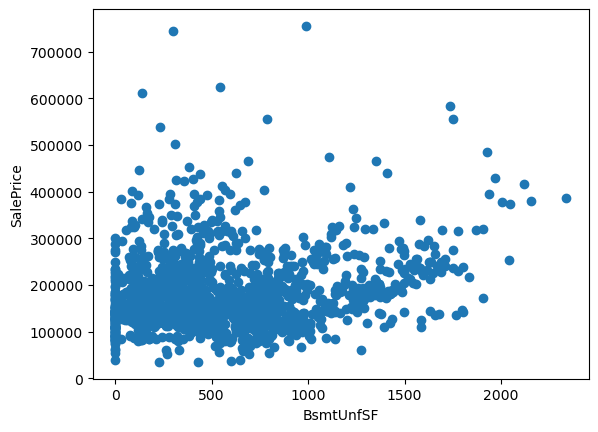

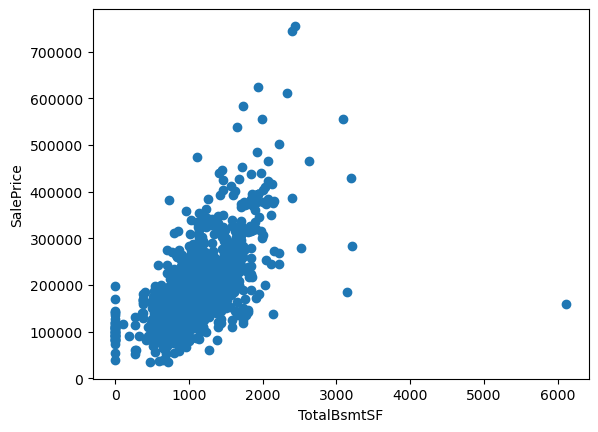

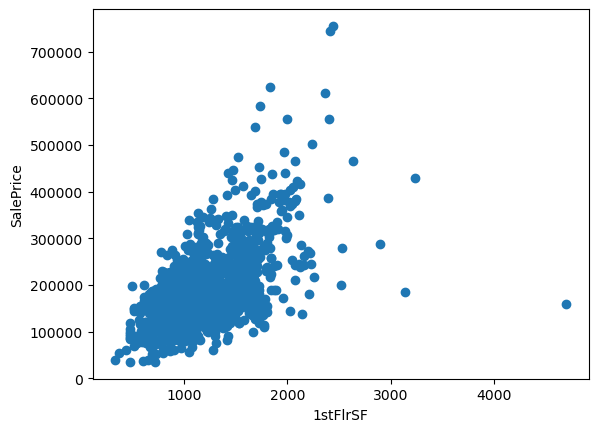

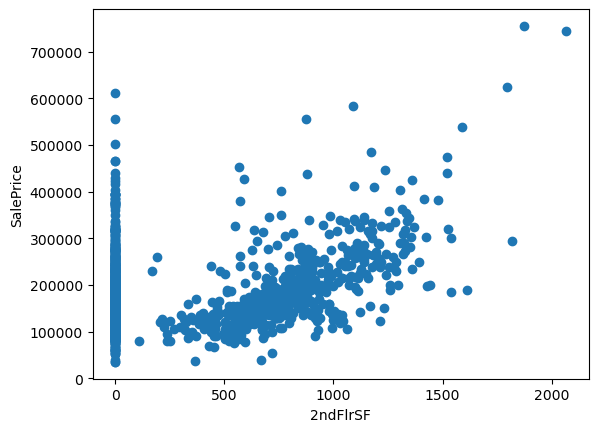

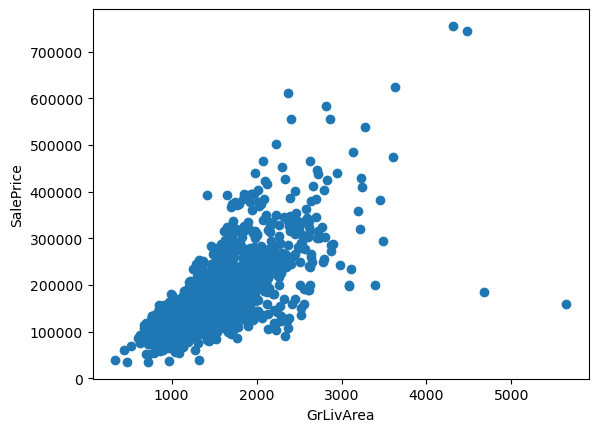

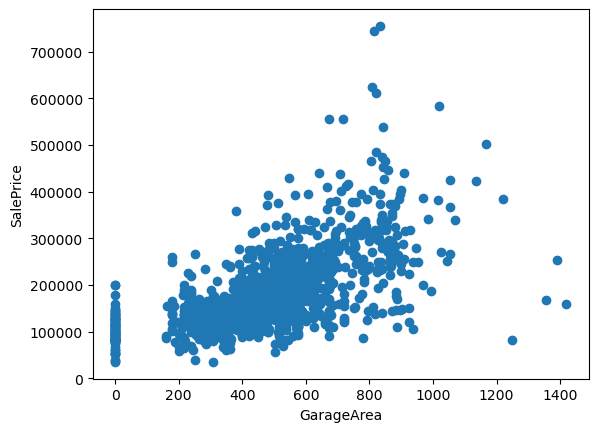

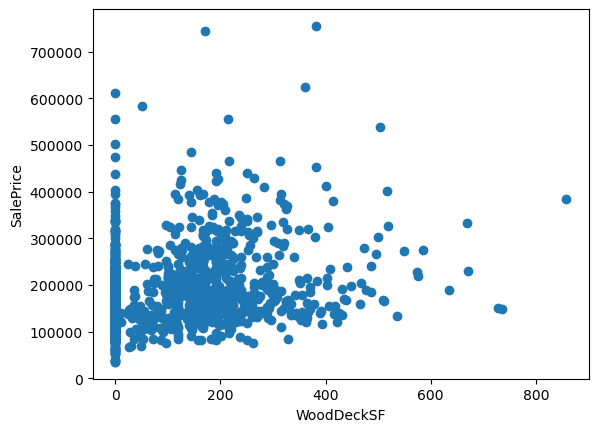

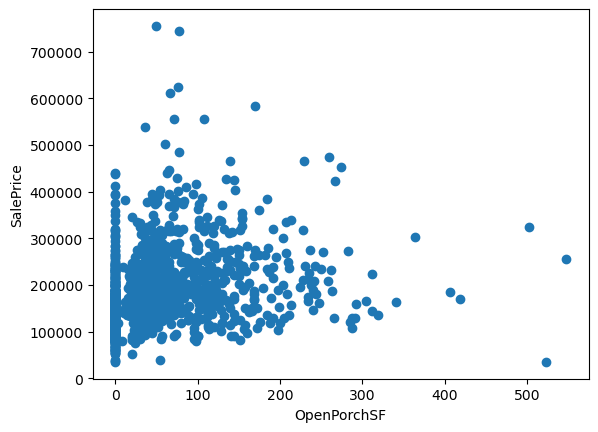

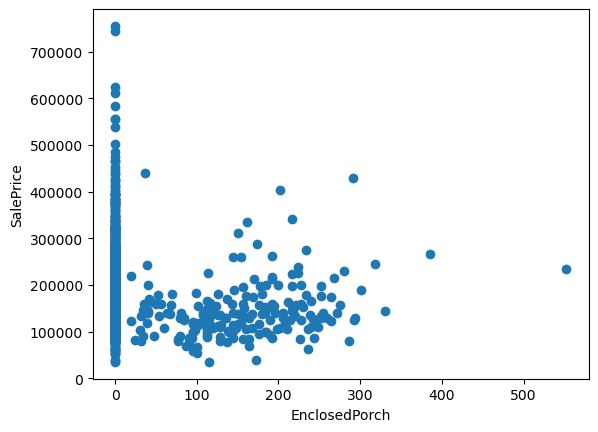

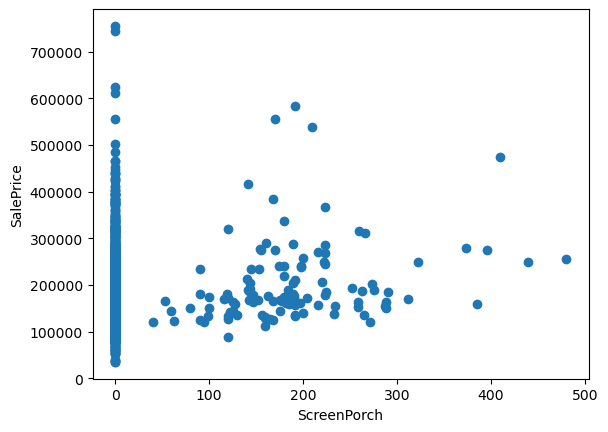

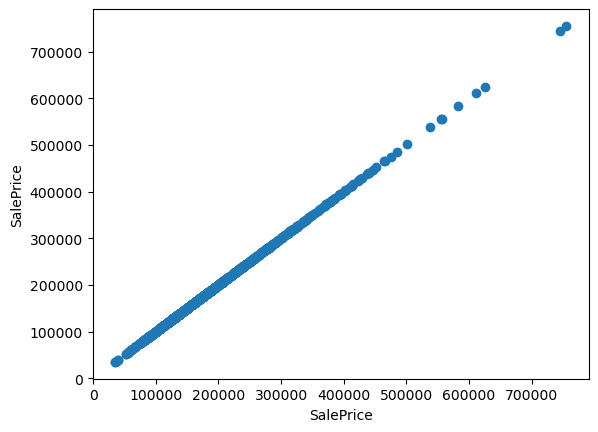

In [31]:
for feature in continious_variable:
    data = dataset.copy()
    plt.scatter(data[feature],data["SalePrice"])
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.show()

KeyError: "None of [Index([(4.174387269895637, 4.382026634673881, 4.219507705176107, 4.0943445622221, 4.430816798843313, 4.442651256490317, 4.31748811353631, nan, 3.9318256327243257, 3.912023005428146, 4.248495242049359, 4.442651256490317, nan, 4.51085950651685, nan, 3.9318256327243257, nan, 4.276666119016055, 4.189654742026425, 4.248495242049359, 4.61512051684126, 4.04305126783455, 4.31748811353631, 3.784189633918261, nan, 4.700480365792417, 4.0943445622221, 4.584967478670572, 3.8501476017100584, 4.0943445622221, 3.912023005428146, nan, 4.442651256490317, 4.248495242049359, 4.0943445622221, 4.68213122712422, 4.718498871295094, 4.30406509320417, 4.219507705176107, 4.174387269895637, 4.430816798843313, 4.74493212836325, nan, nan, 4.248495242049359, 4.110873864173311, 3.871201010907891, 4.430816798843313, 3.4965075614664802, 4.189654742026425, nan, 3.9512437185814275, 4.700480365792417, 4.219507705176107, 4.0943445622221, 4.605170185988092, 3.1780538303479458, 4.48863636973214, 4.189654742026425, 4.0943445622221, 4.143134726391533, 4.0943445622221, 3.784189633918261, 3.912023005428146, nan, 4.330733340286331, nan, 4.276666119016055, 3.8501476017100584, 4.394449154672439, 4.553876891600541, 4.23410650459726, 4.30406509320417, 4.442651256490317, 4.0943445622221, 3.044522437723423, nan, 3.912023005428146, 4.276666119016055, 4.0943445622221, 4.605170185988092, 3.4657359027997265, 4.356708826689592, 4.382026634673881, nan, 4.795790545596741, 4.804021044733257, 3.6888794541139363, 4.653960350157523, 4.0943445622221, 4.0943445622221, 4.442651256490317, 4.382026634673881, 4.0943445622221, 4.23410650459726, nan, 4.356708826689592, 4.290459441148391, 4.442651256490317, 4.343805421853684, ...)], dtype='object')] are in the [columns]"

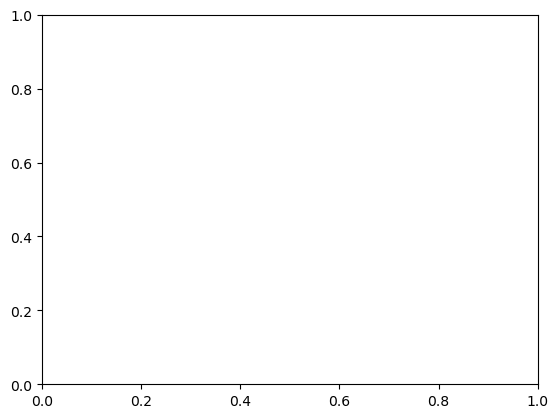

In [32]:
# now visualizing the outliers in my dataset
for feature in continious_variable:
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        
        data.boxplot(column = data[feature])
        plt.title(feature)
        plt.show()

In [ ]:
# there are many outliers present

In [33]:
# now working on categorical variables
categorical_variable = [variable for variable in dataset.columns if dataset[variable].dtypes == 'O']
categorical_variable # these are the columns which have categorical values

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [34]:
# now let us visualize that for each categorical column how many unique values are present
for feature in categorical_variable:
    print(" The feature is {} and the number of unique values present is {}".format(feature,len(dataset[feature].unique())))

 The feature is MSZoning and the number of unique values present is 5
 The feature is Street and the number of unique values present is 2
 The feature is Alley and the number of unique values present is 3
 The feature is LotShape and the number of unique values present is 4
 The feature is LandContour and the number of unique values present is 4
 The feature is Utilities and the number of unique values present is 2
 The feature is LotConfig and the number of unique values present is 5
 The feature is LandSlope and the number of unique values present is 3
 The feature is Neighborhood and the number of unique values present is 25
 The feature is Condition1 and the number of unique values present is 9
 The feature is Condition2 and the number of unique values present is 8
 The feature is BldgType and the number of unique values present is 5
 The feature is HouseStyle and the number of unique values present is 8
 The feature is RoofStyle and the number of unique values present is 6
 The fe

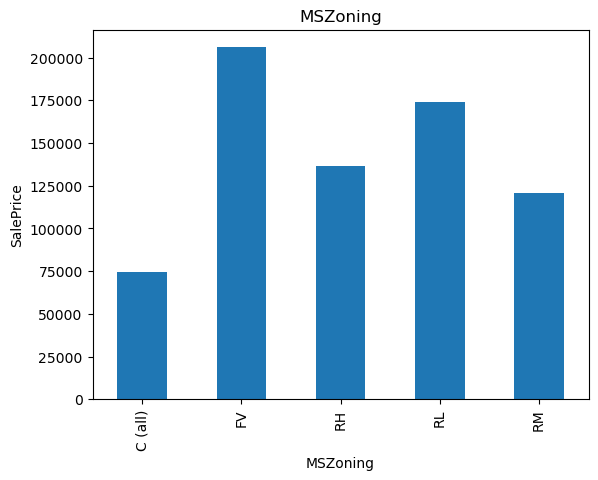

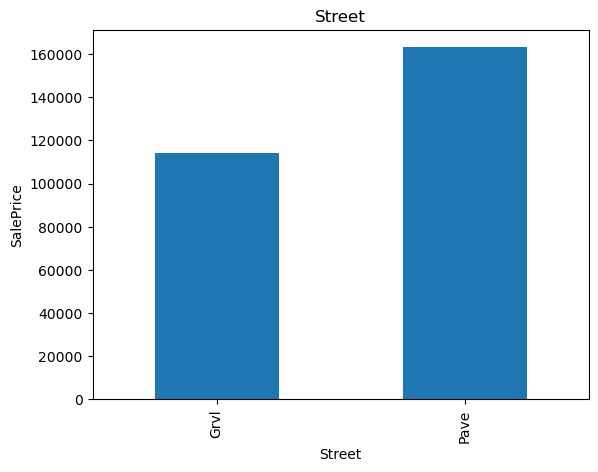

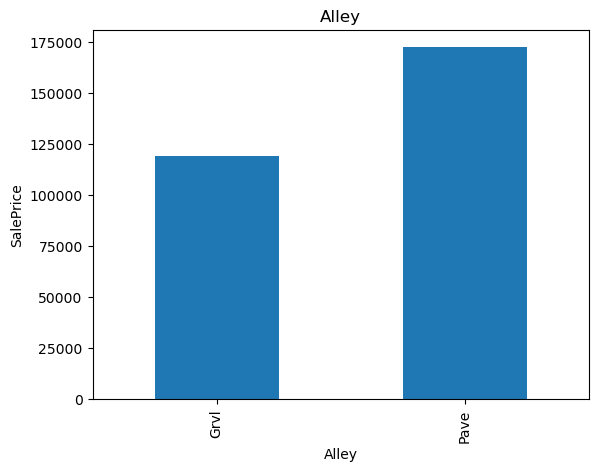

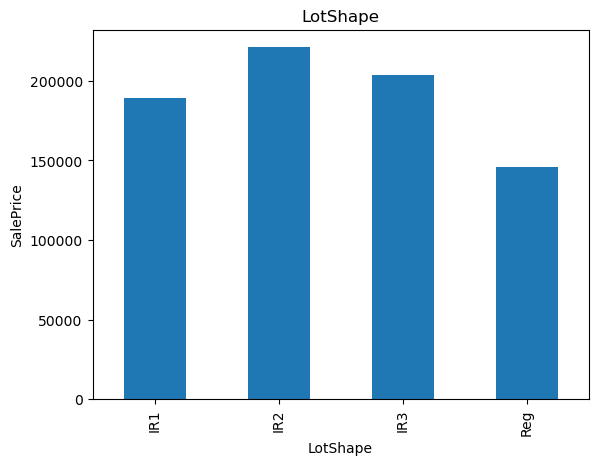

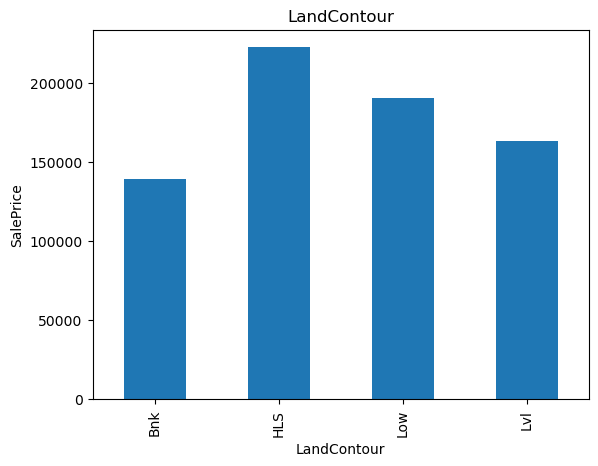

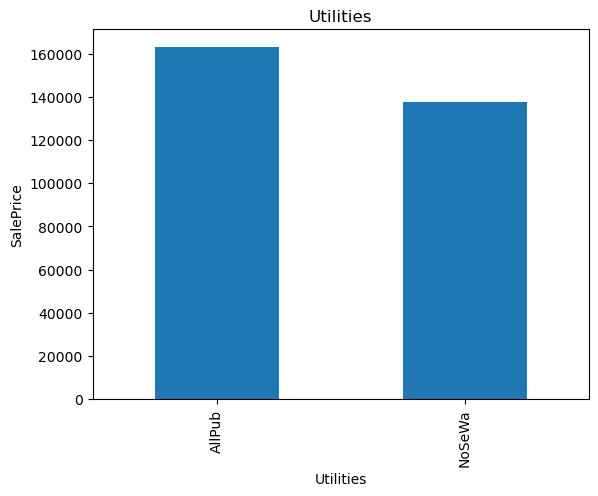

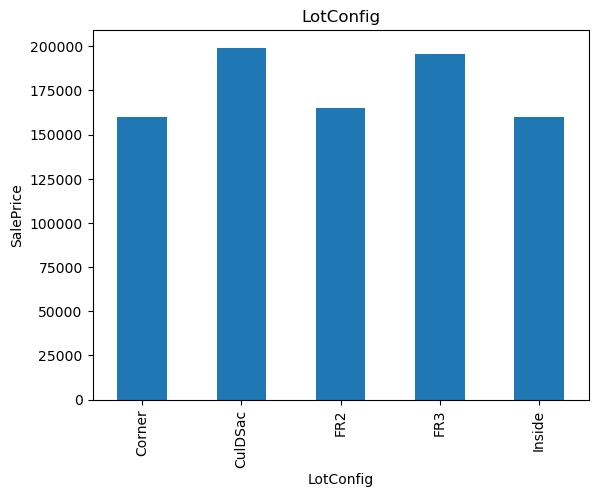

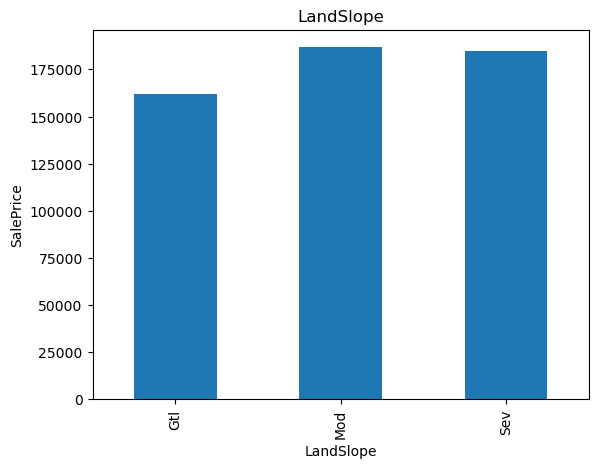

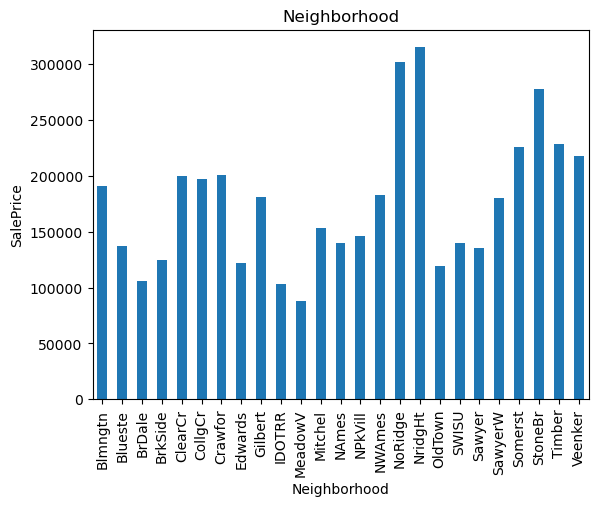

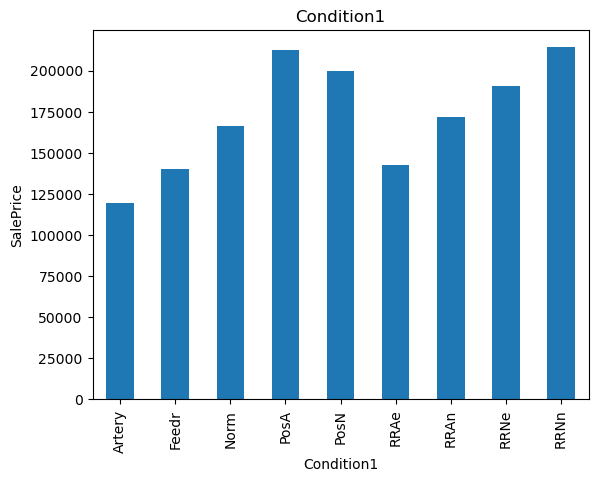

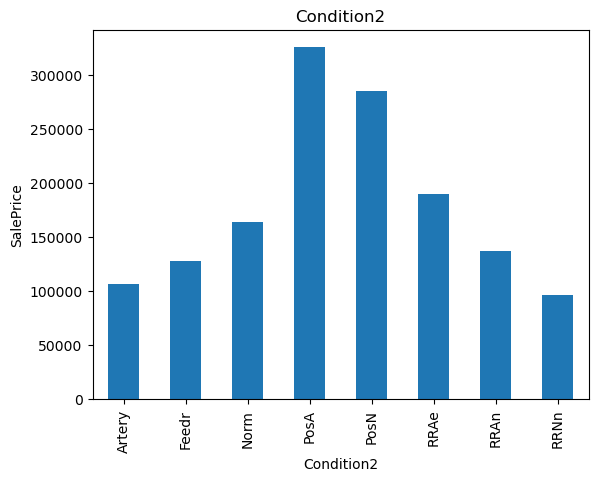

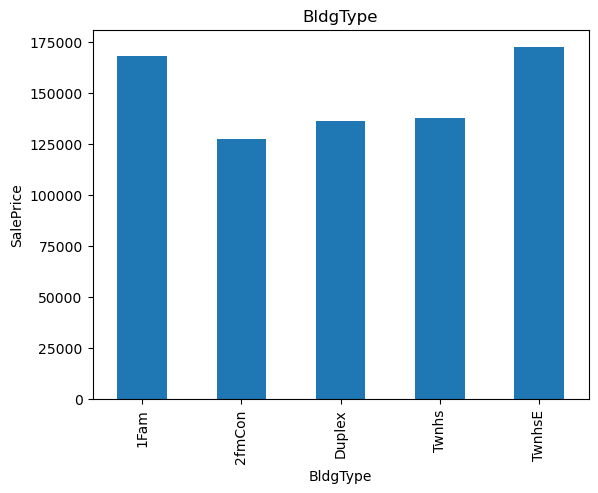

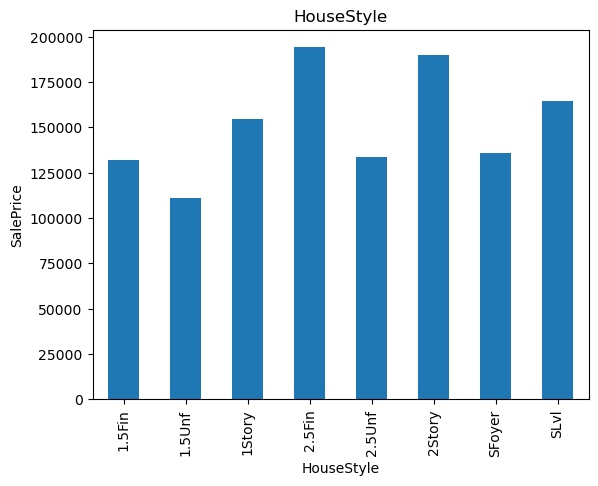

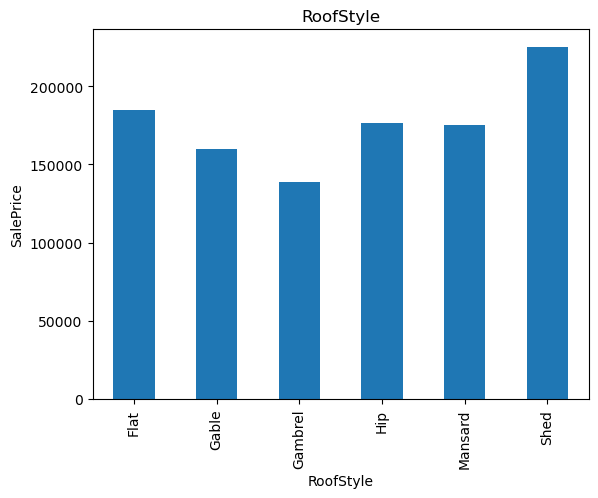

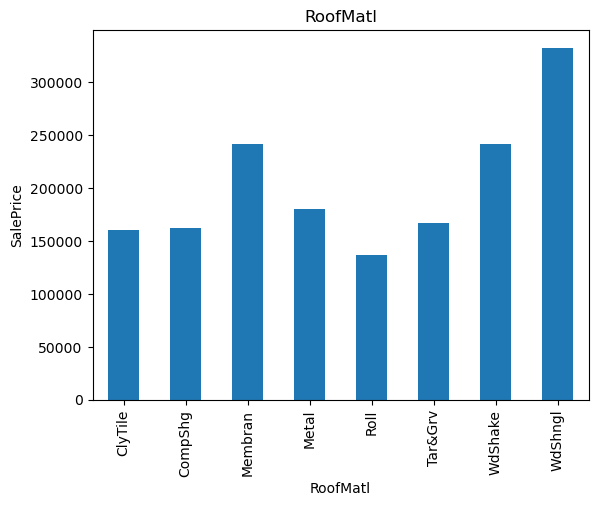

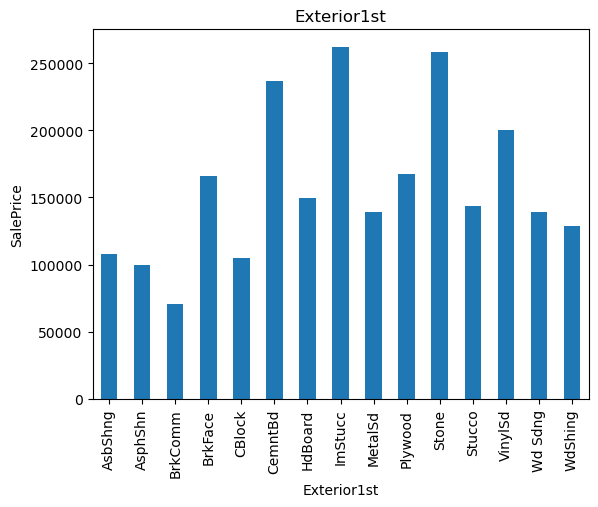

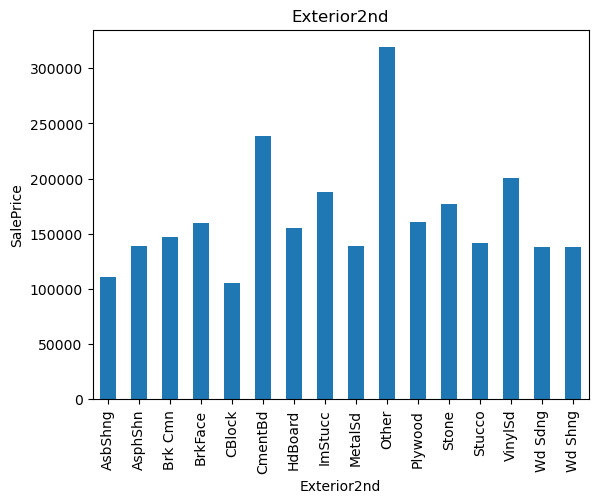

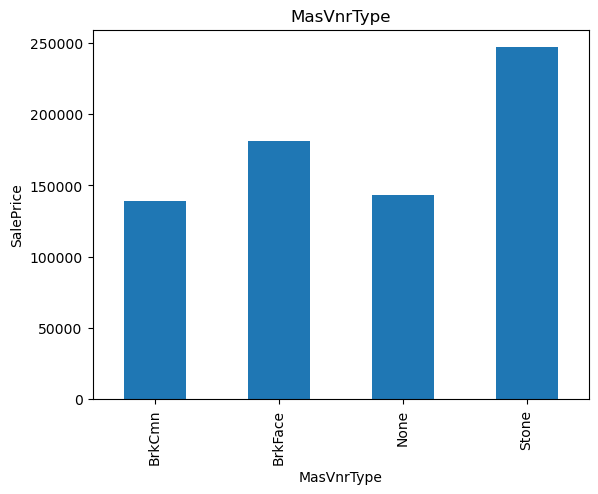

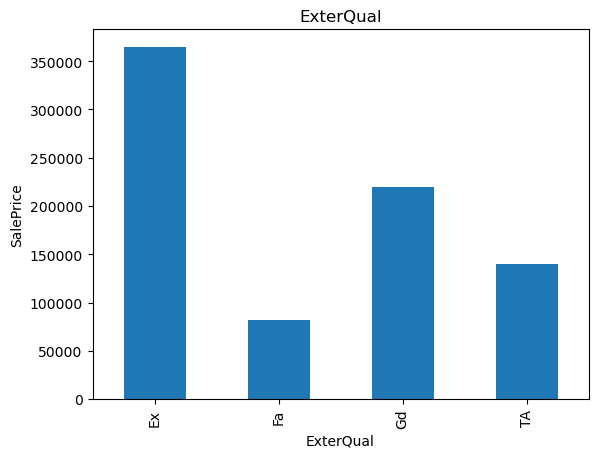

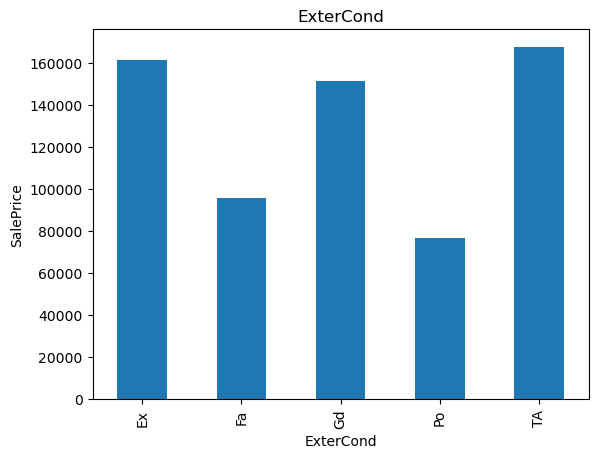

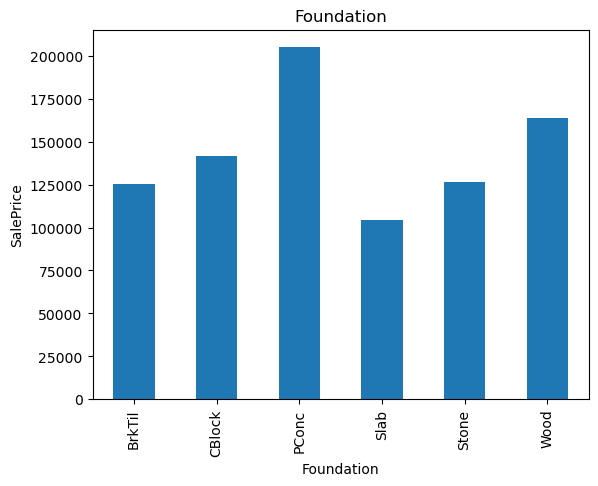

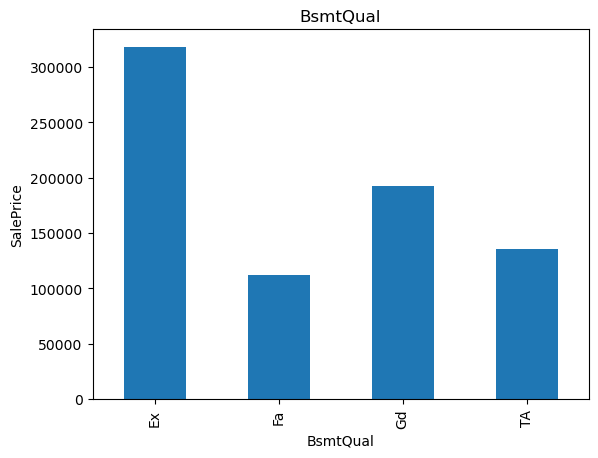

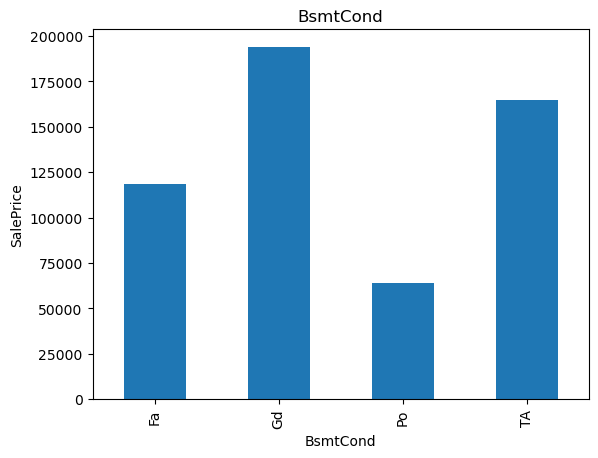

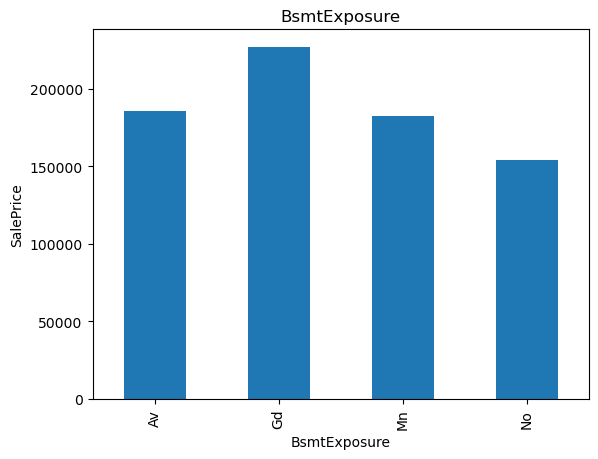

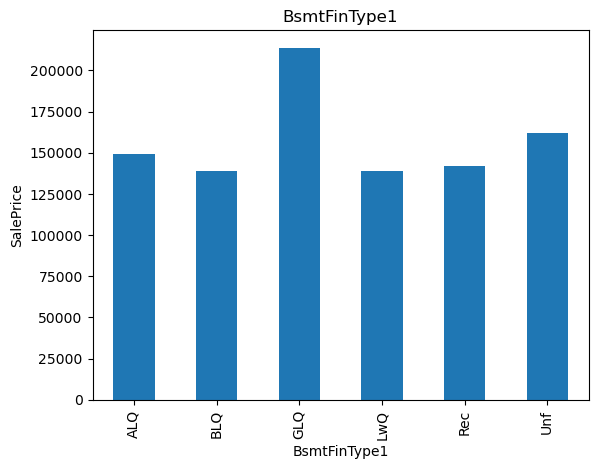

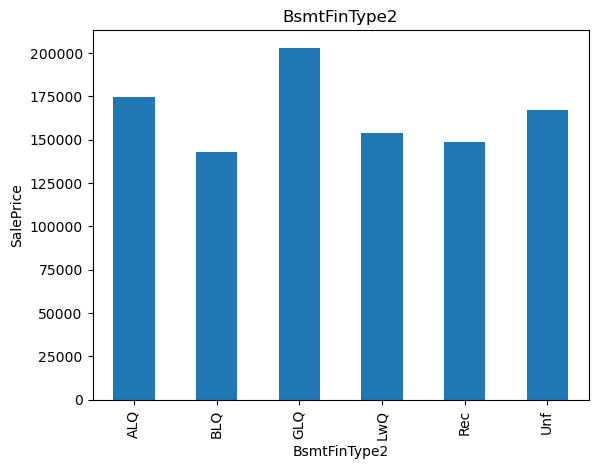

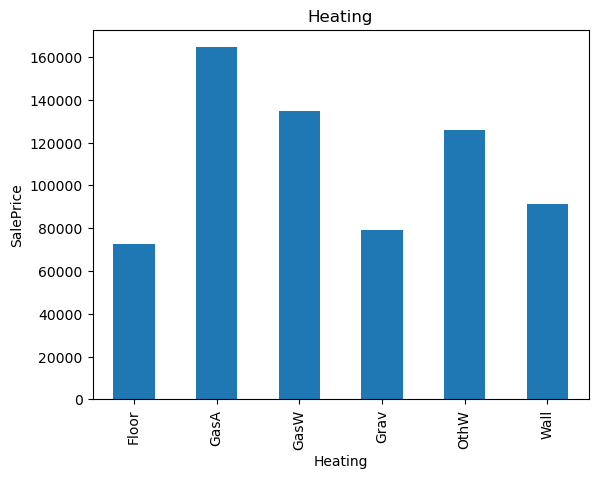

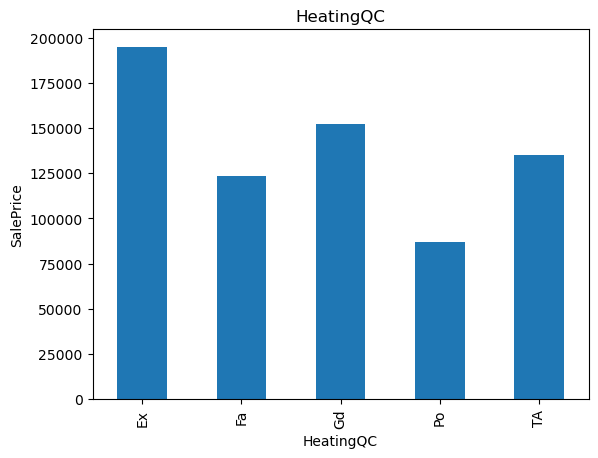

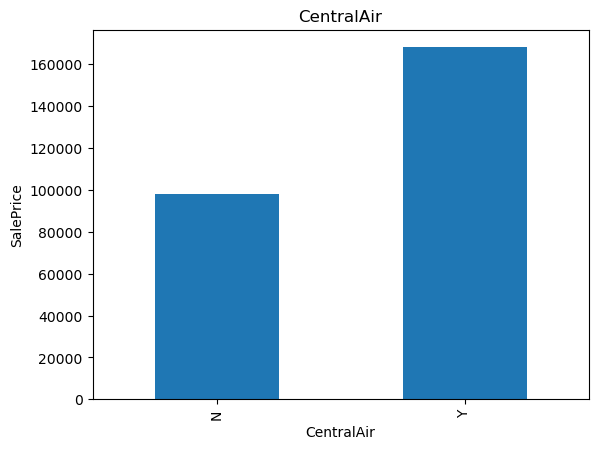

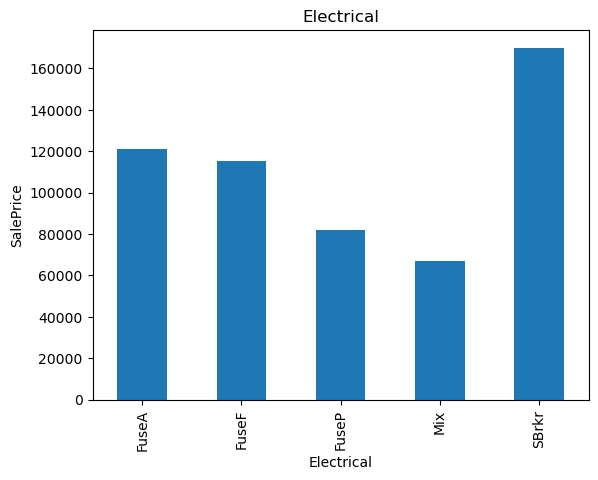

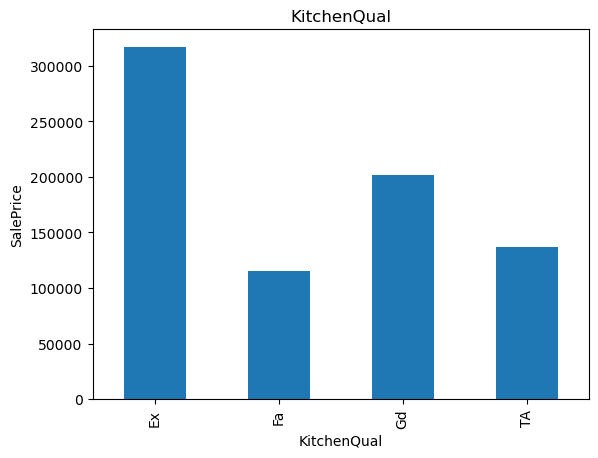

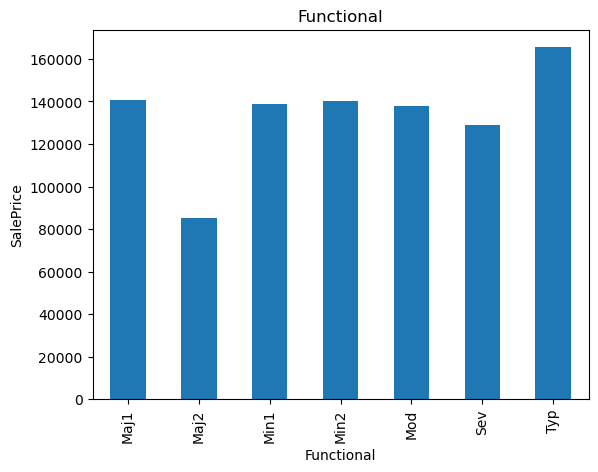

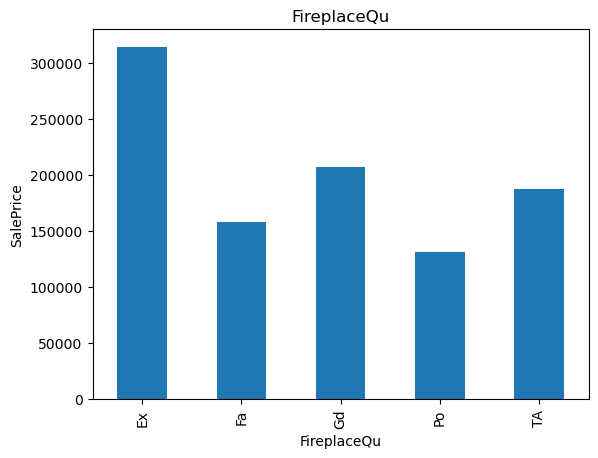

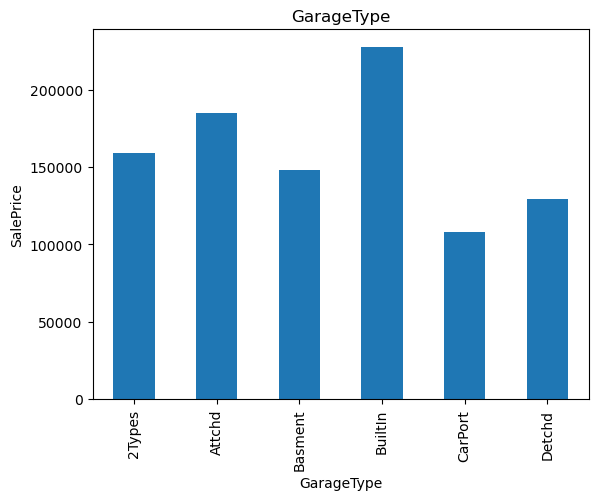

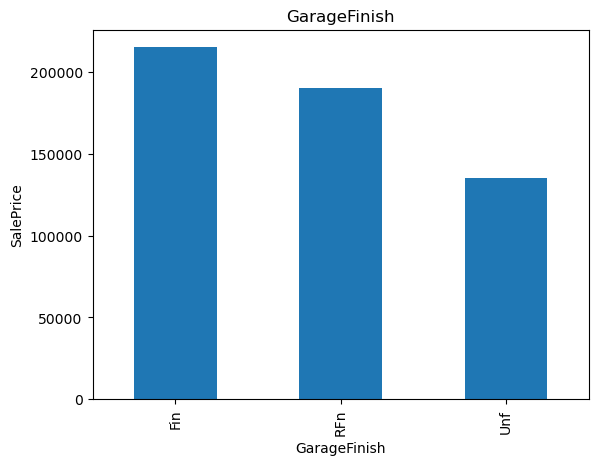

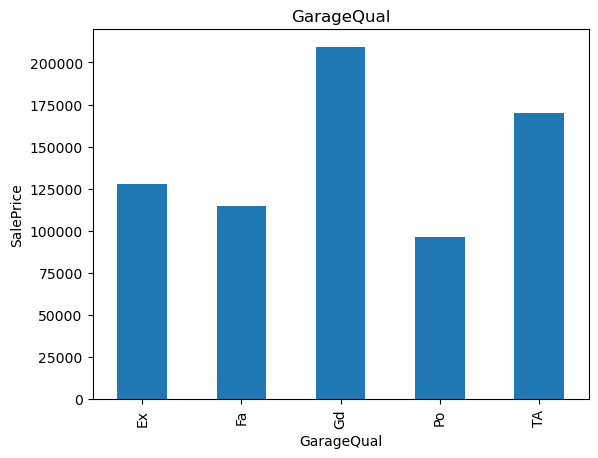

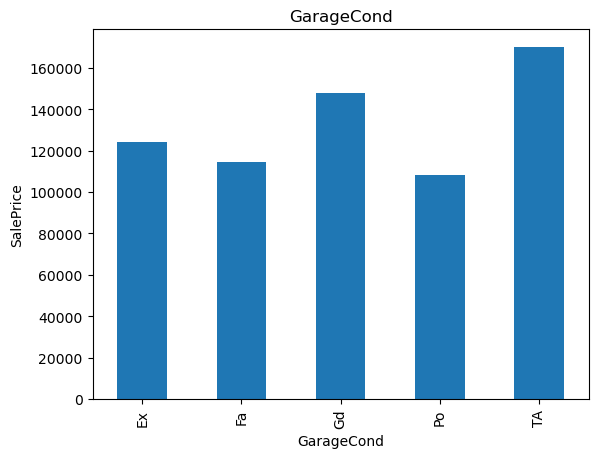

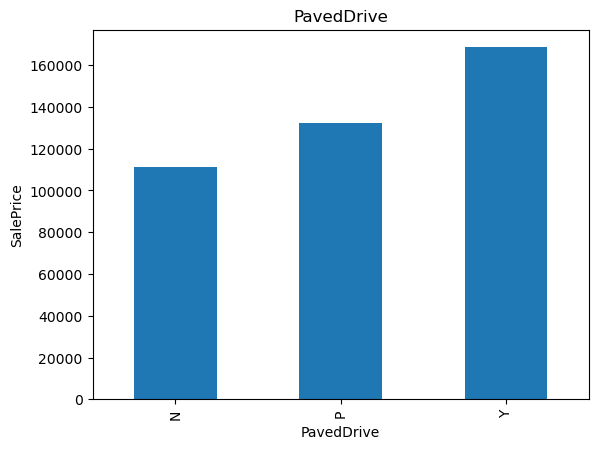

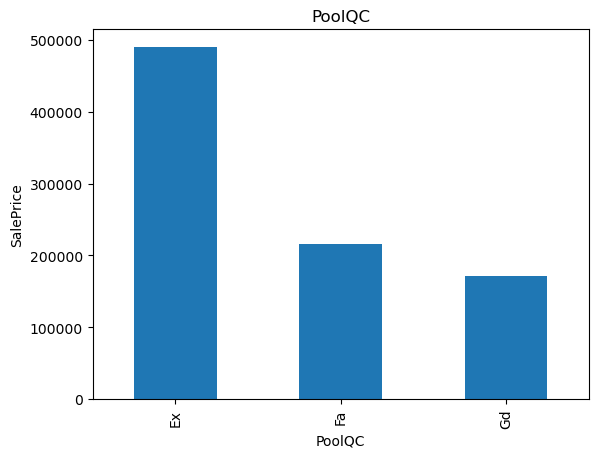

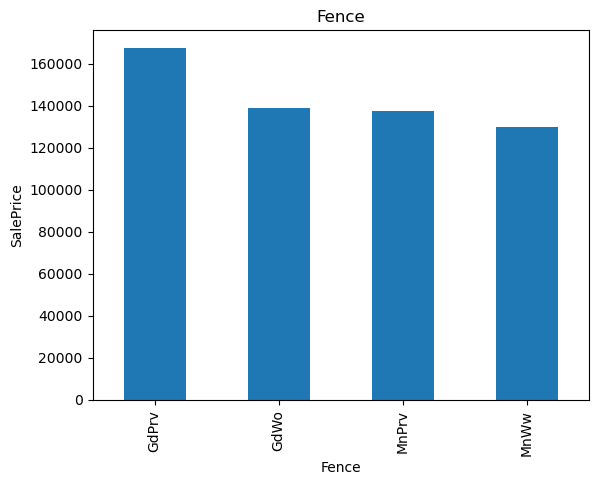

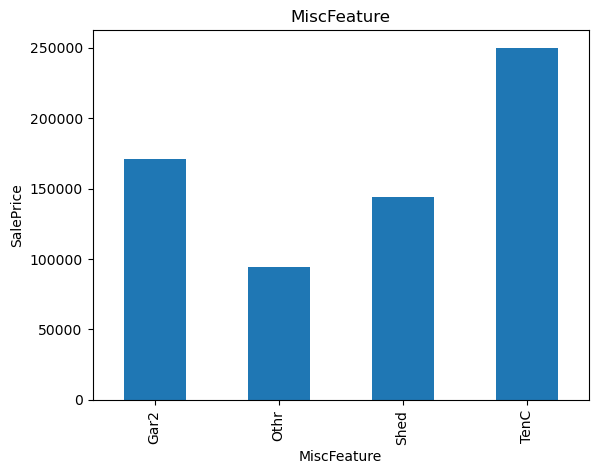

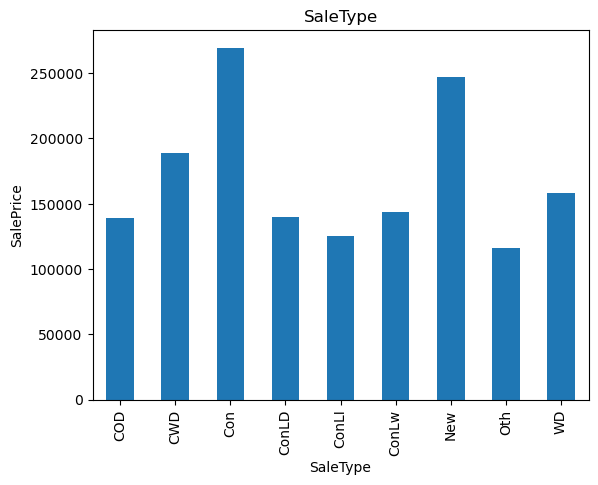

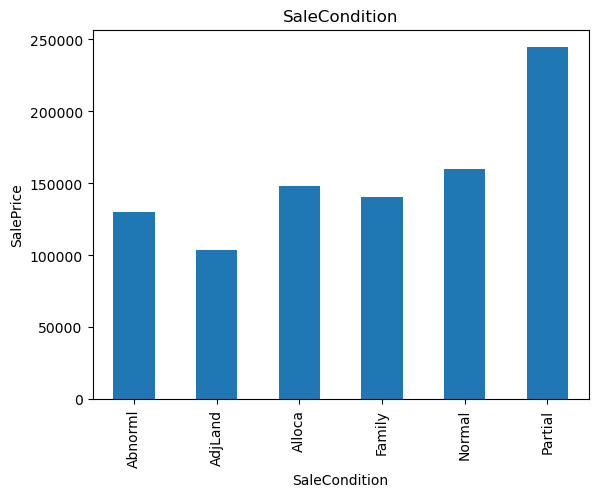

In [35]:
for feature in categorical_variable:
    data = dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar() # for a feature in my loop i grouped all unique values and for those unique values i find the median of saleprice in dataset
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [36]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# now doing feature engineering on my dataset

In [37]:
import pandas

In [38]:
pd.pandas.set_option('display.max_columns',None)

In [39]:
pd.pandas.set_option('display.max_columns', None)

In [40]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [41]:
dataset1 = dataset.drop(columns = ["SalePrice"])

In [42]:
# splitting the dataset into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(dataset1,dataset['SalePrice'],test_size = 0.2,random_state = 42)

In [43]:
x_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
254    255          20       RL         70.0     8400   Pave   NaN      Reg   
1066  1067          60       RL         59.0     7837   Pave   NaN      IR1   
638    639          30       RL         67.0     8777   Pave   NaN      Reg   
799    800          50       RL         60.0     7200   Pave   NaN      Reg   
380    381          50       RL         50.0     5000   Pave  Pave      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1095  1096          20       RL         78.0     9317   Pave   NaN      IR1   
1130  1131          50       RL         65.0     7804   Pave   NaN      Reg   
1294  1295          20       RL         60.0     8172   Pave   NaN      Reg   
860    861          50       RL         55.0     7642   Pave   NaN      Reg   
1126  1127         120       RL         53.0     3684   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
254          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1066         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
638          Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
799          Lvl    AllPub    Corner       Gtl        SWISU      Feedr   
380          Lvl    AllPub    Inside       Gtl        SWISU       Norm   
...          ...       ...       ...       ...          ...        ...   
1095         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1130         Lvl    AllPub    Inside       Gtl        SWISU       Norm   
1294         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
860          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
1126         Lvl    AllPub    Inside       Gtl      Blmngtn       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
254        Norm     1Fam     1Story            5            6       1957   
1066       Norm     1Fam     2Story            6            7       1993   
638        Norm     1Fam     1Story            5            7       1910   
799        Norm     1Fam     1.5Fin            5            7       1937   
380        Norm     1Fam     1.5Fin            5            6       1924   
...         ...      ...        ...          ...          ...        ...   
1095       Norm     1Fam     1Story            6            5       2006   
1130       Norm     1Fam     1.5Fin            4            3       1928   
1294       Norm     1Fam     1Story            5            7       1955   
860        Norm     1Fam     1.5Fin            7            8       1918   
1126       Norm   TwnhsE     1Story            7            5       2007   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
254           1957     Gable  CompShg     MetalSd     MetalSd       None   
1066          1994     Gable  CompShg     VinylSd     VinylSd       None   
638           1950     Gable  CompShg     MetalSd     Wd Sdng       None   
799           1950     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
380           1950     Gable  CompShg     BrkFace     Wd Sdng       None   
...            ...       ...      ...         ...         ...        ...   
1095          2006     Gable  CompShg     VinylSd     VinylSd       None   
1130          1950     Gable  CompShg     WdShing     Plywood       None   
1294          1990       Hip  CompShg     WdShing     Plywood       None   
860           1998     Gable  CompShg     Wd Sdng     Wd Sdng       None   
1126          2007       Hip  CompShg     VinylSd     VinylSd    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
254          0.0        TA        Gd     CBlock       TA       TA   
1066         0.0        Gd        TA      PConc       Gd       TA   
638          0.0        TA        TA     CBlock       Fa       TA   
799        252.0        TA        TA     BrkTil       Gd       TA   

In [44]:
x_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
892    893          20       RL         70.0     8414   Pave   NaN      Reg   
1105  1106          60       RL         98.0    12256   Pave   NaN      IR1   
413    414          30       RM         56.0     8960   Pave  Grvl      Reg   
522    523          50       RM         50.0     5000   Pave   NaN      Reg   
1036  1037          20       RL         89.0    12898   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
479    480          30       RM         50.0     5925   Pave   NaN      Reg   
1361  1362          20       RL        124.0    16158   Pave   NaN      IR1   
802    803          60       RL         63.0     8199   Pave   NaN      Reg   
651    652          70       RL         60.0     9084   Pave   NaN      Reg   
722    723          20       RL         70.0     8120   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
892          Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1105         Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
413          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
522          Lvl    AllPub    Corner       Gtl      BrkSide      Feedr   
1036         HLS    AllPub    Inside       Gtl       Timber       Norm   
...          ...       ...       ...       ...          ...        ...   
479          Bnk    AllPub    Inside       Gtl      OldTown       Norm   
1361         Low    AllPub    Inside       Mod      StoneBr       Norm   
802          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
651          Lvl    AllPub    Inside       Gtl      Edwards     Artery   
722          Lvl    AllPub    Inside       Gtl        NAmes       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
892        Norm     1Fam     1Story            6            8       1963   
1105       Norm     1Fam     2Story            8            5       1994   
413        Norm     1Fam     1Story            5            6       1927   
522        Norm     1Fam     1.5Fin            6            7       1947   
1036       Norm     1Fam     1Story            9            5       2007   
...         ...      ...        ...          ...          ...        ...   
479        Norm     1Fam     1Story            4            7       1937   
1361       Norm     1Fam     1Story            7            5       2005   
802        Norm     1Fam     2Story            7            5       2005   
651        Norm     1Fam     2Story            4            5       1940   
722        Norm     1Fam     1Story            4            7       1970   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
892           2003       Hip  CompShg     HdBoard     HdBoard       None   
1105          1995     Gable  CompShg     HdBoard     HdBoard    BrkFace   
413           1950     Gable  CompShg     WdShing     Wd Shng       None   
522           1950     Gable  CompShg     CemntBd     CmentBd       None   
1036          2008       Hip  CompShg     VinylSd     VinylSd      Stone   
...            ...       ...      ...         ...         ...        ...   
479           2000       Hip  CompShg      Stucco      Stucco     BrkCmn   
1361          2005       Hip  CompShg     VinylSd     VinylSd      Stone   
802           2005     Gable  CompShg     WdShing     Wd Shng       None   
651           1950     Gable  CompShg     MetalSd     MetalSd       None   
722           1970     Gable  CompShg     MetalSd     MetalSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
892          0.0        TA        TA     CBlock       TA       TA   
1105       362.0        Gd        TA      PConc       Ex       TA   
413          0.0        TA        TA     CBlock       TA       TA   
522          0.0        TA        Gd     CBlock       TA       TA   

In [45]:
y_train

254     145000
1066    178000
638      85000
799     175000
380     127000
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1168, dtype: int64

In [46]:
# now in feature Engineering first we will try to fill all the nan values 
# let us do for categorical variable
feature_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>0 and dataset[feature].dtypes == 'O']


In [47]:
for feature in feature_nan:
    print("the percentage missing values of {} is {}".format(feature ,np.round(dataset[feature].isnull().mean()*100,4)))

the percentage missing values of Alley is 93.7671
the percentage missing values of MasVnrType is 0.5479
the percentage missing values of BsmtQual is 2.5342
the percentage missing values of BsmtCond is 2.5342
the percentage missing values of BsmtExposure is 2.6027
the percentage missing values of BsmtFinType1 is 2.5342
the percentage missing values of BsmtFinType2 is 2.6027
the percentage missing values of Electrical is 0.0685
the percentage missing values of FireplaceQu is 47.2603
the percentage missing values of GarageType is 5.5479
the percentage missing values of GarageFinish is 5.5479
the percentage missing values of GarageQual is 5.5479
the percentage missing values of GarageCond is 5.5479
the percentage missing values of PoolQC is 99.5205
the percentage missing values of Fence is 80.7534
the percentage missing values of MiscFeature is 96.3014


In [48]:
# replacing missing values of categorical variable
def replace_cat_feature(dataset,features_nan):
    data = dataset.copy()
    data[feature_nan] = data[feature_nan].fillna('Missing')
    return data

In [49]:
dataset = replace_cat_feature(dataset,feature_nan)

In [50]:
dataset[feature_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [51]:
# now do the missing value management for numerical variables
numericals_with_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>0 and dataset[feature].dtype != 'O']
numericals_with_nan

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [52]:
for feature in numericals_with_nan:
    print(" the percentage value for the feature {} is {}".format(feature,np.round(dataset[feature].isnull().mean()*100,4)))

 the percentage value for the feature LotFrontage is 17.7397
 the percentage value for the feature MasVnrArea is 0.5479
 the percentage value for the feature GarageYrBlt is 5.5479


In [53]:
# replacing the missing values of numerical variables with median of particular variable
for feature in numericals_with_nan:
    median_value = dataset[feature].median()
    # create a new column in dataset which will capture the missing avles
    dataset[feature + 'nan'] = np.where(dataset[feature].isnull(),1,0)
    dataset[feature] = dataset[feature].fillna(median_value)

In [54]:
dataset.isnull().sum().sum()

0

# Handling date time variables

In [55]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    dataset[feature]=dataset['YrSold']-dataset[feature]

In [56]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Missing      Reg   
1   2          20       RL         80.0     9600   Pave  Missing      Reg   
2   3          60       RL         68.0    11250   Pave  Missing      IR1   
3   4          70       RL         60.0     9550   Pave  Missing      IR1   
4   5          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd       None   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1      

In [57]:
for feature in continious_variable:
    dataset[feature] = np.log(dataset[feature])

C:\Users\rajpu\anaconda7\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [58]:
# handling rare categorical features
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtypes == 'O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [59]:
len(categorical_features)

43

In [60]:
for feature in categorical_features:
     temp = dataset.groupby(feature)["SalePrice"].count()/len(dataset)
     temp_d = temp[temp<0.01].index
    
    
    
     
    



    

In [62]:
for feature in categorical_features:
     temp = dataset.groupby(feature)["SalePrice"].count()/len(dataset)
     temp_df = temp[temp<0.01].index
     dataset[feature] = np.where(dataset[feature].isin(temp_df),"rare",dataset[feature])
    

In [63]:
temp

SaleCondition
Abnorml    0.069178
AdjLand    0.002740
Alloca     0.008219
Family     0.013699
Normal     0.820548
Partial    0.085616
Name: SalePrice, dtype: float64

In [64]:
temp_df

Index(['AdjLand', 'Alloca'], dtype='object', name='SaleCondition')

In [65]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0   1          60       RL     4.174387  9.041922   Pave  Missing      Reg   
1   2          20       RL     4.382027  9.169518   Pave  Missing      Reg   
2   3          60       RL     4.219508  9.328123   Pave  Missing      IR1   
3   4          70       RL     4.094345  9.164296   Pave  Missing      IR1   
4   5          60       RL     4.430817  9.565214   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl         rare      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd       None   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    5.278115        Gd        TA      PConc       Gd       TA           No   
1        -inf        TA        TA     CBlock       Gd       TA           Gd   
2    5.087596        Gd        TA      PConc       Gd       TA           Mn   
3        -inf        TA        TA     BrkTil       TA       Gd           No   
4    5.857933        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ    6.559615          Unf        -inf   5.010635     6.752270   
1          ALQ    6.885510          Unf        -inf   5.648974     7.140453   
2          GLQ    6.186209          Unf        -inf   6.073045     6.824374   
3          ALQ    5.375278          Unf        -inf   6.291569     6.628041   
4          GLQ    6.484635          Unf        -inf   6.194405     7.043160   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr  6.752270  6.749931             0   
1    GasA        Ex          Y      SBrkr  7.140453      -inf             0   
2    GasA        Ex          Y      SBrkr  6.824374  6.763885             0   
3    GasA        Gd          Y      SBrkr  6.867974  6.628041             0   
4    GasA        Ex          Y      SBrkr  7.043160  6.959399             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   7.444249             1             0         2         1             3   
1   7.140453             0             1         2         0             3   
2   7.487734             1             0         2         1             3   
3   7.448334             1             0         1         0             3   
4   7.695303             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1

In [66]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0   1          60       RL     4.174387  9.041922   Pave  Missing      Reg   
1   2          20       RL     4.382027  9.169518   Pave  Missing      Reg   
2   3          60       RL     4.219508  9.328123   Pave  Missing      IR1   
3   4          70       RL     4.094345  9.164296   Pave  Missing      IR1   
4   5          60       RL     4.430817  9.565214   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl         rare      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd       None   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    5.278115        Gd        TA      PConc       Gd       TA           No   
1        -inf        TA        TA     CBlock       Gd       TA           Gd   
2    5.087596        Gd        TA      PConc       Gd       TA           Mn   
3        -inf        TA        TA     BrkTil       TA       Gd           No   
4    5.857933        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ    6.559615          Unf        -inf   5.010635     6.752270   
1          ALQ    6.885510          Unf        -inf   5.648974     7.140453   
2          GLQ    6.186209          Unf        -inf   6.073045     6.824374   
3          ALQ    5.375278          Unf        -inf   6.291569     6.628041   
4          GLQ    6.484635          Unf        -inf   6.194405     7.043160   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr  6.752270  6.749931             0   
1    GasA        Ex          Y      SBrkr  7.140453      -inf             0   
2    GasA        Ex          Y      SBrkr  6.824374  6.763885             0   
3    GasA        Gd          Y      SBrkr  6.867974  6.628041             0   
4    GasA        Ex          Y      SBrkr  7.043160  6.959399             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   7.444249             1             0         2         1             3   
1   7.140453             0             1         2         0             3   
2   7.487734             1             0         2         1             3   
3   7.448334             1             0         1         0             3   
4   7.695303             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1

# now doing one hot encoding

In [67]:
from sklearn.preprocessing import OneHotEncoder

In [68]:
one_hot_converted_columns = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']
one_hot_converted_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [70]:
encoder = OneHotEncoder()
encoder.fit(dataset[one_hot_converted_columns])
encoded_data = pd.DataFrame(encoder.transform(dataset[one_hot_converted_columns]).toarray())

encoded_data.columns = encoder.get_feature_names_out()

dataset.drop(one_hot_converted_columns, axis=1, inplace=True)

dataset = pd.concat([dataset, encoded_data], axis=1)



In [75]:
dataset.head(10)

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60     4.174387  9.041922            7            5          5   
1   2          20     4.382027  9.169518            6            8         31   
2   3          60     4.219508  9.328123            7            5          7   
3   4          70     4.094345  9.164296            7            5         91   
4   5          60     4.430817  9.565214            8            5          8   
5   6          50     4.442651  9.554993            5            5         16   
6   7          20     4.317488  9.218705            8            5          3   
7   8          60     4.234107  9.247829            7            6         36   
8   9          50     3.931826  8.719317            7            5         77   
9  10         190     3.912023  8.911934            5            6         69   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             5    5.278115    6.559615        -inf   5.010635     6.752270   
1            31        -inf    6.885510        -inf   5.648974     7.140453   
2             6    5.087596    6.186209        -inf   6.073045     6.824374   
3            36        -inf    5.375278        -inf   6.291569     6.628041   
4             8    5.857933    6.484635        -inf   6.194405     7.043160   
5            14        -inf    6.595781        -inf   4.158883     6.679599   
6             2    5.225747    7.221836        -inf   5.758902     7.430114   
7            36    5.480639    6.755769    3.465736   5.375278     7.009409   
8            58        -inf        -inf        -inf   6.858565     6.858565   
9            58        -inf    6.746412        -inf   4.941642     6.898715   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  6.752270  6.749931             0   7.444249             1             0   
1  7.140453      -inf             0   7.140453             0             1   
2  6.824374  6.763885             0   7.487734             1             0   
3  6.867974  6.628041             0   7.448334             1             0   
4  7.043160  6.959399             0   7.695303             1             0   
5  6.679599  6.338594             0   7.216709             1             0   
6  7.434848      -inf             0   7.434848             1             0   
7  7.009409  6.890609             0   7.644919             1             0   
8  6.929517  6.622736             0   7.480992             0             0   
9  6.981935      -inf             0   6.981935             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   
5         1         1             1             1             5           0   
6         2         0             3             1             7           1   
7         2         1             3             1             7           2   
8         2         0             2             2             8           2   
9         1         0             2             2             5           2   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0          5.0           2    6.306275        -inf     4.110874   
1         31.0           2    6.131226    5.697093         -inf   
2          7.0           2    6.410175        -inf     3.737670   
3          8.0           3    6.464588        -inf     3.555348   
4          8.0           3    6.728629    5.257495     4.430817   
5         16.0           2    6.173786    3.688879     3.401197   
6          3.0           2    6.455199    5

In [74]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 254 entries, Id to SaleCondition_rare
dtypes: float64(230), int32(3), int64(21)
memory usage: 2.8 MB


In [78]:
dataset

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0        1          60     4.174387  9.041922            7            5   
1        2          20     4.382027  9.169518            6            8   
2        3          60     4.219508  9.328123            7            5   
3        4          70     4.094345  9.164296            7            5   
4        5          60     4.430817  9.565214            8            5   
...    ...         ...          ...       ...          ...          ...   
1455  1456          60     4.127134  8.976768            6            5   
1456  1457          20     4.442651  9.486076            6            6   
1457  1458          70     4.189655  9.109636            7            9   
1458  1459          20     4.219508  9.181632            5            6   
1459  1460          20     4.317488  9.204020            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0             5             5    5.278115    6.559615        -inf   5.010635   
1            31            31        -inf    6.885510        -inf   5.648974   
2             7             6    5.087596    6.186209        -inf   6.073045   
3            91            36        -inf    5.375278        -inf   6.291569   
4             8             8    5.857933    6.484635        -inf   6.194405   
...         ...           ...         ...         ...         ...        ...   
1455          8             7        -inf        -inf        -inf   6.859615   
1456         32            22    4.779123    6.672033    5.093750   6.378426   
1457         69             4        -inf    5.616771        -inf   6.776507   
1458         60            14        -inf    3.891820    6.936343       -inf   
1459         43            43        -inf    6.721426    5.669881   4.912655   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        6.752270  6.752270  6.749931             0   7.444249             1   
1        7.140453  7.140453      -inf             0   7.140453             0   
2        6.824374  6.824374  6.763885             0   7.487734             1   
3        6.628041  6.867974  6.628041             0   7.448334             1   
4        7.043160  7.043160  6.959399             0   7.695303             1   
...           ...       ...       ...           ...        ...           ...   
1455     6.859615  6.859615  6.542472             0   7.406711             0   
1456     7.340836  7.636752      -inf             0   7.636752             1   
1457     7.049255  7.080026  7.049255             0   7.757906             0   
1458     6.982863  6.982863      -inf             0   6.982863             1   
1459     7.135687  7.135687      -inf             0   7.135687             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0          5.0           2    6.306275   
1                6           1         31.0           2    6.131226   
2                6           1          7.0           2    6.410175   
3                7           1          8.0           3    6

In [82]:
for feature in dataset.columns:
    dataset[feature] = np.where(dataset[feature] == '-inf',0.1,dataset[feature])

In [83]:
dataset

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0        1.0        60.0     4.174387  9.041922          7.0          5.0   
1        2.0        20.0     4.382027  9.169518          6.0          8.0   
2        3.0        60.0     4.219508  9.328123          7.0          5.0   
3        4.0        70.0     4.094345  9.164296          7.0          5.0   
4        5.0        60.0     4.430817  9.565214          8.0          5.0   
...      ...         ...          ...       ...          ...          ...   
1455  1456.0        60.0     4.127134  8.976768          6.0          5.0   
1456  1457.0        20.0     4.442651  9.486076          6.0          6.0   
1457  1458.0        70.0     4.189655  9.109636          7.0          9.0   
1458  1459.0        20.0     4.219508  9.181632          5.0          6.0   
1459  1460.0        20.0     4.317488  9.204020          5.0          6.0   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0           5.0           5.0    5.278115    6.559615        -inf   5.010635   
1          31.0          31.0        -inf    6.885510        -inf   5.648974   
2           7.0           6.0    5.087596    6.186209        -inf   6.073045   
3          91.0          36.0        -inf    5.375278        -inf   6.291569   
4           8.0           8.0    5.857933    6.484635        -inf   6.194405   
...         ...           ...         ...         ...         ...        ...   
1455        8.0           7.0        -inf        -inf        -inf   6.859615   
1456       32.0          22.0    4.779123    6.672033    5.093750   6.378426   
1457       69.0           4.0        -inf    5.616771        -inf   6.776507   
1458       60.0          14.0        -inf    3.891820    6.936343       -inf   
1459       43.0          43.0        -inf    6.721426    5.669881   4.912655   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        6.752270  6.752270  6.749931           0.0   7.444249           1.0   
1        7.140453  7.140453      -inf           0.0   7.140453           0.0   
2        6.824374  6.824374  6.763885           0.0   7.487734           1.0   
3        6.628041  6.867974  6.628041           0.0   7.448334           1.0   
4        7.043160  7.043160  6.959399           0.0   7.695303           1.0   
...           ...       ...       ...           ...        ...           ...   
1455     6.859615  6.859615  6.542472           0.0   7.406711           0.0   
1456     7.340836  7.636752      -inf           0.0   7.636752           1.0   
1457     7.049255  7.080026  7.049255           0.0   7.757906           0.0   
1458     6.982863  6.982863      -inf           0.0   6.982863           1.0   
1459     7.135687  7.135687      -inf           0.0   7.135687           1.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0              0.0       2.0       1.0           3.0           1.0   
1              1.0       2.0       0.0           3.0           1.0   
2              0.0       2.0       1.0           3.0           1.0   
3              0.0       1.0       0.0           3.0           1.0   
4              0.0       2.0       1.0           4.0           1.0   
...            ...       ...       ...           ...           ...   
1455           0.0       2.0       1.0           3.0           1.0   
1456           0.0       2.0       0.0           3.0           1.0   
1457           0.0       2.0       0.0           4.0           1.0   
1458           0.0       1.0       0.0           2.0           1.0   
1459           0.0       1.0       1.0           3.0           1.0   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0              8.0         0.0          5.0         2.0    6.306275   
1              6.0         1.0         31.0         2.0    6.131226   
2              6.0         1.0          7.0         2.0    6.410175   
3              7.0         1.0        

In [93]:
import numpy as np

for feature in dataset.columns:
    for i in dataset.columns[feature]:
        np.where(dataset[feature][i] == '-inf',0.1.dataset[feature][i])
    
   


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [85]:
dataset

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0        1.0        60.0     4.174387  9.041922          7.0          5.0   
1        2.0        20.0     4.382027  9.169518          6.0          8.0   
2        3.0        60.0     4.219508  9.328123          7.0          5.0   
3        4.0        70.0     4.094345  9.164296          7.0          5.0   
4        5.0        60.0     4.430817  9.565214          8.0          5.0   
...      ...         ...          ...       ...          ...          ...   
1455  1456.0        60.0     4.127134  8.976768          6.0          5.0   
1456  1457.0        20.0     4.442651  9.486076          6.0          6.0   
1457  1458.0        70.0     4.189655  9.109636          7.0          9.0   
1458  1459.0        20.0     4.219508  9.181632          5.0          6.0   
1459  1460.0        20.0     4.317488  9.204020          5.0          6.0   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0           5.0           5.0    5.278115    6.559615        -inf   5.010635   
1          31.0          31.0        -inf    6.885510        -inf   5.648974   
2           7.0           6.0    5.087596    6.186209        -inf   6.073045   
3          91.0          36.0        -inf    5.375278        -inf   6.291569   
4           8.0           8.0    5.857933    6.484635        -inf   6.194405   
...         ...           ...         ...         ...         ...        ...   
1455        8.0           7.0        -inf        -inf        -inf   6.859615   
1456       32.0          22.0    4.779123    6.672033    5.093750   6.378426   
1457       69.0           4.0        -inf    5.616771        -inf   6.776507   
1458       60.0          14.0        -inf    3.891820    6.936343       -inf   
1459       43.0          43.0        -inf    6.721426    5.669881   4.912655   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        6.752270  6.752270  6.749931           0.0   7.444249           1.0   
1        7.140453  7.140453      -inf           0.0   7.140453           0.0   
2        6.824374  6.824374  6.763885           0.0   7.487734           1.0   
3        6.628041  6.867974  6.628041           0.0   7.448334           1.0   
4        7.043160  7.043160  6.959399           0.0   7.695303           1.0   
...           ...       ...       ...           ...        ...           ...   
1455     6.859615  6.859615  6.542472           0.0   7.406711           0.0   
1456     7.340836  7.636752      -inf           0.0   7.636752           1.0   
1457     7.049255  7.080026  7.049255           0.0   7.757906           0.0   
1458     6.982863  6.982863      -inf           0.0   6.982863           1.0   
1459     7.135687  7.135687      -inf           0.0   7.135687           1.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0              0.0       2.0       1.0           3.0           1.0   
1              1.0       2.0       0.0           3.0           1.0   
2              0.0       2.0       1.0           3.0           1.0   
3              0.0       1.0       0.0           3.0           1.0   
4              0.0       2.0       1.0           4.0           1.0   
...            ...       ...       ...           ...           ...   
1455           0.0       2.0       1.0           3.0           1.0   
1456           0.0       2.0       0.0           3.0           1.0   
1457           0.0       2.0       0.0           4.0           1.0   
1458           0.0       1.0       0.0           2.0           1.0   
1459           0.0       1.0       1.0           3.0           1.0   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0              8.0         0.0          5.0         2.0    6.306275   
1              6.0         1.0         31.0         2.0    6.131226   
2              6.0         1.0          7.0         2.0    6.410175   
3              7.0         1.0        

In [91]:
numerical_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [89]:
len(numerical_features)


38

In [94]:
import numpy as np

for feature in dataset.columns:
    dataset[feature] = np.where(dataset[feature] == '-inf', 0.1, dataset[feature])


In [95]:
dataset

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0        1.0        60.0     4.174387  9.041922          7.0          5.0   
1        2.0        20.0     4.382027  9.169518          6.0          8.0   
2        3.0        60.0     4.219508  9.328123          7.0          5.0   
3        4.0        70.0     4.094345  9.164296          7.0          5.0   
4        5.0        60.0     4.430817  9.565214          8.0          5.0   
...      ...         ...          ...       ...          ...          ...   
1455  1456.0        60.0     4.127134  8.976768          6.0          5.0   
1456  1457.0        20.0     4.442651  9.486076          6.0          6.0   
1457  1458.0        70.0     4.189655  9.109636          7.0          9.0   
1458  1459.0        20.0     4.219508  9.181632          5.0          6.0   
1459  1460.0        20.0     4.317488  9.204020          5.0          6.0   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0           5.0           5.0    5.278115    6.559615        -inf   5.010635   
1          31.0          31.0        -inf    6.885510        -inf   5.648974   
2           7.0           6.0    5.087596    6.186209        -inf   6.073045   
3          91.0          36.0        -inf    5.375278        -inf   6.291569   
4           8.0           8.0    5.857933    6.484635        -inf   6.194405   
...         ...           ...         ...         ...         ...        ...   
1455        8.0           7.0        -inf        -inf        -inf   6.859615   
1456       32.0          22.0    4.779123    6.672033    5.093750   6.378426   
1457       69.0           4.0        -inf    5.616771        -inf   6.776507   
1458       60.0          14.0        -inf    3.891820    6.936343       -inf   
1459       43.0          43.0        -inf    6.721426    5.669881   4.912655   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        6.752270  6.752270  6.749931           0.0   7.444249           1.0   
1        7.140453  7.140453      -inf           0.0   7.140453           0.0   
2        6.824374  6.824374  6.763885           0.0   7.487734           1.0   
3        6.628041  6.867974  6.628041           0.0   7.448334           1.0   
4        7.043160  7.043160  6.959399           0.0   7.695303           1.0   
...           ...       ...       ...           ...        ...           ...   
1455     6.859615  6.859615  6.542472           0.0   7.406711           0.0   
1456     7.340836  7.636752      -inf           0.0   7.636752           1.0   
1457     7.049255  7.080026  7.049255           0.0   7.757906           0.0   
1458     6.982863  6.982863      -inf           0.0   6.982863           1.0   
1459     7.135687  7.135687      -inf           0.0   7.135687           1.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0              0.0       2.0       1.0           3.0           1.0   
1              1.0       2.0       0.0           3.0           1.0   
2              0.0       2.0       1.0           3.0           1.0   
3              0.0       1.0       0.0           3.0           1.0   
4              0.0       2.0       1.0           4.0           1.0   
...            ...       ...       ...           ...           ...   
1455           0.0       2.0       1.0           3.0           1.0   
1456           0.0       2.0       0.0           3.0           1.0   
1457           0.0       2.0       0.0           4.0           1.0   
1458           0.0       1.0       0.0           2.0           1.0   
1459           0.0       1.0       1.0           3.0           1.0   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0              8.0         0.0          5.0         2.0    6.306275   
1              6.0         1.0         31.0         2.0    6.131226   
2              6.0         1.0          7.0         2.0    6.410175   
3              7.0         1.0        

In [96]:
import pandas as pd

# Assuming 'dataset' is your DataFrame
dataset.replace(0.1, dataset[feature].median(), inplace=True)


In [97]:
dataset

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0        1.0        60.0     4.174387  9.041922          7.0          5.0   
1        2.0        20.0     4.382027  9.169518          6.0          8.0   
2        3.0        60.0     4.219508  9.328123          7.0          5.0   
3        4.0        70.0     4.094345  9.164296          7.0          5.0   
4        5.0        60.0     4.430817  9.565214          8.0          5.0   
...      ...         ...          ...       ...          ...          ...   
1455  1456.0        60.0     4.127134  8.976768          6.0          5.0   
1456  1457.0        20.0     4.442651  9.486076          6.0          6.0   
1457  1458.0        70.0     4.189655  9.109636          7.0          9.0   
1458  1459.0        20.0     4.219508  9.181632          5.0          6.0   
1459  1460.0        20.0     4.317488  9.204020          5.0          6.0   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0           5.0           5.0    5.278115    6.559615    0.100000   5.010635   
1          31.0          31.0    0.100000    6.885510    0.100000   5.648974   
2           7.0           6.0    5.087596    6.186209    0.100000   6.073045   
3          91.0          36.0    0.100000    5.375278    0.100000   6.291569   
4           8.0           8.0    5.857933    6.484635    0.100000   6.194405   
...         ...           ...         ...         ...         ...        ...   
1455        8.0           7.0    0.100000    0.100000    0.100000   6.859615   
1456       32.0          22.0    4.779123    6.672033    5.093750   6.378426   
1457       69.0           4.0    0.100000    5.616771    0.100000   6.776507   
1458       60.0          14.0    0.100000    3.891820    6.936343   0.100000   
1459       43.0          43.0    0.100000    6.721426    5.669881   4.912655   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        6.752270  6.752270  6.749931           0.0   7.444249           1.0   
1        7.140453  7.140453  0.100000           0.0   7.140453           0.0   
2        6.824374  6.824374  6.763885           0.0   7.487734           1.0   
3        6.628041  6.867974  6.628041           0.0   7.448334           1.0   
4        7.043160  7.043160  6.959399           0.0   7.695303           1.0   
...           ...       ...       ...           ...        ...           ...   
1455     6.859615  6.859615  6.542472           0.0   7.406711           0.0   
1456     7.340836  7.636752  0.100000           0.0   7.636752           1.0   
1457     7.049255  7.080026  7.049255           0.0   7.757906           0.0   
1458     6.982863  6.982863  0.100000           0.0   6.982863           1.0   
1459     7.135687  7.135687  0.100000           0.0   7.135687           1.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0              0.0       2.0       1.0           3.0           1.0   
1              1.0       2.0       0.0           3.0           1.0   
2              0.0       2.0       1.0           3.0           1.0   
3              0.0       1.0       0.0           3.0           1.0   
4              0.0       2.0       1.0           4.0           1.0   
...            ...       ...       ...           ...           ...   
1455           0.0       2.0       1.0           3.0           1.0   
1456           0.0       2.0       0.0           3.0           1.0   
1457           0.0       2.0       0.0           4.0           1.0   
1458           0.0       1.0       0.0           2.0           1.0   
1459           0.0       1.0       1.0           3.0           1.0   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0              8.0         0.0          5.0         2.0    6.306275   
1              6.0         1.0         31.0         2.0    6.131226   
2              6.0         1.0          7.0         2.0    6.410175   
3              7.0         1.0        

In [99]:
dataset['OverallCond'].median()

5.0

In [101]:
for feature in dataset.columns:
    dataset.replace(0.1, dataset[feature].median(), inplace=True)

In [103]:
for feature in dataset.columns:
    dataset[feature].replace(730.500000, 0.1, inplace=True)


In [104]:
dataset

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0        1.0        60.0     4.174387  9.041922          7.0          5.0   
1        2.0        20.0     4.382027  9.169518          6.0          8.0   
2        3.0        60.0     4.219508  9.328123          7.0          5.0   
3        4.0        70.0     4.094345  9.164296          7.0          5.0   
4        5.0        60.0     4.430817  9.565214          8.0          5.0   
...      ...         ...          ...       ...          ...          ...   
1455  1456.0        60.0     4.127134  8.976768          6.0          5.0   
1456  1457.0        20.0     4.442651  9.486076          6.0          6.0   
1457  1458.0        70.0     4.189655  9.109636          7.0          9.0   
1458  1459.0        20.0     4.219508  9.181632          5.0          6.0   
1459  1460.0        20.0     4.317488  9.204020          5.0          6.0   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0           5.0           5.0    5.278115    6.559615    0.100000   5.010635   
1          31.0          31.0    0.100000    6.885510    0.100000   5.648974   
2           7.0           6.0    5.087596    6.186209    0.100000   6.073045   
3          91.0          36.0    0.100000    5.375278    0.100000   6.291569   
4           8.0           8.0    5.857933    6.484635    0.100000   6.194405   
...         ...           ...         ...         ...         ...        ...   
1455        8.0           7.0    0.100000    0.100000    0.100000   6.859615   
1456       32.0          22.0    4.779123    6.672033    5.093750   6.378426   
1457       69.0           4.0    0.100000    5.616771    0.100000   6.776507   
1458       60.0          14.0    0.100000    3.891820    6.936343   0.100000   
1459       43.0          43.0    0.100000    6.721426    5.669881   4.912655   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        6.752270  6.752270  6.749931           0.0   7.444249           1.0   
1        7.140453  7.140453  0.100000           0.0   7.140453           0.0   
2        6.824374  6.824374  6.763885           0.0   7.487734           1.0   
3        6.628041  6.867974  6.628041           0.0   7.448334           1.0   
4        7.043160  7.043160  6.959399           0.0   7.695303           1.0   
...           ...       ...       ...           ...        ...           ...   
1455     6.859615  6.859615  6.542472           0.0   7.406711           0.0   
1456     7.340836  7.636752  0.100000           0.0   7.636752           1.0   
1457     7.049255  7.080026  7.049255           0.0   7.757906           0.0   
1458     6.982863  6.982863  0.100000           0.0   6.982863           1.0   
1459     7.135687  7.135687  0.100000           0.0   7.135687           1.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0              0.0       2.0       1.0           3.0           1.0   
1              1.0       2.0       0.0           3.0           1.0   
2              0.0       2.0       1.0           3.0           1.0   
3              0.0       1.0       0.0           3.0           1.0   
4              0.0       2.0       1.0           4.0           1.0   
...            ...       ...       ...           ...           ...   
1455           0.0       2.0       1.0           3.0           1.0   
1456           0.0       2.0       0.0           3.0           1.0   
1457           0.0       2.0       0.0           4.0           1.0   
1458           0.0       1.0       0.0           2.0           1.0   
1459           0.0       1.0       1.0           3.0           1.0   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0              8.0         0.0          5.0         2.0    6.306275   
1              6.0         1.0         31.0         2.0    6.131226   
2              6.0         1.0          7.0         2.0    6.410175   
3              7.0         1.0        

In [105]:
x = dataset.drop(columns = ['Id','SalePrice'],axis = 1,inplace = True)

In [117]:
x = data.drop(columns= ["Id","SalePrice"])

In [118]:
x

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   


In [108]:
y = dataset['SalePrice']

KeyError: 'SalePrice'

In [120]:
dataset

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0           60.0     4.174387  9.041922          7.0          5.0        5.0   
1           20.0     4.382027  9.169518          6.0          8.0       31.0   
2           60.0     4.219508  9.328123          7.0          5.0        7.0   
3           70.0     4.094345  9.164296          7.0          5.0       91.0   
4           60.0     4.430817  9.565214          8.0          5.0        8.0   
...          ...          ...       ...          ...          ...        ...   
1455        60.0     4.127134  8.976768          6.0          5.0        8.0   
1456        20.0     4.442651  9.486076          6.0          6.0       32.0   
1457        70.0     4.189655  9.109636          7.0          9.0       69.0   
1458        20.0     4.219508  9.181632          5.0          6.0       60.0   
1459        20.0     4.317488  9.204020          5.0          6.0       43.0   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0              5.0    5.278115    6.559615    0.100000   5.010635   
1             31.0    0.100000    6.885510    0.100000   5.648974   
2              6.0    5.087596    6.186209    0.100000   6.073045   
3             36.0    0.100000    5.375278    0.100000   6.291569   
4              8.0    5.857933    6.484635    0.100000   6.194405   
...            ...         ...         ...         ...        ...   
1455           7.0    0.100000    0.100000    0.100000   6.859615   
1456          22.0    4.779123    6.672033    5.093750   6.378426   
1457           4.0    0.100000    5.616771    0.100000   6.776507   
1458          14.0    0.100000    3.891820    6.936343   0.100000   
1459          43.0    0.100000    6.721426    5.669881   4.912655   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        6.752270  6.752270  6.749931           0.0   7.444249           1.0   
1        7.140453  7.140453  0.100000           0.0   7.140453           0.0   
2        6.824374  6.824374  6.763885           0.0   7.487734           1.0   
3        6.628041  6.867974  6.628041           0.0   7.448334           1.0   
4        7.043160  7.043160  6.959399           0.0   7.695303           1.0   
...           ...       ...       ...           ...        ...           ...   
1455     6.859615  6.859615  6.542472           0.0   7.406711           0.0   
1456     7.340836  7.636752  0.100000           0.0   7.636752           1.0   
1457     7.049255  7.080026  7.049255           0.0   7.757906           0.0   
1458     6.982863  6.982863  0.100000           0.0   6.982863           1.0   
1459     7.135687  7.135687  0.100000           0.0   7.135687           1.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0              0.0       2.0       1.0           3.0           1.0   
1              1.0       2.0       0.0           3.0           1.0   
2              0.0       2.0       1.0           3.0           1.0   
3              0.0       1.0       0.0           3.0           1.0   
4              0.0       2.0       1.0           4.0           1.0   
...            ...       ...       ...           ...           ...   
1455           0.0       2.0       1.0           3.0           1.0   
1456           0.0       2.0       0.0           3.0           1.0   
1457           0.0       2.0       0.0           4.0           1.0   
1458           0.0       1.0       0.0           2.0           1.0   
1459           0.0       1.0       1.0           3.0           1.0   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0              8.0         0.0          5.0         2.0    6.306275   
1              6.0         1.0         31.0         2.0    6.131226   
2              6.0         1.0          7.0         2.0    6.410175   
3              7.0         1.0          8.0         3.0    6.464588   
4              9.0         1.0          8.0         3.0    

In [121]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(dataset,y,test_size = 0.2,random_state = 5)

In [109]:
dataset

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0           60.0     4.174387  9.041922          7.0          5.0        5.0   
1           20.0     4.382027  9.169518          6.0          8.0       31.0   
2           60.0     4.219508  9.328123          7.0          5.0        7.0   
3           70.0     4.094345  9.164296          7.0          5.0       91.0   
4           60.0     4.430817  9.565214          8.0          5.0        8.0   
...          ...          ...       ...          ...          ...        ...   
1455        60.0     4.127134  8.976768          6.0          5.0        8.0   
1456        20.0     4.442651  9.486076          6.0          6.0       32.0   
1457        70.0     4.189655  9.109636          7.0          9.0       69.0   
1458        20.0     4.219508  9.181632          5.0          6.0       60.0   
1459        20.0     4.317488  9.204020          5.0          6.0       43.0   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0              5.0    5.278115    6.559615    0.100000   5.010635   
1             31.0    0.100000    6.885510    0.100000   5.648974   
2              6.0    5.087596    6.186209    0.100000   6.073045   
3             36.0    0.100000    5.375278    0.100000   6.291569   
4              8.0    5.857933    6.484635    0.100000   6.194405   
...            ...         ...         ...         ...        ...   
1455           7.0    0.100000    0.100000    0.100000   6.859615   
1456          22.0    4.779123    6.672033    5.093750   6.378426   
1457           4.0    0.100000    5.616771    0.100000   6.776507   
1458          14.0    0.100000    3.891820    6.936343   0.100000   
1459          43.0    0.100000    6.721426    5.669881   4.912655   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        6.752270  6.752270  6.749931           0.0   7.444249           1.0   
1        7.140453  7.140453  0.100000           0.0   7.140453           0.0   
2        6.824374  6.824374  6.763885           0.0   7.487734           1.0   
3        6.628041  6.867974  6.628041           0.0   7.448334           1.0   
4        7.043160  7.043160  6.959399           0.0   7.695303           1.0   
...           ...       ...       ...           ...        ...           ...   
1455     6.859615  6.859615  6.542472           0.0   7.406711           0.0   
1456     7.340836  7.636752  0.100000           0.0   7.636752           1.0   
1457     7.049255  7.080026  7.049255           0.0   7.757906           0.0   
1458     6.982863  6.982863  0.100000           0.0   6.982863           1.0   
1459     7.135687  7.135687  0.100000           0.0   7.135687           1.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0              0.0       2.0       1.0           3.0           1.0   
1              1.0       2.0       0.0           3.0           1.0   
2              0.0       2.0       1.0           3.0           1.0   
3              0.0       1.0       0.0           3.0           1.0   
4              0.0       2.0       1.0           4.0           1.0   
...            ...       ...       ...           ...           ...   
1455           0.0       2.0       1.0           3.0           1.0   
1456           0.0       2.0       0.0           3.0           1.0   
1457           0.0       2.0       0.0           4.0           1.0   
1458           0.0       1.0       0.0           2.0           1.0   
1459           0.0       1.0       1.0           3.0           1.0   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0              8.0         0.0          5.0         2.0    6.306275   
1              6.0         1.0         31.0         2.0    6.131226   
2              6.0         1.0          7.0         2.0    6.410175   
3              7.0         1.0          8.0         3.0    6.464588   
4              9.0         1.0          8.0         3.0    

In [110]:
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [111]:
y = data['SalePrice']

In [112]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0           60.0     4.174387  9.041922          7.0          5.0        5.0   
1           20.0     4.382027  9.169518          6.0          8.0       31.0   
2           60.0     4.219508  9.328123          7.0          5.0        7.0   
3           70.0     4.094345  9.164296          7.0          5.0       91.0   
4           60.0     4.430817  9.565214          8.0          5.0        8.0   
...          ...          ...       ...          ...          ...        ...   
1455        60.0     4.127134  8.976768          6.0          5.0        8.0   
1456        20.0     4.442651  9.486076          6.0          6.0       32.0   
1457        70.0     4.189655  9.109636          7.0          9.0       69.0   
1458        20.0     4.219508  9.181632          5.0          6.0       60.0   
1459        20.0     4.317488  9.204020          5.0          6.0       43.0   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0              5.0    5.278115    6.559615    0.100000   5.010635   
1             31.0    0.100000    6.885510    0.100000   5.648974   
2              6.0    5.087596    6.186209    0.100000   6.073045   
3             36.0    0.100000    5.375278    0.100000   6.291569   
4              8.0    5.857933    6.484635    0.100000   6.194405   
...            ...         ...         ...         ...        ...   
1455           7.0    0.100000    0.100000    0.100000   6.859615   
1456          22.0    4.779123    6.672033    5.093750   6.378426   
1457           4.0    0.100000    5.616771    0.100000   6.776507   
1458          14.0    0.100000    3.891820    6.936343   0.100000   
1459          43.0    0.100000    6.721426    5.669881   4.912655   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        6.752270  6.752270  6.749931           0.0   7.444249           1.0   
1        7.140453  7.140453  0.100000           0.0   7.140453           0.0   
2        6.824374  6.824374  6.763885           0.0   7.487734           1.0   
3        6.628041  6.867974  6.628041           0.0   7.448334           1.0   
4        7.043160  7.043160  6.959399           0.0   7.695303           1.0   
...           ...       ...       ...           ...        ...           ...   
1455     6.859615  6.859615  6.542472           0.0   7.406711           0.0   
1456     7.340836  7.636752  0.100000           0.0   7.636752           1.0   
1457     7.049255  7.080026  7.049255           0.0   7.757906           0.0   
1458     6.982863  6.982863  0.100000           0.0   6.982863           1.0   
1459     7.135687  7.135687  0.100000           0.0   7.135687           1.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0              0.0       2.0       1.0           3.0           1.0   
1              1.0       2.0       0.0           3.0           1.0   
2              0.0       2.0       1.0           3.0           1.0   
3              0.0       1.0       0.0           3.0           1.0   
4              0.0       2.0       1.0           4.0           1.0   
...            ...       ...       ...           ...           ...   
1455           0.0       2.0       1.0           3.0           1.0   
1456           0.0       2.0       0.0           3.0           1.0   
1457           0.0       2.0       0.0           4.0           1.0   
1458           0.0       1.0       0.0           2.0           1.0   
1459           0.0       1.0       1.0           3.0           1.0   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0              8.0         0.0          5.0         2.0    6.306275   
1              6.0         1.0         31.0         2.0    6.131226   
2              6.0         1.0          7.0         2.0    6.410175   
3              7.0         1.0          8.0         3.0    6.464588   
4              9.0         1.0          8.0         3.0    

In [129]:
x_train.reset_index(inplace = True)

In [127]:
x_test.reset_index(inplace = True)

In [128]:
x_test

index  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0      756        60.0     4.219508  9.284427          8.0          5.0   
1      923       120.0     3.912023  8.988696          6.0          5.0   
2     1423        80.0     4.234107  9.887866          6.0          7.0   
3      217        70.0     4.043051  9.200896          4.0          4.0   
4      653        50.0     4.094345  9.241839          6.0          7.0   
..     ...         ...          ...       ...          ...          ...   
287    626        20.0     4.234107  9.420763          5.0          5.0   
288   1254        60.0     4.094345  8.843759          7.0          5.0   
289   1041        60.0     4.234107  9.119321          6.0          8.0   
290    432       160.0     3.178054  7.560080          5.0          5.0   
291   1095        20.0     4.356709  9.139596          6.0          5.0   

     YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0          2.0           2.0    0.100000    2.995732    0.100000   6.740519   
1         15.0          14.0    0.100000    5.105945    6.734592   6.393591   
2         40.0          40.0    0.100000    0.100000    0.100000   6.546785   
3         81.0          56.0    0.100000    0.100000    0.100000   6.530878   
4        102.0          13.0    0.100000    0.100000    0.100000   6.628041   
..         ...           ...         ...         ...         ...        ...   
287       47.0          29.0    0.100000    0.100000    0.100000   6.885510   
288        5.0           4.0    4.521789    0.100000    0.100000   6.614726   
289       42.0           8.0    5.529429    5.991465    4.158883   5.817111   
290       36.0          36.0    5.929589    6.154858    0.100000   5.683580   
291        1.0           1.0    0.100000    3.178054    0.100000   7.162397   

     TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0       6.763885  6.763885  6.804615           0.0   7.477604           0.0   
1       7.380256  7.388328  0.100000           0.0   7.388328           1.0   
2       6.546785  7.362011  6.439350           0.0   7.696667           0.0   
3       6.530878  6.697034  6.249975           0.0   7.191429           0.0   
4       6.628041  6.628041  6.569481           0.0   7.292337           0.0   
..           ...       ...       ...           ...        ...           ...   
287     6.885510  7.259820  0.100000           0.0   7.259820           0.0   
288     6.614726  6.633318  6.797940           0.0   7.412160           0.0   
289     6.684612  6.684612  6.723832           0.0   7.397562           0.0   
290     6.639876  6.639876  6.396930           0.0   7.218910           1.0   
291     7.180831  7.180831  0.100000           0.0   7.180831           0.0   

     BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0.0       2.0       1.0           3.0           1.0   
1             0.0       2.0       0.0           2.0           1.0   
2             0.0       2.0       0.0           4.0           1.0   
3             0.0       1.0       0.0           3.0           1.0   
4             0.0       1.0       0.0           3.0           1.0   
..            ...       ...       ...           ...           ...   
287           0.0       1.0       0.0           3.0           1.0   
288           0.0       2.0       1.0           3.0           1.0   
289           1.0       1.0       1.0           4.0           1.0   
290           0.0       1.0       1.0           2.0           1.0   
291           0.0       2.0       0.0           3.0           1.0   

     TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0             7.0         0.0          2.0         2.0    6.359574   
1             5.0         1.0         15.0         2.0    6.278521   
2             8.0         1.0         40.0         2.0    6.068426   
3             8.0         0.0         66.0         1.0    5.347108   
4             7.0         0

In [130]:
x_train

index  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0      1358       160.0     4.234107  7.657755          6.0          5.0   
1       390        50.0     3.912023  9.036582          5.0          8.0   
2      1334       160.0     3.178054  7.769801          5.0          6.0   
3      1072        50.0     3.912023  8.933928          5.0          3.0   
4      1443        30.0     4.234107  9.088625          6.0          6.0   
...     ...         ...          ...       ...          ...          ...   
1163   1424        20.0     4.234107  9.159363          5.0          5.0   
1164   1142        60.0     4.343805  9.206834          8.0          5.0   
1165    998        30.0     4.094345  9.188708          3.0          4.0   
1166    206        20.0     3.688879  9.523178          5.0          5.0   
1167    867        20.0     4.442651  8.849371          4.0          5.0   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0          10.0          10.0    5.375278    5.934894    0.100000   5.934894   
1         108.0          58.0    0.100000    5.484797    5.968708   5.433722   
2          39.0          39.0    5.743003    6.639876    0.100000   0.100000   
3          58.0          56.0    0.100000    0.100000    0.100000   6.697034   
4          93.0          59.0    0.100000    0.100000    0.100000   6.858565   
...         ...           ...         ...         ...         ...        ...   
1163       49.0          24.0    0.100000    6.124683    5.924256   5.262690   
1164        1.0           0.0    5.828946    7.047517    0.100000   5.755742   
1165       84.0          56.0    0.100000    0.100000    0.100000   6.914731   
1166       45.0          45.0    0.100000    0.100000    0.100000   7.038784   
1167       46.0          46.0    0.100000    6.837333    0.100000   4.682131   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        6.628041  6.645091  6.689599           0.0   7.360740           0.0   
1        6.758095  6.867974  6.006353           0.0   7.220374           1.0   
2        6.639876  6.639876  6.396930           0.0   7.218910           0.0   
3        6.697034  6.909753  6.118097           0.0   7.283448           1.0   
4        6.858565  6.858565  0.100000           0.0   6.858565           0.0   
...           ...       ...       ...           ...        ...           ...   
1163     6.931472  7.203406  0.100000           0.0   7.203406           1.0   
1164     7.290293  7.290293  7.216709           0.0   7.947325           1.0   
1165     6.914731  6.981935  0.100000           0.0   6.981935           0.0   
1166     7.038784  7.436028  0.100000           0.0   7.436028           0.0   
1167     6.946976  7.021084  0.100000           0.0   7.021084           1.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0              0.0       2.0       1.0           3.0           1.0   
1              0.0       1.0       0.0           4.0           1.0   
2              0.0       1.0       1.0           3.0           1.0   
3              1.0       1.0       0.0           4.0           1.0   
4              0.0       1.0       0.0           2.0           1.0   
...            ...       ...       ...           ...           ...   
1163           0.0       1.0       0.0           2.0           1.0   
1164           0.0       3.0       0.0           4.0           1.0   
1165           0.0       1.0       0.0           3.0           1.0   
1166           0.0       1.0       1.0           3.0           1.0   
1167           0.0       1.0       1.0           3.0           1.0   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0              5.0         0.0         10.0         2.0    6.086775   
1              7.0         0.0         30.0         1.0    5.950643   
2              7.0         0.0         39.0         2.0    6.086775   
3              7.0         1.0         52.0   

In [131]:
x_test

index  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0      756        60.0     4.219508  9.284427          8.0          5.0   
1      923       120.0     3.912023  8.988696          6.0          5.0   
2     1423        80.0     4.234107  9.887866          6.0          7.0   
3      217        70.0     4.043051  9.200896          4.0          4.0   
4      653        50.0     4.094345  9.241839          6.0          7.0   
..     ...         ...          ...       ...          ...          ...   
287    626        20.0     4.234107  9.420763          5.0          5.0   
288   1254        60.0     4.094345  8.843759          7.0          5.0   
289   1041        60.0     4.234107  9.119321          6.0          8.0   
290    432       160.0     3.178054  7.560080          5.0          5.0   
291   1095        20.0     4.356709  9.139596          6.0          5.0   

     YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0          2.0           2.0    0.100000    2.995732    0.100000   6.740519   
1         15.0          14.0    0.100000    5.105945    6.734592   6.393591   
2         40.0          40.0    0.100000    0.100000    0.100000   6.546785   
3         81.0          56.0    0.100000    0.100000    0.100000   6.530878   
4        102.0          13.0    0.100000    0.100000    0.100000   6.628041   
..         ...           ...         ...         ...         ...        ...   
287       47.0          29.0    0.100000    0.100000    0.100000   6.885510   
288        5.0           4.0    4.521789    0.100000    0.100000   6.614726   
289       42.0           8.0    5.529429    5.991465    4.158883   5.817111   
290       36.0          36.0    5.929589    6.154858    0.100000   5.683580   
291        1.0           1.0    0.100000    3.178054    0.100000   7.162397   

     TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0       6.763885  6.763885  6.804615           0.0   7.477604           0.0   
1       7.380256  7.388328  0.100000           0.0   7.388328           1.0   
2       6.546785  7.362011  6.439350           0.0   7.696667           0.0   
3       6.530878  6.697034  6.249975           0.0   7.191429           0.0   
4       6.628041  6.628041  6.569481           0.0   7.292337           0.0   
..           ...       ...       ...           ...        ...           ...   
287     6.885510  7.259820  0.100000           0.0   7.259820           0.0   
288     6.614726  6.633318  6.797940           0.0   7.412160           0.0   
289     6.684612  6.684612  6.723832           0.0   7.397562           0.0   
290     6.639876  6.639876  6.396930           0.0   7.218910           1.0   
291     7.180831  7.180831  0.100000           0.0   7.180831           0.0   

     BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0.0       2.0       1.0           3.0           1.0   
1             0.0       2.0       0.0           2.0           1.0   
2             0.0       2.0       0.0           4.0           1.0   
3             0.0       1.0       0.0           3.0           1.0   
4             0.0       1.0       0.0           3.0           1.0   
..            ...       ...       ...           ...           ...   
287           0.0       1.0       0.0           3.0           1.0   
288           0.0       2.0       1.0           3.0           1.0   
289           1.0       1.0       1.0           4.0           1.0   
290           0.0       1.0       1.0           2.0           1.0   
291           0.0       2.0       0.0           3.0           1.0   

     TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0             7.0         0.0          2.0         2.0    6.359574   
1             5.0         1.0         15.0         2.0    6.278521   
2             8.0         1.0         40.0         2.0    6.068426   
3             8.0         0.0         66.0         1.0    5.347108   
4             7.0         0

In [132]:
y_train.reset_index(inplace = True)
y_train

TypeError: Cannot reset_index inplace on a Series to create a DataFrame

In [136]:
y_train = y_train.reset_index()

index  SalePrice
0      1358     177500
1       390     119000
2      1334     125000
3      1072      91500
4      1443     121000
...     ...        ...
1163   1424     144000
1164   1142     424870
1165    998      91000
1166    206     143900
1167    867     129000

[1168 rows x 2 columns]

In [140]:
y_train.drop(columns = ['index'],axis = 1,inplace = True)

In [141]:
y_train

1358    177500
390     119000
1334    125000
1072     91500
1443    121000
         ...  
1424    144000
1142    424870
998      91000
206     143900
867     129000
Name: SalePrice, Length: 1168, dtype: int64

In [137]:
y_test = y_test.reset_index()

In [143]:
y_test.drop(columns = ['index'],inplace = True,axis = 1)

In [144]:
y_test

SalePrice
0       212000
1       193000
2       274970
3       107000
4       135000
..         ...
287     139900
288     165400
289     173000
290     122500
291     176432

[292 rows x 1 columns]

In [148]:
y_train.reset_index(inplace = True)

TypeError: Cannot reset_index inplace on a Series to create a DataFrame

In [150]:
y_train = y_train.reset_index()

In [152]:
y_train = y_train.drop(columns = ['index'])

In [153]:
y_train

SalePrice
0        177500
1        119000
2        125000
3         91500
4        121000
...         ...
1163     144000
1164     424870
1165      91000
1166     143900
1167     129000

[1168 rows x 1 columns]

In [154]:
x_train

index  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0      1358       160.0     4.234107  7.657755          6.0          5.0   
1       390        50.0     3.912023  9.036582          5.0          8.0   
2      1334       160.0     3.178054  7.769801          5.0          6.0   
3      1072        50.0     3.912023  8.933928          5.0          3.0   
4      1443        30.0     4.234107  9.088625          6.0          6.0   
...     ...         ...          ...       ...          ...          ...   
1163   1424        20.0     4.234107  9.159363          5.0          5.0   
1164   1142        60.0     4.343805  9.206834          8.0          5.0   
1165    998        30.0     4.094345  9.188708          3.0          4.0   
1166    206        20.0     3.688879  9.523178          5.0          5.0   
1167    867        20.0     4.442651  8.849371          4.0          5.0   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0          10.0          10.0    5.375278    5.934894    0.100000   5.934894   
1         108.0          58.0    0.100000    5.484797    5.968708   5.433722   
2          39.0          39.0    5.743003    6.639876    0.100000   0.100000   
3          58.0          56.0    0.100000    0.100000    0.100000   6.697034   
4          93.0          59.0    0.100000    0.100000    0.100000   6.858565   
...         ...           ...         ...         ...         ...        ...   
1163       49.0          24.0    0.100000    6.124683    5.924256   5.262690   
1164        1.0           0.0    5.828946    7.047517    0.100000   5.755742   
1165       84.0          56.0    0.100000    0.100000    0.100000   6.914731   
1166       45.0          45.0    0.100000    0.100000    0.100000   7.038784   
1167       46.0          46.0    0.100000    6.837333    0.100000   4.682131   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        6.628041  6.645091  6.689599           0.0   7.360740           0.0   
1        6.758095  6.867974  6.006353           0.0   7.220374           1.0   
2        6.639876  6.639876  6.396930           0.0   7.218910           0.0   
3        6.697034  6.909753  6.118097           0.0   7.283448           1.0   
4        6.858565  6.858565  0.100000           0.0   6.858565           0.0   
...           ...       ...       ...           ...        ...           ...   
1163     6.931472  7.203406  0.100000           0.0   7.203406           1.0   
1164     7.290293  7.290293  7.216709           0.0   7.947325           1.0   
1165     6.914731  6.981935  0.100000           0.0   6.981935           0.0   
1166     7.038784  7.436028  0.100000           0.0   7.436028           0.0   
1167     6.946976  7.021084  0.100000           0.0   7.021084           1.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0              0.0       2.0       1.0           3.0           1.0   
1              0.0       1.0       0.0           4.0           1.0   
2              0.0       1.0       1.0           3.0           1.0   
3              1.0       1.0       0.0           4.0           1.0   
4              0.0       1.0       0.0           2.0           1.0   
...            ...       ...       ...           ...           ...   
1163           0.0       1.0       0.0           2.0           1.0   
1164           0.0       3.0       0.0           4.0           1.0   
1165           0.0       1.0       0.0           3.0           1.0   
1166           0.0       1.0       1.0           3.0           1.0   
1167           0.0       1.0       1.0           3.0           1.0   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0              5.0         0.0         10.0         2.0    6.086775   
1              7.0         0.0         30.0         1.0    5.950643   
2              7.0         0.0         39.0         2.0    6.086775   
3              7.0         1.0         52.0   

In [155]:
y_train

SalePrice
0        177500
1        119000
2        125000
3         91500
4        121000
...         ...
1163     144000
1164     424870
1165      91000
1166     143900
1167     129000

[1168 rows x 1 columns]

In [156]:
x_test

index  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0      756        60.0     4.219508  9.284427          8.0          5.0   
1      923       120.0     3.912023  8.988696          6.0          5.0   
2     1423        80.0     4.234107  9.887866          6.0          7.0   
3      217        70.0     4.043051  9.200896          4.0          4.0   
4      653        50.0     4.094345  9.241839          6.0          7.0   
..     ...         ...          ...       ...          ...          ...   
287    626        20.0     4.234107  9.420763          5.0          5.0   
288   1254        60.0     4.094345  8.843759          7.0          5.0   
289   1041        60.0     4.234107  9.119321          6.0          8.0   
290    432       160.0     3.178054  7.560080          5.0          5.0   
291   1095        20.0     4.356709  9.139596          6.0          5.0   

     YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0          2.0           2.0    0.100000    2.995732    0.100000   6.740519   
1         15.0          14.0    0.100000    5.105945    6.734592   6.393591   
2         40.0          40.0    0.100000    0.100000    0.100000   6.546785   
3         81.0          56.0    0.100000    0.100000    0.100000   6.530878   
4        102.0          13.0    0.100000    0.100000    0.100000   6.628041   
..         ...           ...         ...         ...         ...        ...   
287       47.0          29.0    0.100000    0.100000    0.100000   6.885510   
288        5.0           4.0    4.521789    0.100000    0.100000   6.614726   
289       42.0           8.0    5.529429    5.991465    4.158883   5.817111   
290       36.0          36.0    5.929589    6.154858    0.100000   5.683580   
291        1.0           1.0    0.100000    3.178054    0.100000   7.162397   

     TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0       6.763885  6.763885  6.804615           0.0   7.477604           0.0   
1       7.380256  7.388328  0.100000           0.0   7.388328           1.0   
2       6.546785  7.362011  6.439350           0.0   7.696667           0.0   
3       6.530878  6.697034  6.249975           0.0   7.191429           0.0   
4       6.628041  6.628041  6.569481           0.0   7.292337           0.0   
..           ...       ...       ...           ...        ...           ...   
287     6.885510  7.259820  0.100000           0.0   7.259820           0.0   
288     6.614726  6.633318  6.797940           0.0   7.412160           0.0   
289     6.684612  6.684612  6.723832           0.0   7.397562           0.0   
290     6.639876  6.639876  6.396930           0.0   7.218910           1.0   
291     7.180831  7.180831  0.100000           0.0   7.180831           0.0   

     BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0.0       2.0       1.0           3.0           1.0   
1             0.0       2.0       0.0           2.0           1.0   
2             0.0       2.0       0.0           4.0           1.0   
3             0.0       1.0       0.0           3.0           1.0   
4             0.0       1.0       0.0           3.0           1.0   
..            ...       ...       ...           ...           ...   
287           0.0       1.0       0.0           3.0           1.0   
288           0.0       2.0       1.0           3.0           1.0   
289           1.0       1.0       1.0           4.0           1.0   
290           0.0       1.0       1.0           2.0           1.0   
291           0.0       2.0       0.0           3.0           1.0   

     TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0             7.0         0.0          2.0         2.0    6.359574   
1             5.0         1.0         15.0         2.0    6.278521   
2             8.0         1.0         40.0         2.0    6.068426   
3             8.0         0.0         66.0         1.0    5.347108   
4             7.0         0

In [157]:
y_test

SalePrice
0       212000
1       193000
2       274970
3       107000
4       135000
..         ...
287     139900
288     165400
289     173000
290     122500
291     176432

[292 rows x 1 columns]

In [159]:
# importing the linear regression  odel into my system
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)



LinearRegression()

In [160]:
lr_pred = lr.predict(x_test)

In [161]:
# knowing the accuracy
from sklearn.metrics import r2_score

In [162]:
r2= r2_score(y_test,lr_pred)

In [163]:
r2

0.8240782671163216

In [164]:
y_train1 = lr.predict(x_train)

In [166]:
r2 = r2_score(y_train,y_train1)

In [167]:
r2

0.9016541984601281

In [170]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score

# Initialize Lasso Regression model for feature selection
lasso_model = Lasso(alpha=0.1)  # You can adjust alpha as needed

# Fit Lasso Regression model on training data
lasso_model.fit(x_train, y_train)
# Select features based on non-zero coefficients from Lasso
selected_features = SelectFromModel(lasso_model, prefit=True)

# Transform training and test data to include only selected features
x_train_selected = selected_features.transform(x_train)
x_test_selected = selected_features.transform(x_test)

# Train linear regression model on selected features
lr_model_selected = LinearRegression()
lr_model_selected.fit(x_train_selected, y_train)

# Predict on the test set using the model trained on selected features
y_pred_selected = lr_model_selected.predict(X_test_selected)

# Compute R² score on the test set
r2_selected = r2_score(y_test, y_pred_selected)

print("Number of selected features:", x_train_selected.shape[1])
print("R² Score (Test Set with selected features):", r2_selected)


Number of selected features: 235
R² Score (Test Set with selected features): 0.8240782671163629


C:\Users\rajpu\anaconda7\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.562e+11, tolerance: 7.312e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\rajpu\anaconda7\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\rajpu\anaconda7\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
